<a href="https://colab.research.google.com/github/potatoesAndMolasses/First-steps-on-data/blob/main/Housing_Prices_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import zipfile
import os

In [5]:
from google.colab import files
uploaded = files.upload()

Saving home-data-for-ml-course.zip to home-data-for-ml-course.zip


In [6]:
# Caminho para o arquivo ZIP (ajuste se necessário)
zip_file_path = '/content/home-data-for-ml-course.zip'

# Diretório onde descompactaremos os arquivos
extract_dir = '/content/Arquivos'

# Criar o diretório de destino se ele não existir
os.makedirs(extract_dir, exist_ok=True)

# Descompactar o arquivo ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verifique se os arquivos foram extraídos corretamente
os.listdir(extract_dir)

['test.csv.gz',
 'sample_submission.csv.gz',
 'data_description.txt',
 'train.csv.gz',
 'sample_submission.csv',
 'train.csv',
 'test.csv']

In [7]:
# Caminho para os arquivos descompactados

train_file = os.path.join(extract_dir, 'train.csv')
test_file = os.path.join(extract_dir, 'test.csv')

In [8]:
print(os.listdir('/content/Arquivos'))

['test.csv.gz', 'sample_submission.csv.gz', 'data_description.txt', 'train.csv.gz', 'sample_submission.csv', 'train.csv', 'test.csv']


In [9]:
# Carregar os dados

train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

# Train dataset

In [10]:
# Exibir as primeiras linhas dos dados

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Informações em geral do dataset: os nomes das colunas, quantas linhas estão preenchidas e os tipos de dados em cada coluna

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Limpando as colunas:

In [12]:
# Verificar a quantidade de valores ausentes por coluna
valores_ausentes = train.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

# Visualizar a porcentagem de valores ausentes
porcentagem_ausentes = (train.isnull().mean() * 100)
print(porcentagem_ausentes[porcentagem_ausentes > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [13]:
# Remover colunas com mais de 80% de dados ausentes
train = train.drop(columns=['PoolQC', 'Fence', 'MiscFeature'])


In [14]:
# Preencher valores ausentes com a categoria "None" ou "No Fireplace"
train['MasVnrType'] = train['MasVnrType'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('No Fireplace')

In [15]:
# Preencher LotFrontage com a mediana
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].median())

# Preencher GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond com "No Garage"
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns:
    train[col] = train[col].fillna('No Garage')


In [16]:
# Preencher MasVnrArea com a mediana
train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].median())

# Preencher Electrical com a moda (valor mais frequente)
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])


In [17]:
# Verificar se ainda existem valores ausentes
print(train.isnull().sum().sum())  # Se o resultado for 0, não há mais valores ausentes


1556


In [18]:
# Verificar as colunas com valores ausentes restantes
valores_ausentes_restantes = train.isnull().sum()
print(valores_ausentes_restantes[valores_ausentes_restantes > 0])


Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
dtype: int64


In [19]:
# Preencher "Alley" com "No Alley" (significa que não há acesso por beco)
train['Alley'] = train['Alley'].fillna('No Alley')

# Preencher as colunas relacionadas ao subsolo com "No Basement"
colunas_subsolo = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for coluna in colunas_subsolo:
    train[coluna] = train[coluna].fillna('No Basement')


In [20]:
# Verificar se ainda existem valores ausentes
print(train.isnull().sum().sum())  # Se o resultado for 0, não há mais valores ausentes


0


In [21]:
# Verificar se há valores duplicados no dataset
duplicados = train.duplicated().sum()
print(f'Número de registros duplicados no dataset: {duplicados}')

# Excluir registros duplicados, se houver
train = train.drop_duplicates()


Número de registros duplicados no dataset: 0


## EDA das colunas de treinamento:

In [22]:
# A ideia é agrupar o dataset em dois valores, obje para as colunas objetivas e num para as colunas numericas, vamos usar isso futuramente

col_obj = []
col_num = []

for col in train.columns:
    if train[col].dtype == 'object':
        col_obj.append(col)
    else :
        col_num.append(col)

<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


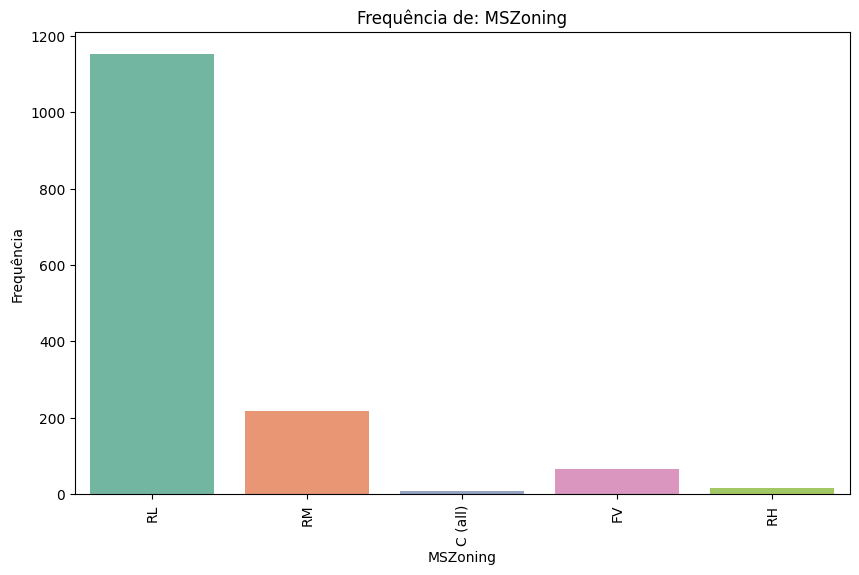

Frequência da coluna MSZoning:
  MSZoning  Frequência
0       RL        1151
1       RM         218
2       FV          65
3       RH          16
4  C (all)          10




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


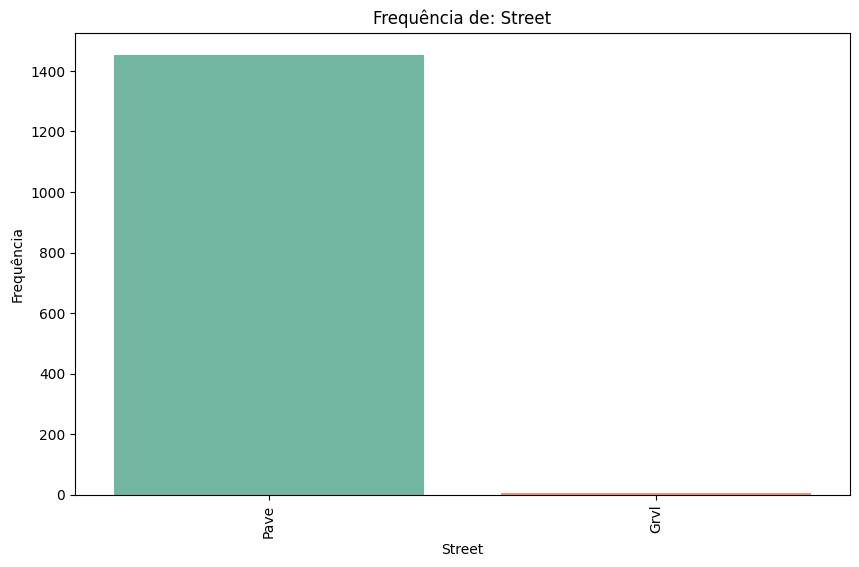

Frequência da coluna Street:
  Street  Frequência
0   Pave        1454
1   Grvl           6




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


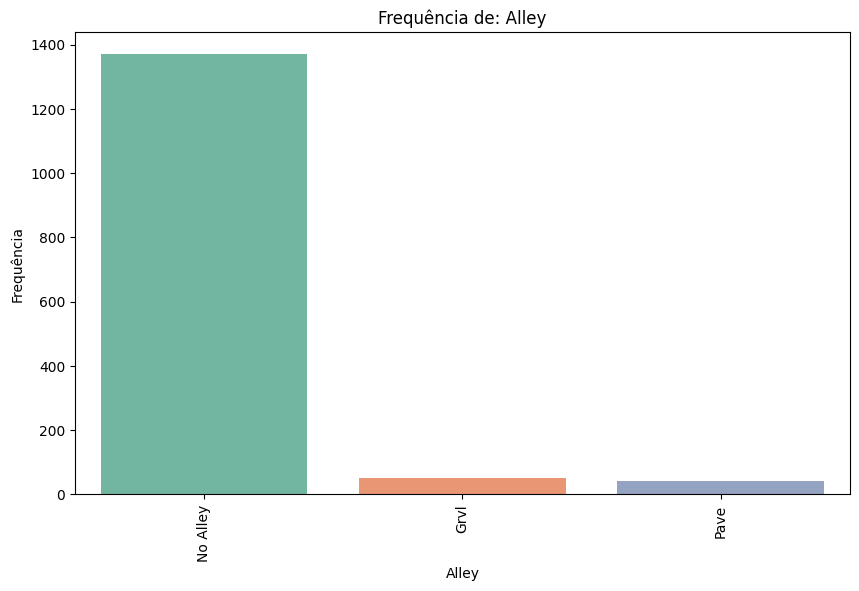

Frequência da coluna Alley:
      Alley  Frequência
0  No Alley        1369
1      Grvl          50
2      Pave          41




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


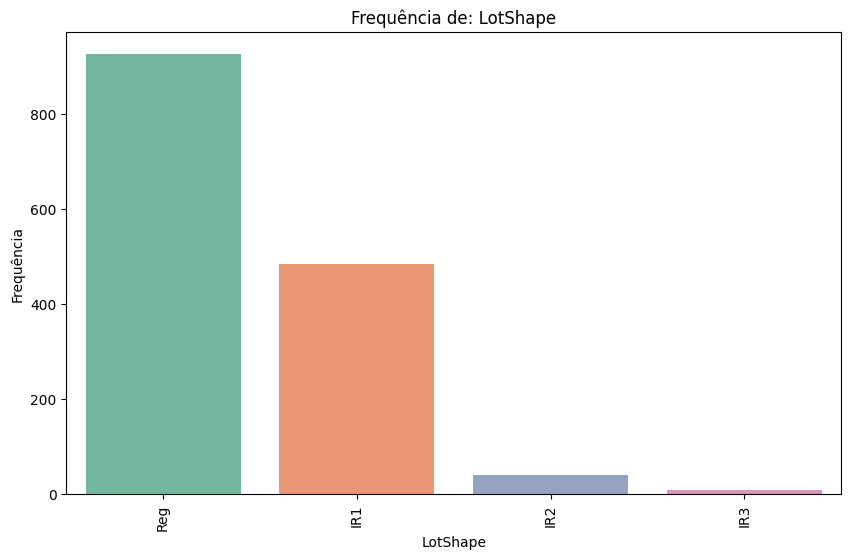

Frequência da coluna LotShape:
  LotShape  Frequência
0      Reg         925
1      IR1         484
2      IR2          41
3      IR3          10




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


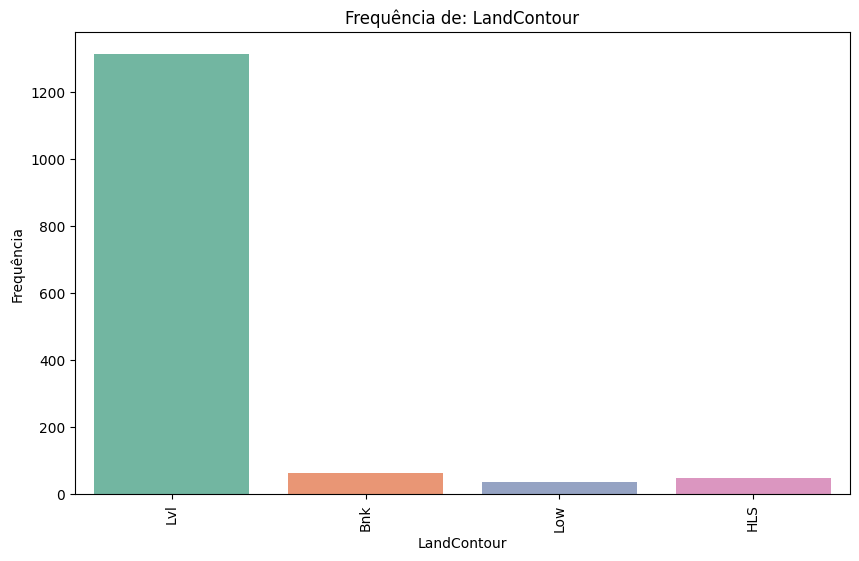

Frequência da coluna LandContour:
  LandContour  Frequência
0         Lvl        1311
1         Bnk          63
2         HLS          50
3         Low          36




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


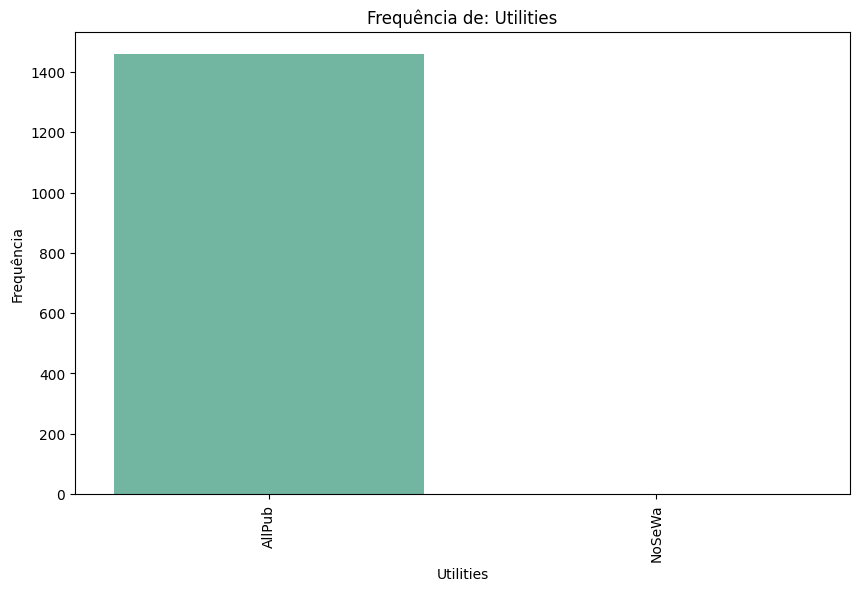

Frequência da coluna Utilities:
  Utilities  Frequência
0    AllPub        1459
1    NoSeWa           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


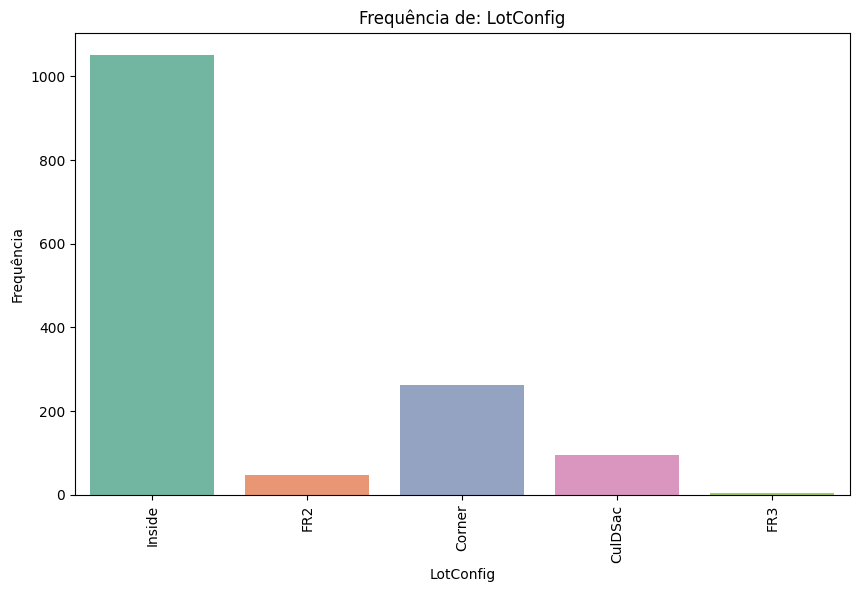

Frequência da coluna LotConfig:
  LotConfig  Frequência
0    Inside        1052
1    Corner         263
2   CulDSac          94
3       FR2          47
4       FR3           4




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


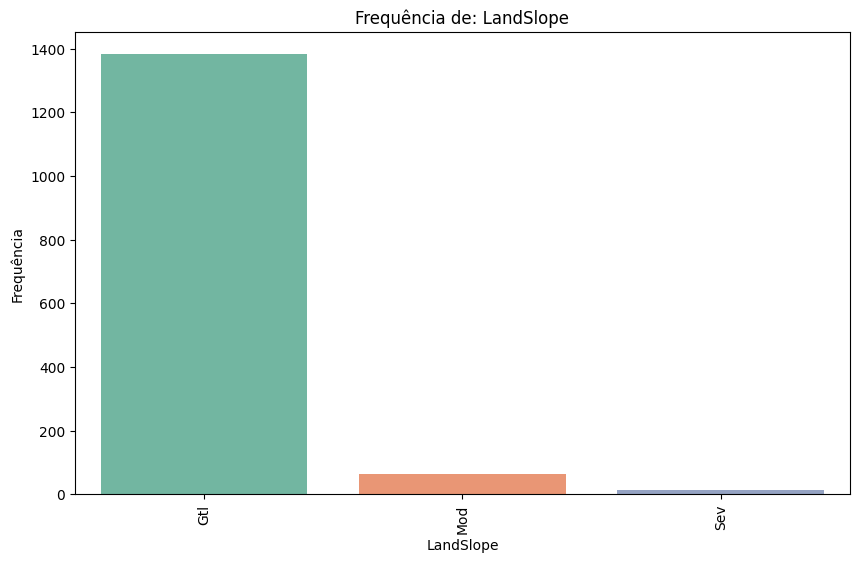

Frequência da coluna LandSlope:
  LandSlope  Frequência
0       Gtl        1382
1       Mod          65
2       Sev          13




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


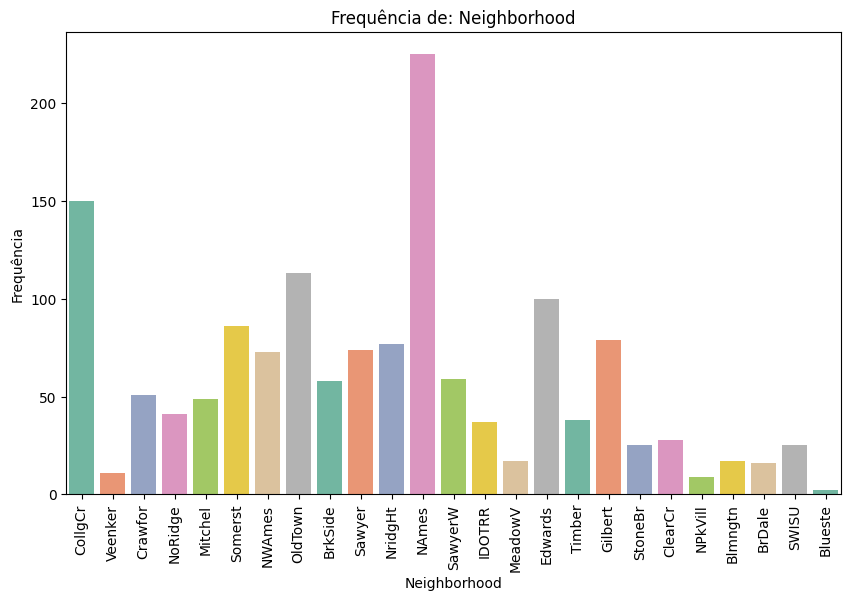

Frequência da coluna Neighborhood:
   Neighborhood  Frequência
0         NAmes         225
1       CollgCr         150
2       OldTown         113
3       Edwards         100
4       Somerst          86
5       Gilbert          79
6       NridgHt          77
7        Sawyer          74
8        NWAmes          73
9       SawyerW          59
10      BrkSide          58
11      Crawfor          51
12      Mitchel          49
13      NoRidge          41
14       Timber          38
15       IDOTRR          37
16      ClearCr          28
17      StoneBr          25
18        SWISU          25
19      MeadowV          17
20      Blmngtn          17
21       BrDale          16
22      Veenker          11
23      NPkVill           9
24      Blueste           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


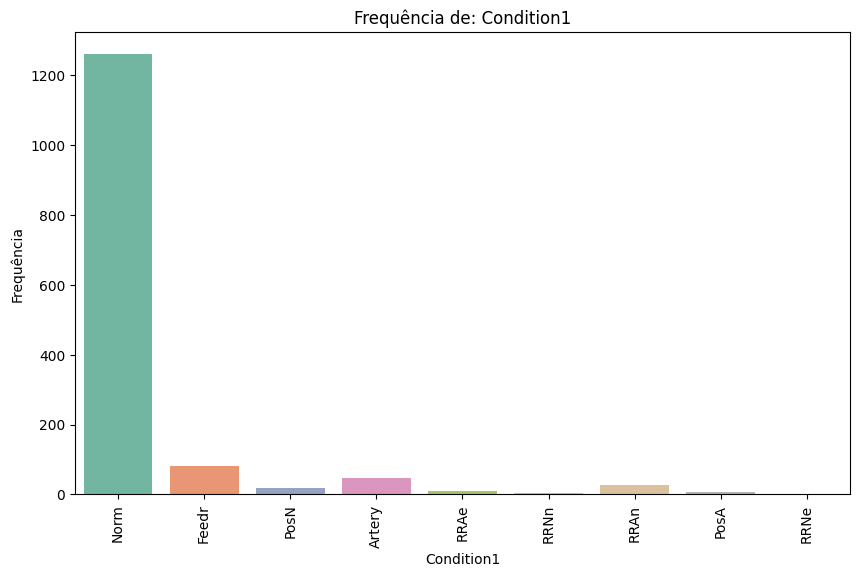

Frequência da coluna Condition1:
  Condition1  Frequência
0       Norm        1260
1      Feedr          81
2     Artery          48
3       RRAn          26
4       PosN          19
5       RRAe          11
6       PosA           8
7       RRNn           5
8       RRNe           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


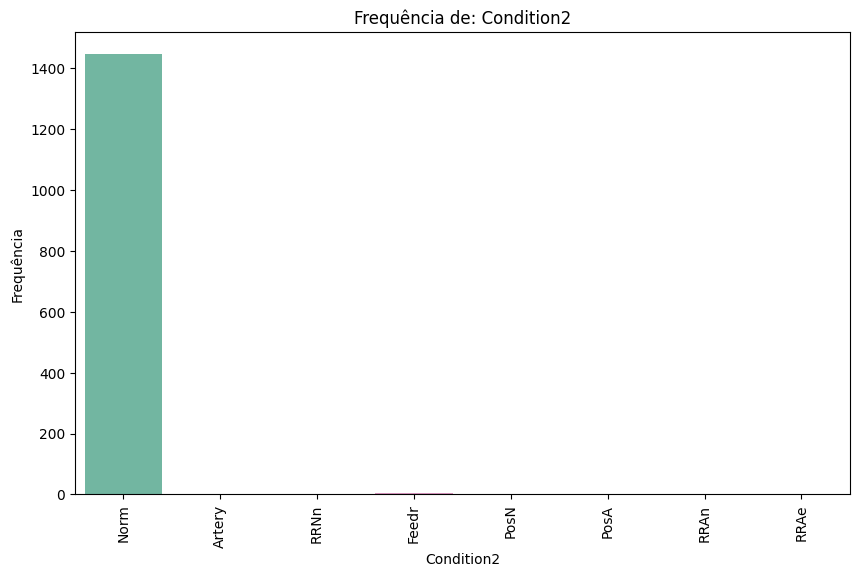

Frequência da coluna Condition2:
  Condition2  Frequência
0       Norm        1445
1      Feedr           6
2     Artery           2
3       RRNn           2
4       PosN           2
5       PosA           1
6       RRAn           1
7       RRAe           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


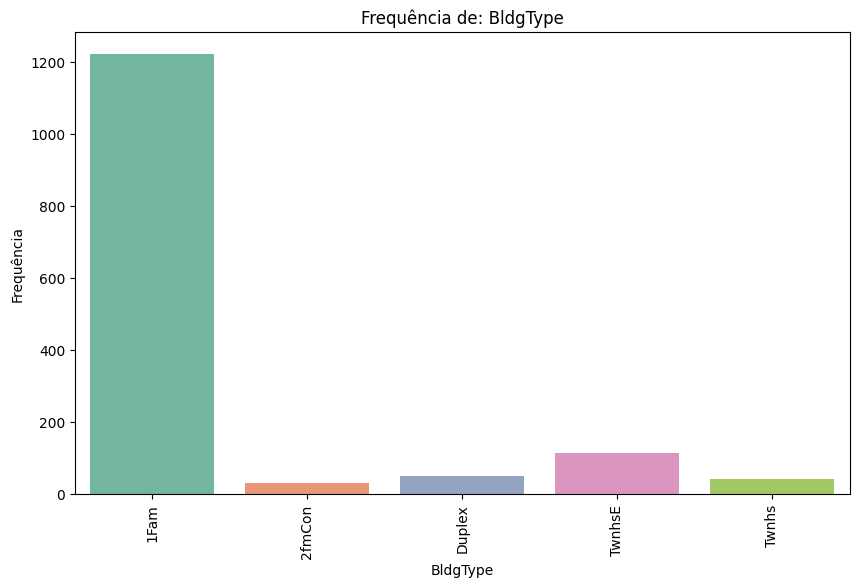

Frequência da coluna BldgType:
  BldgType  Frequência
0     1Fam        1220
1   TwnhsE         114
2   Duplex          52
3    Twnhs          43
4   2fmCon          31




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


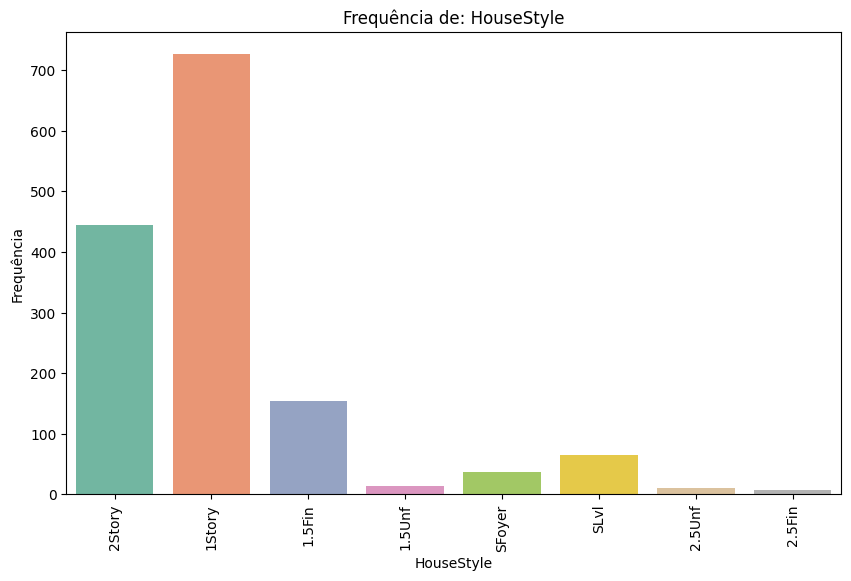

Frequência da coluna HouseStyle:
  HouseStyle  Frequência
0     1Story         726
1     2Story         445
2     1.5Fin         154
3       SLvl          65
4     SFoyer          37
5     1.5Unf          14
6     2.5Unf          11
7     2.5Fin           8




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


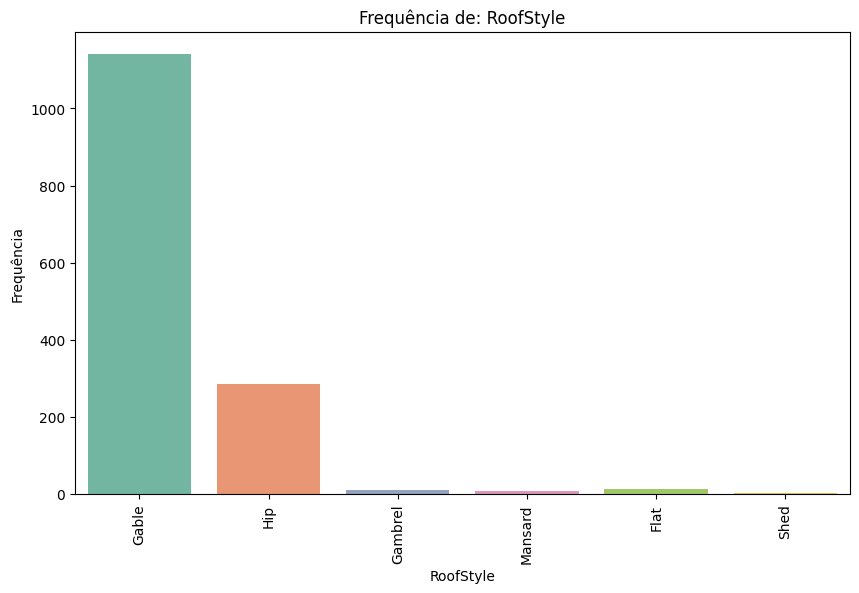

Frequência da coluna RoofStyle:
  RoofStyle  Frequência
0     Gable        1141
1       Hip         286
2      Flat          13
3   Gambrel          11
4   Mansard           7
5      Shed           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


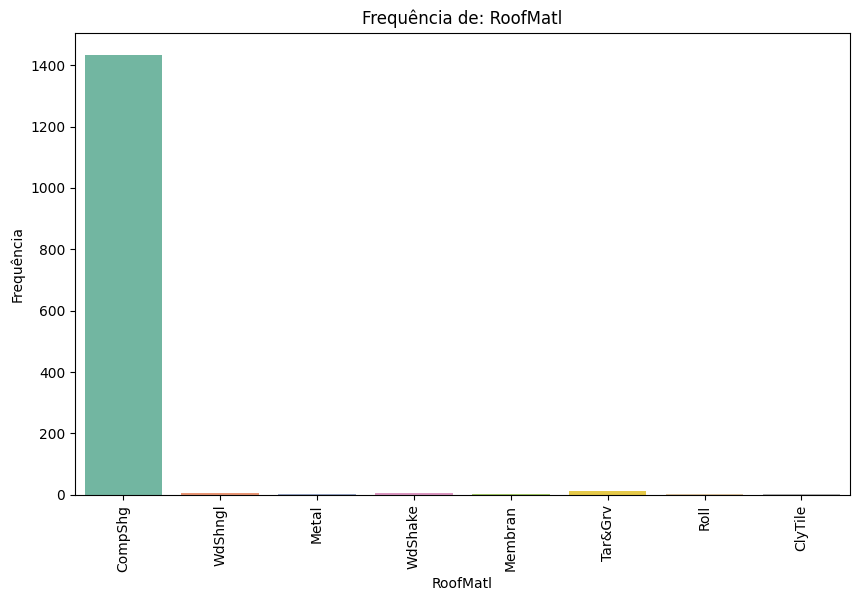

Frequência da coluna RoofMatl:
  RoofMatl  Frequência
0  CompShg        1434
1  Tar&Grv          11
2  WdShngl           6
3  WdShake           5
4    Metal           1
5  Membran           1
6     Roll           1
7  ClyTile           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


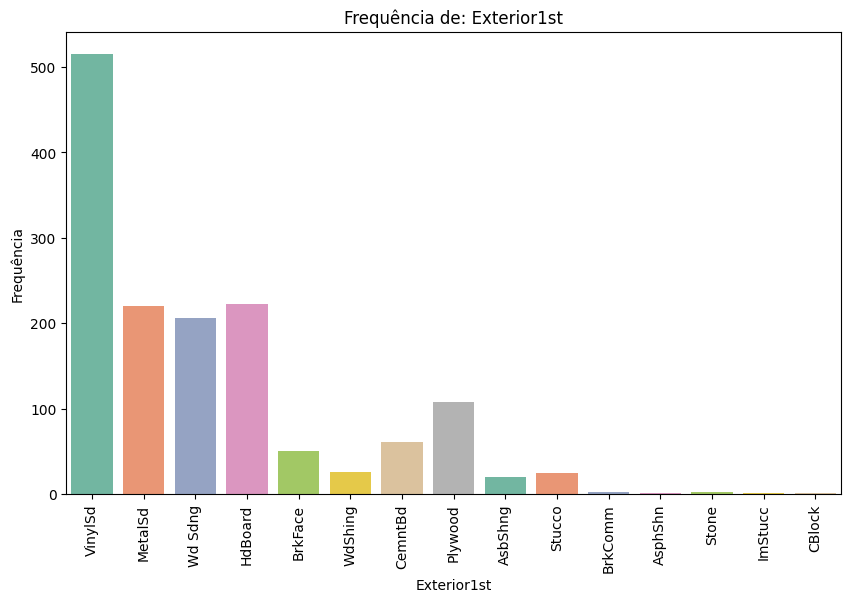

Frequência da coluna Exterior1st:
   Exterior1st  Frequência
0      VinylSd         515
1      HdBoard         222
2      MetalSd         220
3      Wd Sdng         206
4      Plywood         108
5      CemntBd          61
6      BrkFace          50
7      WdShing          26
8       Stucco          25
9      AsbShng          20
10     BrkComm           2
11       Stone           2
12     AsphShn           1
13     ImStucc           1
14      CBlock           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


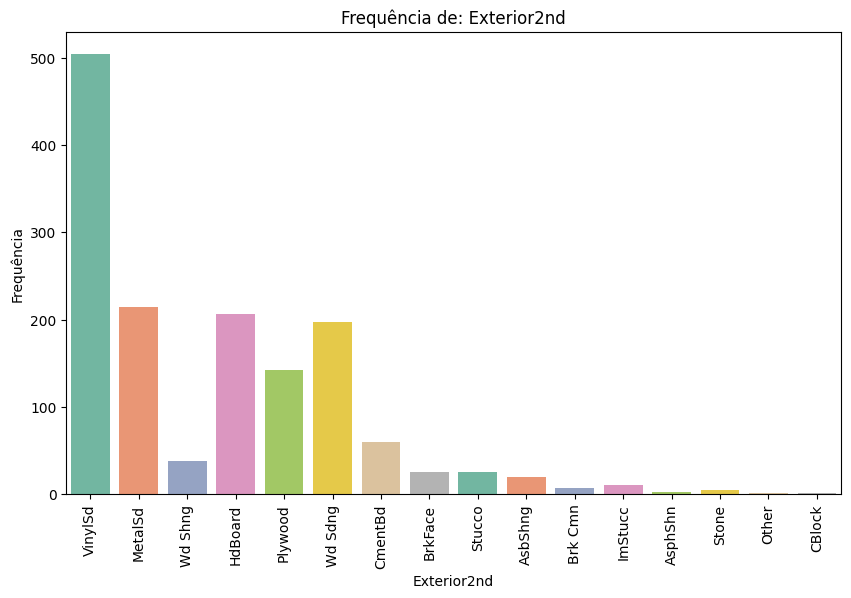

Frequência da coluna Exterior2nd:
   Exterior2nd  Frequência
0      VinylSd         504
1      MetalSd         214
2      HdBoard         207
3      Wd Sdng         197
4      Plywood         142
5      CmentBd          60
6      Wd Shng          38
7       Stucco          26
8      BrkFace          25
9      AsbShng          20
10     ImStucc          10
11     Brk Cmn           7
12       Stone           5
13     AsphShn           3
14       Other           1
15      CBlock           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


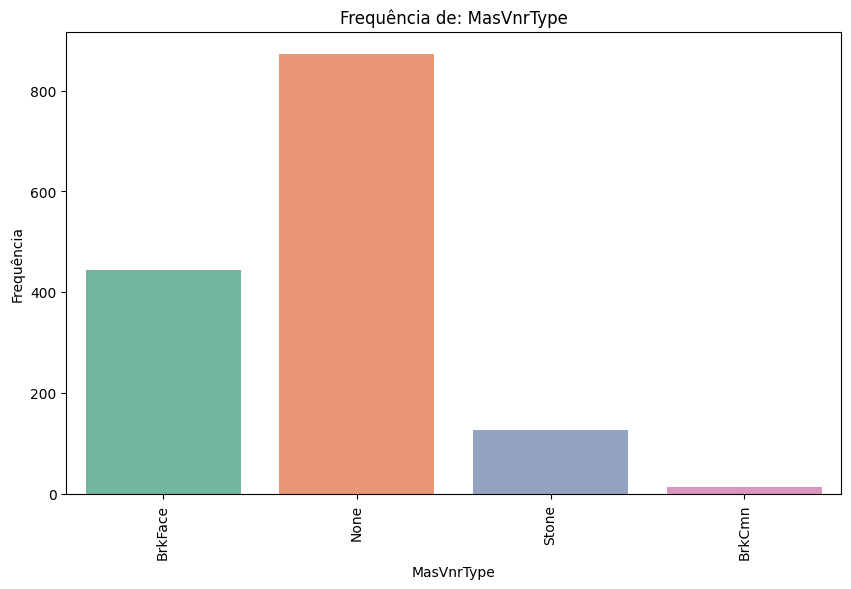

Frequência da coluna MasVnrType:
  MasVnrType  Frequência
0       None         872
1    BrkFace         445
2      Stone         128
3     BrkCmn          15




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


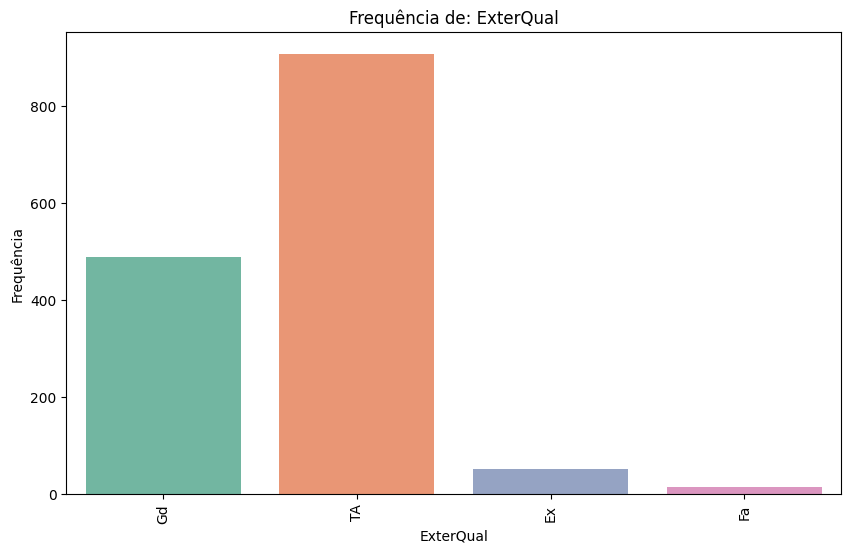

Frequência da coluna ExterQual:
  ExterQual  Frequência
0        TA         906
1        Gd         488
2        Ex          52
3        Fa          14




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


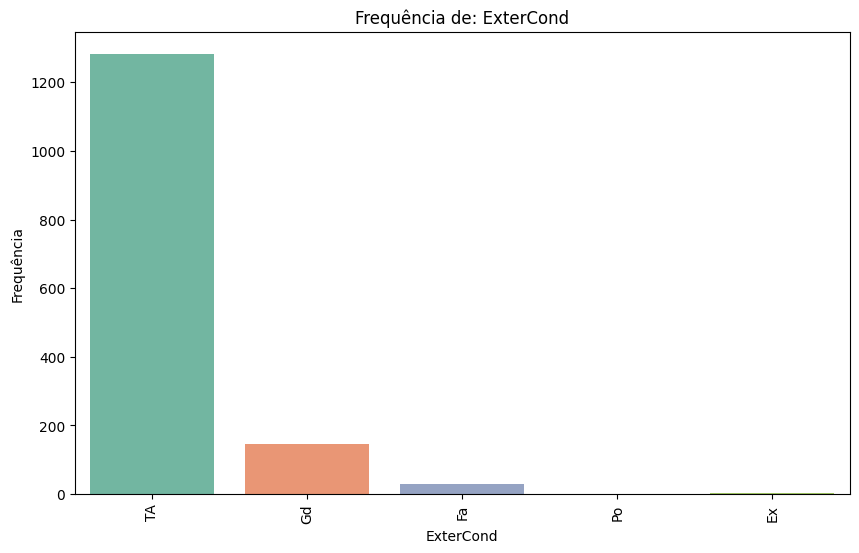

Frequência da coluna ExterCond:
  ExterCond  Frequência
0        TA        1282
1        Gd         146
2        Fa          28
3        Ex           3
4        Po           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


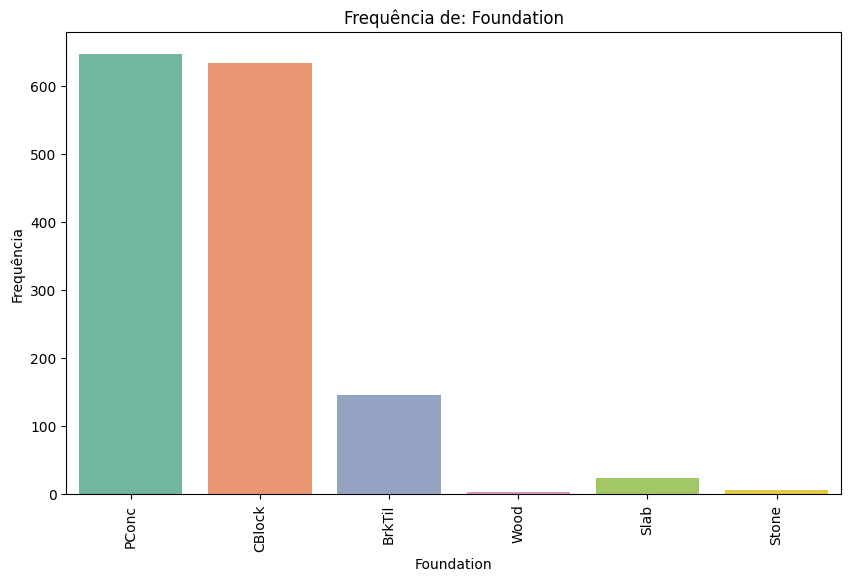

Frequência da coluna Foundation:
  Foundation  Frequência
0      PConc         647
1     CBlock         634
2     BrkTil         146
3       Slab          24
4      Stone           6
5       Wood           3




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


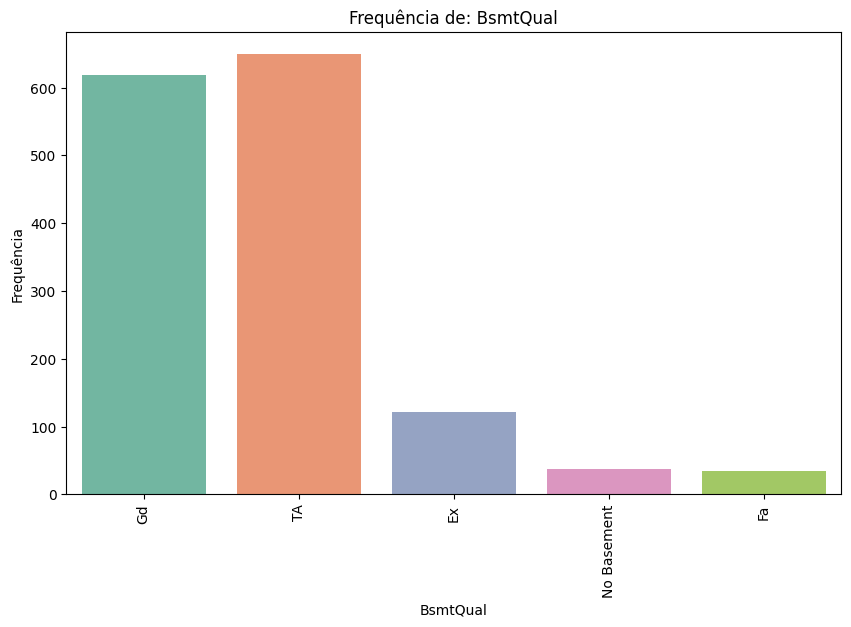

Frequência da coluna BsmtQual:
      BsmtQual  Frequência
0           TA         649
1           Gd         618
2           Ex         121
3  No Basement          37
4           Fa          35




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


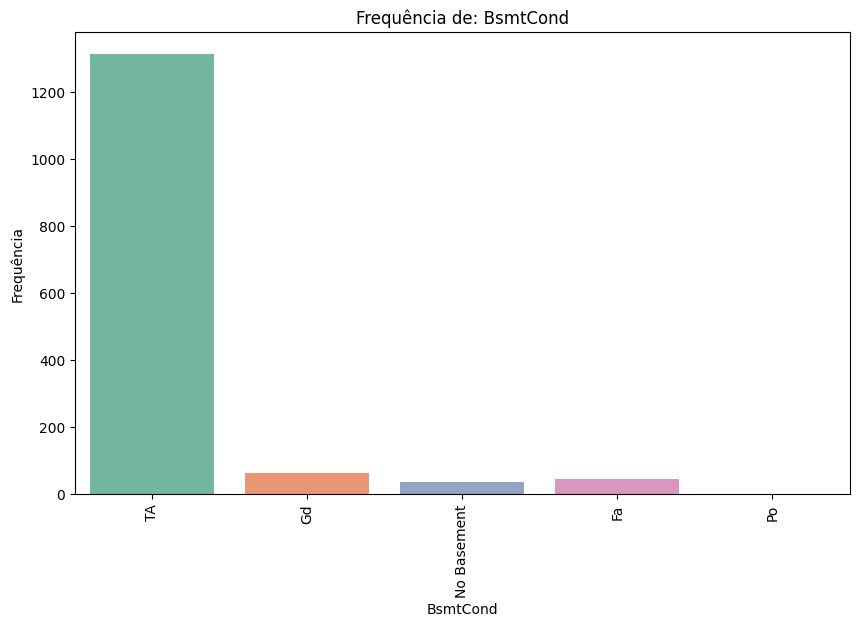

Frequência da coluna BsmtCond:
      BsmtCond  Frequência
0           TA        1311
1           Gd          65
2           Fa          45
3  No Basement          37
4           Po           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


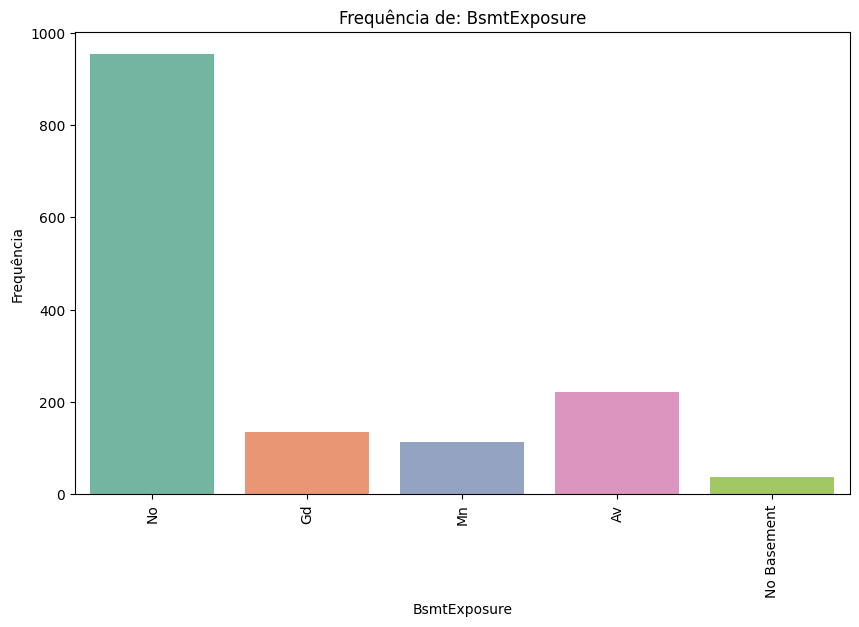

Frequência da coluna BsmtExposure:
  BsmtExposure  Frequência
0           No         953
1           Av         221
2           Gd         134
3           Mn         114
4  No Basement          38




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


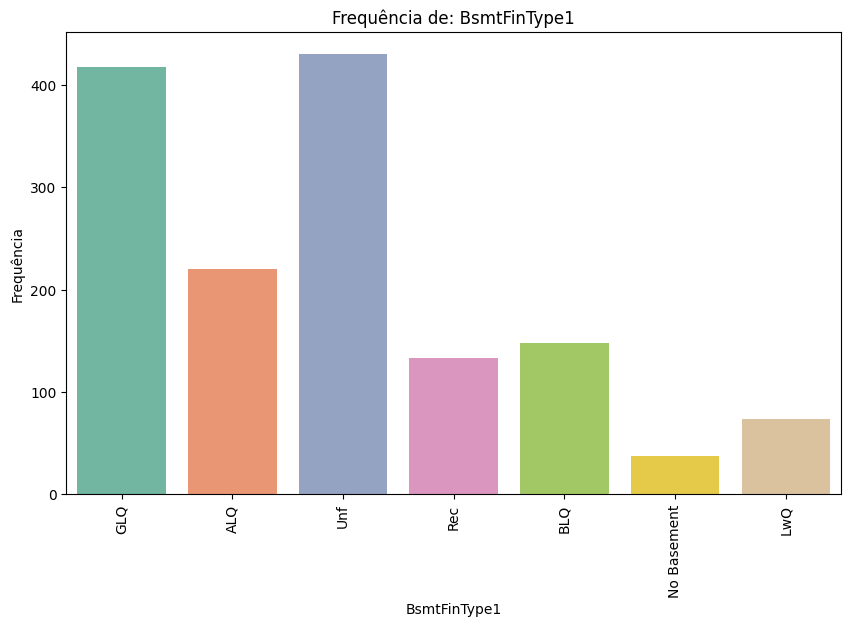

Frequência da coluna BsmtFinType1:
  BsmtFinType1  Frequência
0          Unf         430
1          GLQ         418
2          ALQ         220
3          BLQ         148
4          Rec         133
5          LwQ          74
6  No Basement          37




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


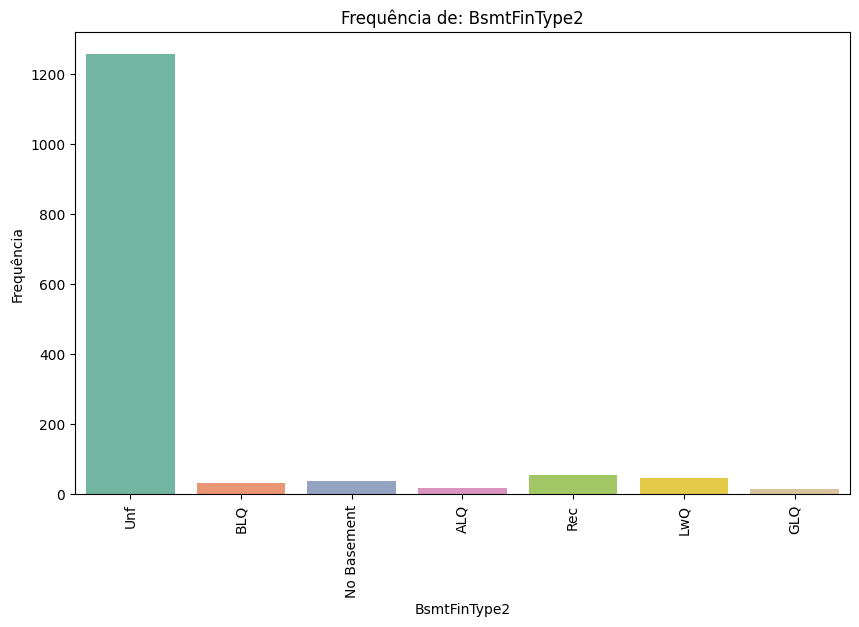

Frequência da coluna BsmtFinType2:
  BsmtFinType2  Frequência
0          Unf        1256
1          Rec          54
2          LwQ          46
3  No Basement          38
4          BLQ          33
5          ALQ          19
6          GLQ          14




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


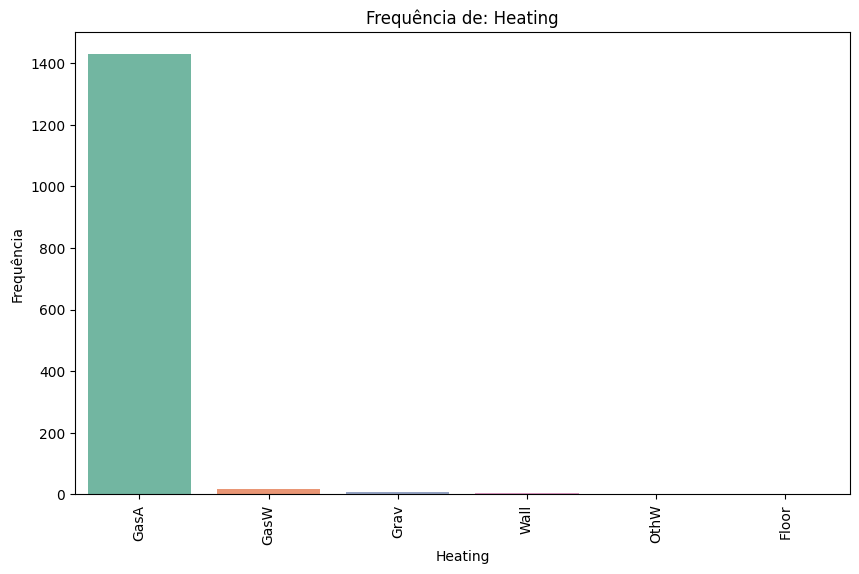

Frequência da coluna Heating:
  Heating  Frequência
0    GasA        1428
1    GasW          18
2    Grav           7
3    Wall           4
4    OthW           2
5   Floor           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


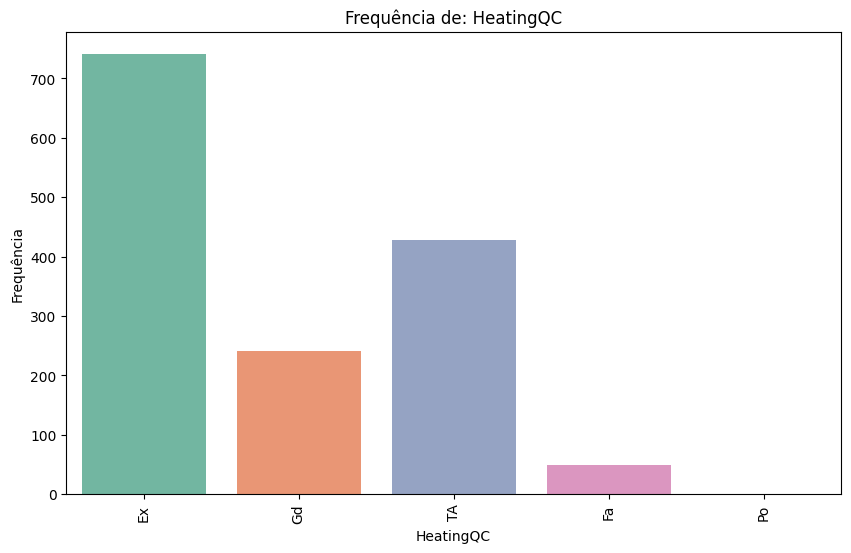

Frequência da coluna HeatingQC:
  HeatingQC  Frequência
0        Ex         741
1        TA         428
2        Gd         241
3        Fa          49
4        Po           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


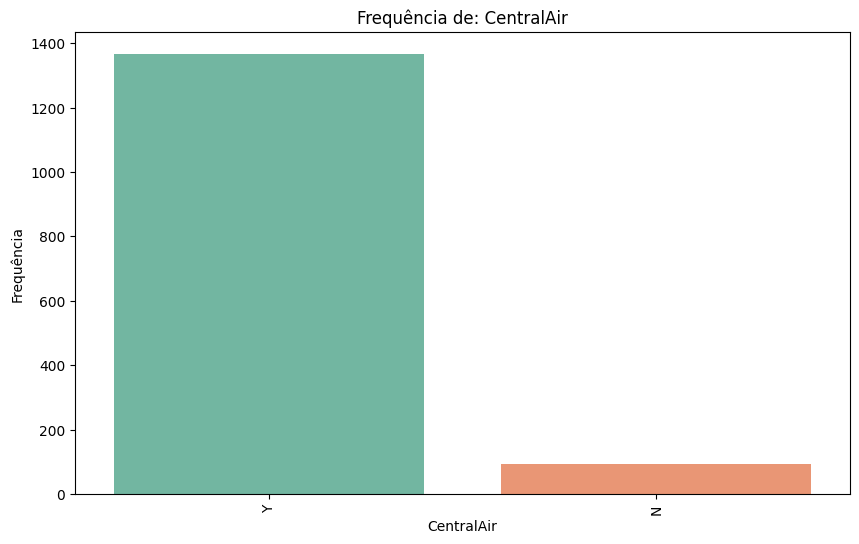

Frequência da coluna CentralAir:
  CentralAir  Frequência
0          Y        1365
1          N          95




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


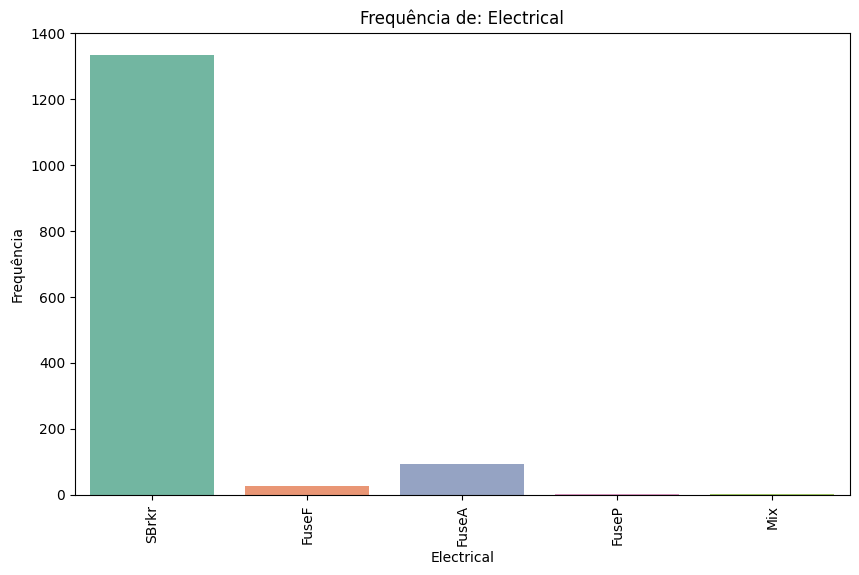

Frequência da coluna Electrical:
  Electrical  Frequência
0      SBrkr        1335
1      FuseA          94
2      FuseF          27
3      FuseP           3
4        Mix           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


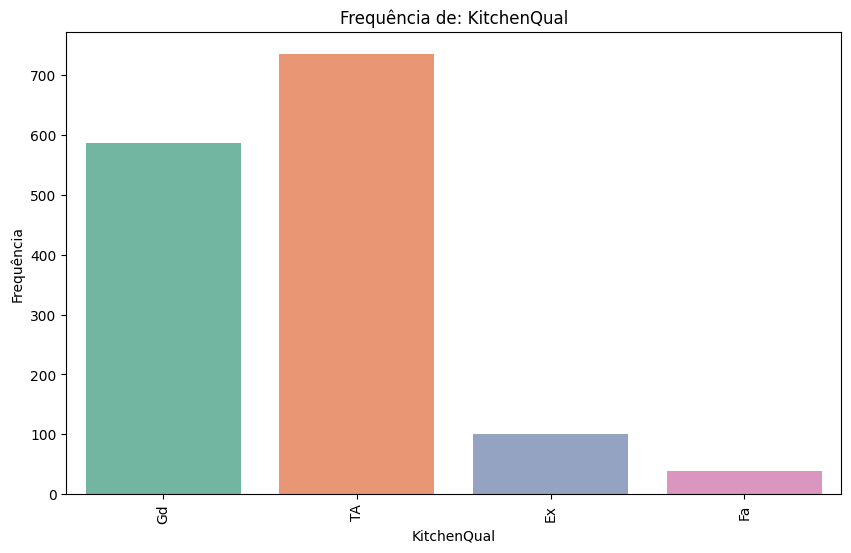

Frequência da coluna KitchenQual:
  KitchenQual  Frequência
0          TA         735
1          Gd         586
2          Ex         100
3          Fa          39




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


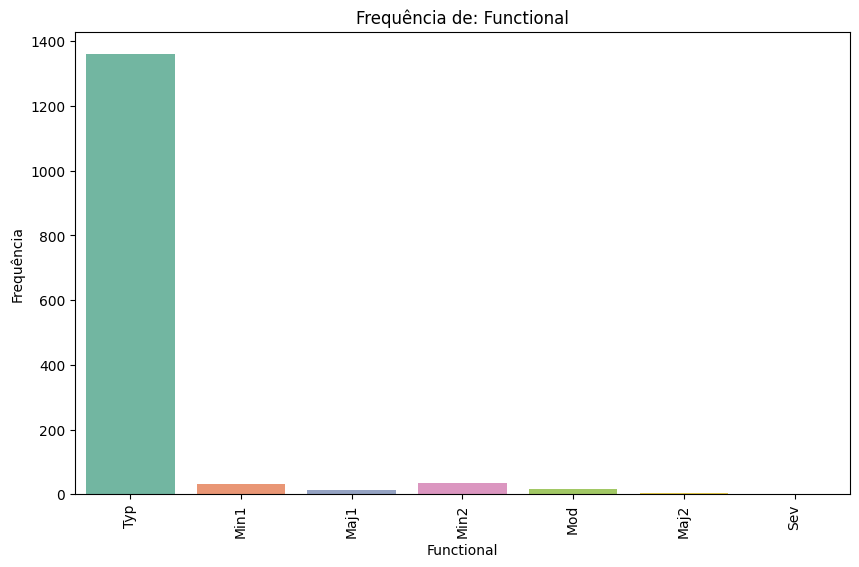

Frequência da coluna Functional:
  Functional  Frequência
0        Typ        1360
1       Min2          34
2       Min1          31
3        Mod          15
4       Maj1          14
5       Maj2           5
6        Sev           1




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


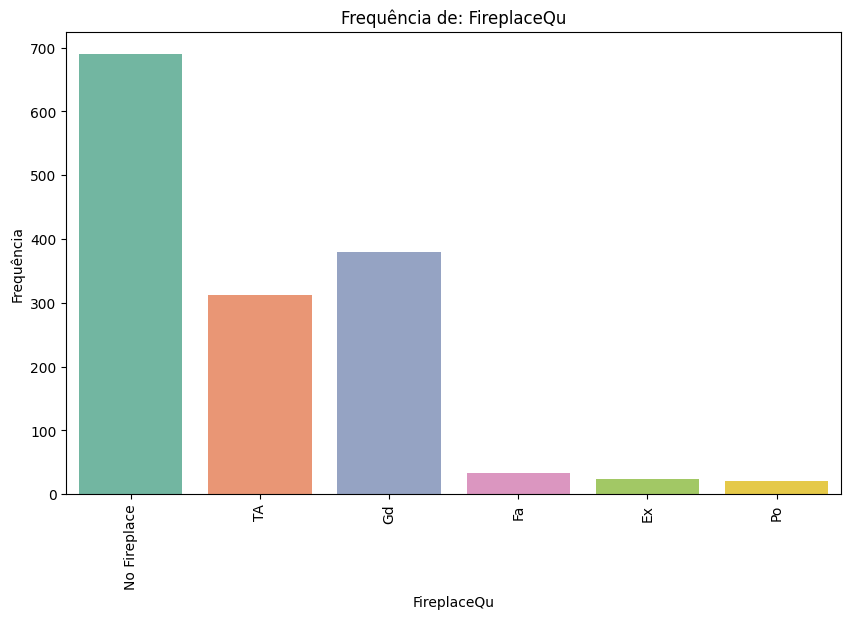

Frequência da coluna FireplaceQu:
    FireplaceQu  Frequência
0  No Fireplace         690
1            Gd         380
2            TA         313
3            Fa          33
4            Ex          24
5            Po          20




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


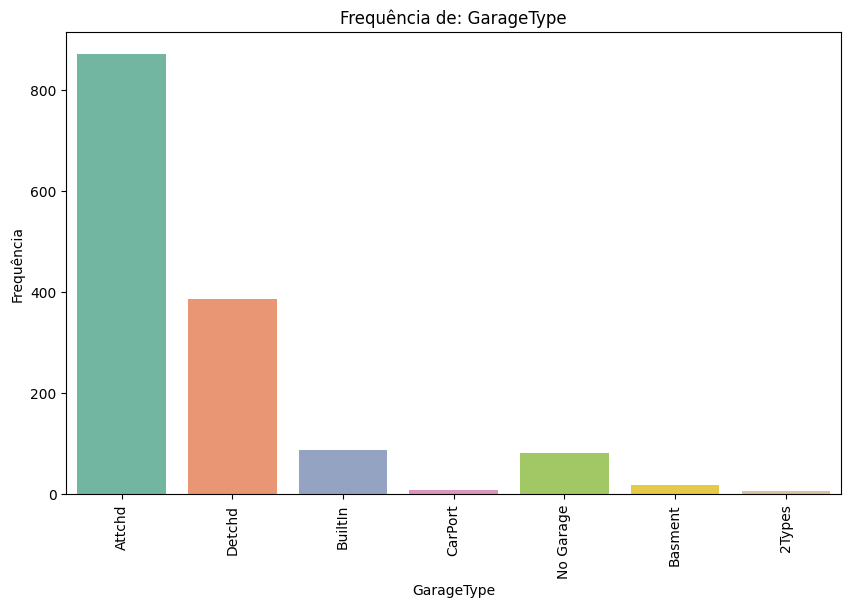

Frequência da coluna GarageType:
  GarageType  Frequência
0     Attchd         870
1     Detchd         387
2    BuiltIn          88
3  No Garage          81
4    Basment          19
5    CarPort           9
6     2Types           6




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


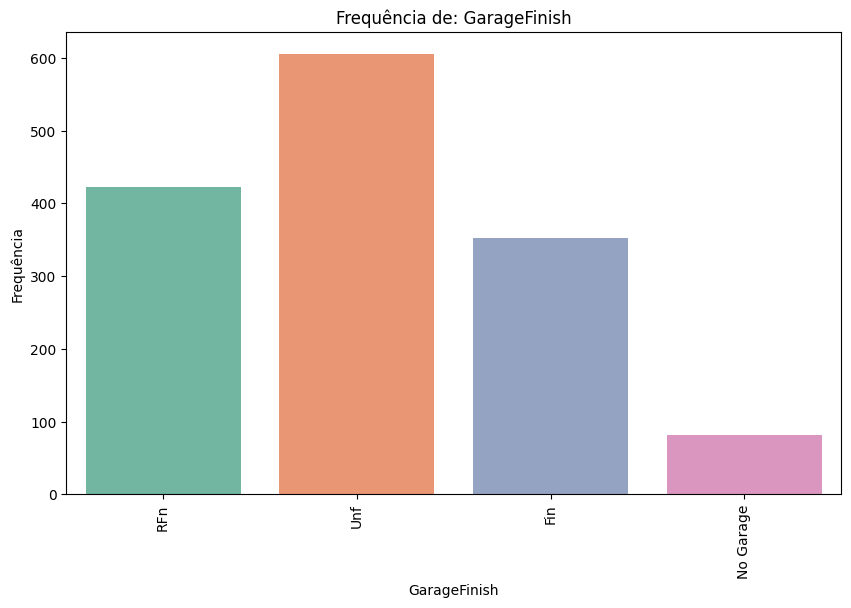

Frequência da coluna GarageFinish:
  GarageFinish  Frequência
0          Unf         605
1          RFn         422
2          Fin         352
3    No Garage          81




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


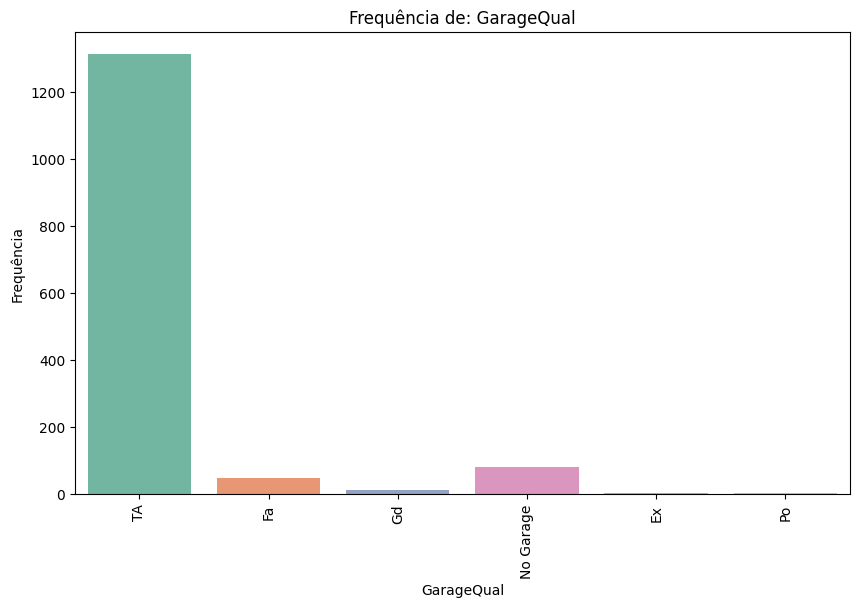

Frequência da coluna GarageQual:
  GarageQual  Frequência
0         TA        1311
1  No Garage          81
2         Fa          48
3         Gd          14
4         Ex           3
5         Po           3




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


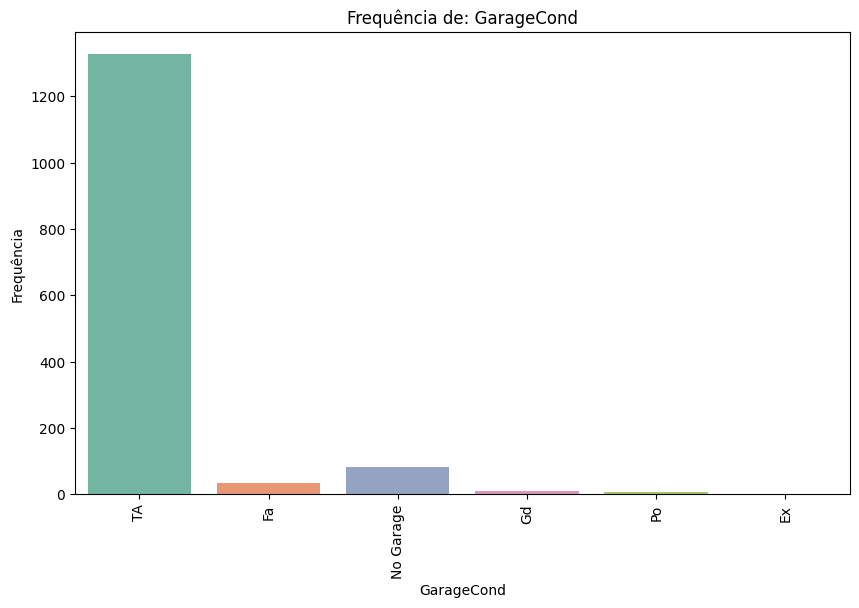

Frequência da coluna GarageCond:
  GarageCond  Frequência
0         TA        1326
1  No Garage          81
2         Fa          35
3         Gd           9
4         Po           7
5         Ex           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


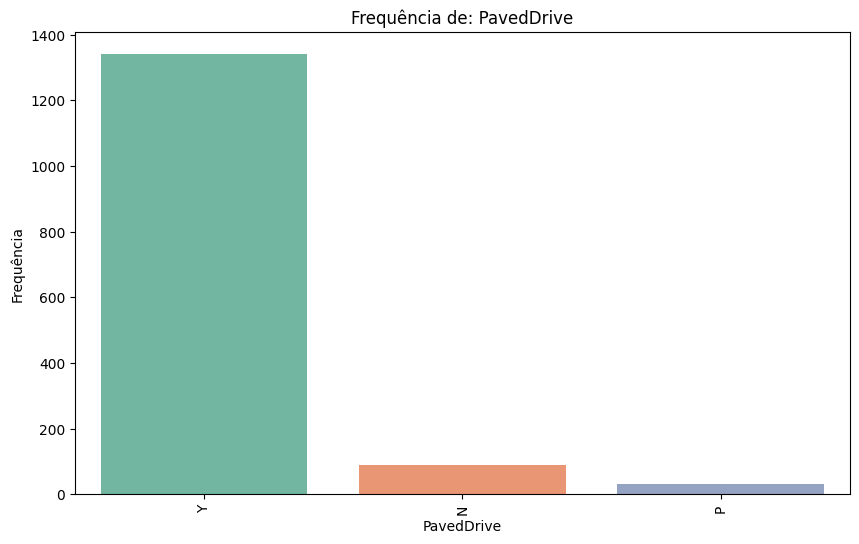

Frequência da coluna PavedDrive:
  PavedDrive  Frequência
0          Y        1340
1          N          90
2          P          30




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


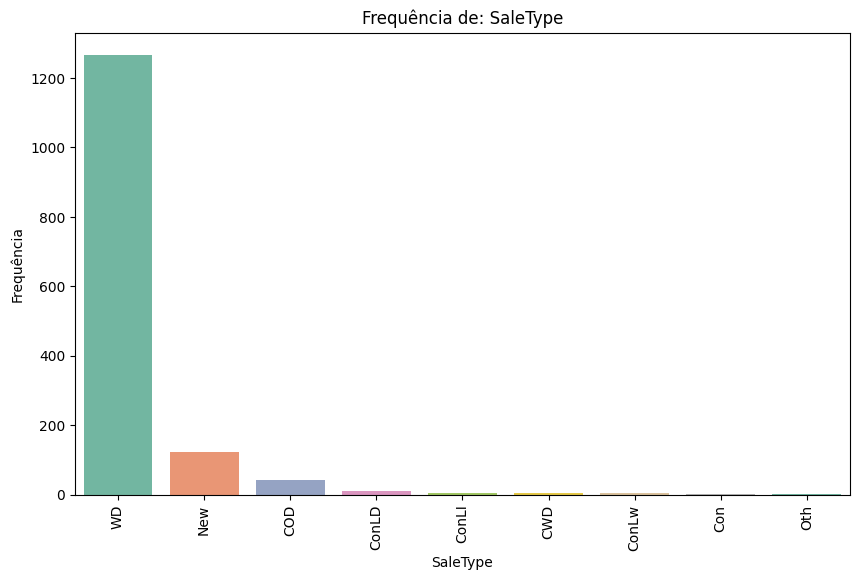

Frequência da coluna SaleType:
  SaleType  Frequência
0       WD        1267
1      New         122
2      COD          43
3    ConLD           9
4    ConLI           5
5    ConLw           5
6      CWD           4
7      Oth           3
8      Con           2




<ipython-input-23-75fd3d96ed00>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


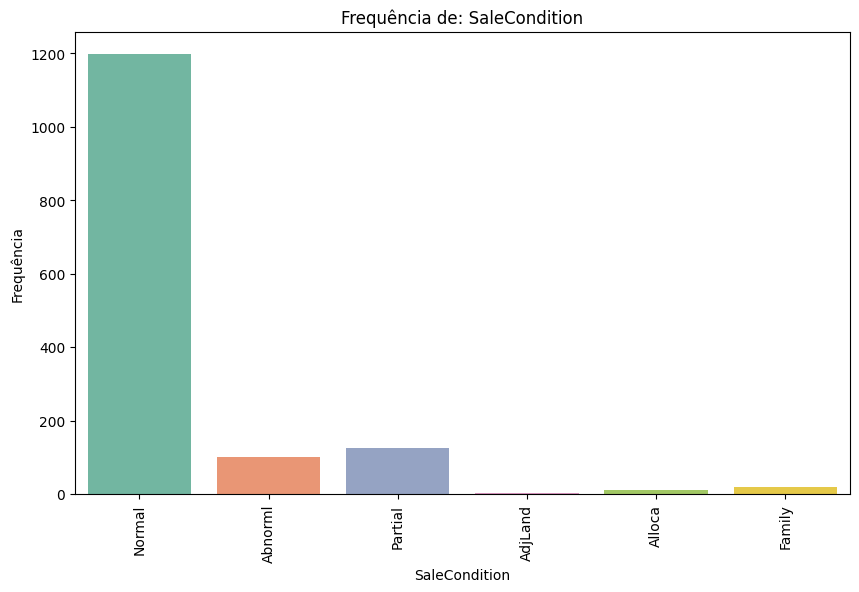

Frequência da coluna SaleCondition:
  SaleCondition  Frequência
0        Normal        1198
1       Partial         125
2       Abnorml         101
3        Family          20
4        Alloca          12
5       AdjLand           4




In [23]:
col_pular = [
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice'
    ]
for col in col_obj:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=train, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = train[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


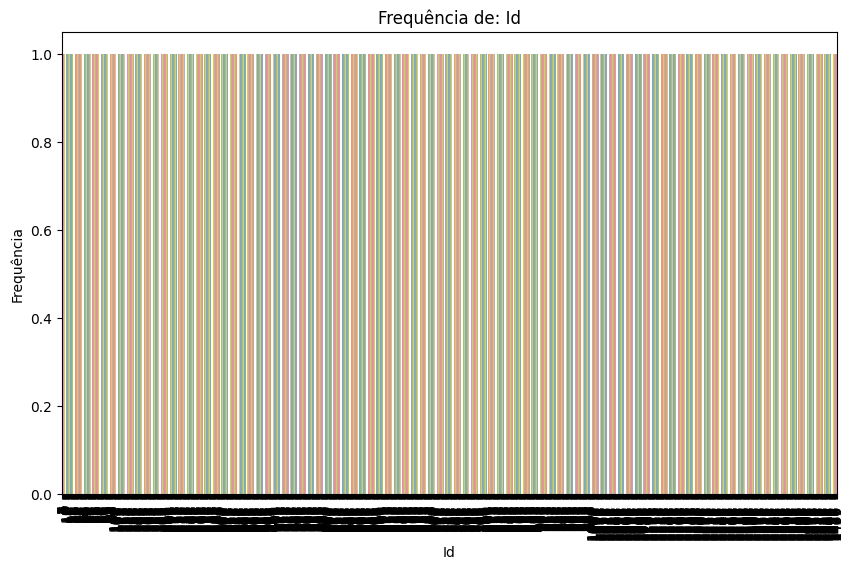

Frequência da coluna Id:
        Id  Frequência
0        1           1
1      982           1
2      980           1
3      979           1
4      978           1
...    ...         ...
1455   485           1
1456   484           1
1457   483           1
1458   482           1
1459  1460           1

[1460 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


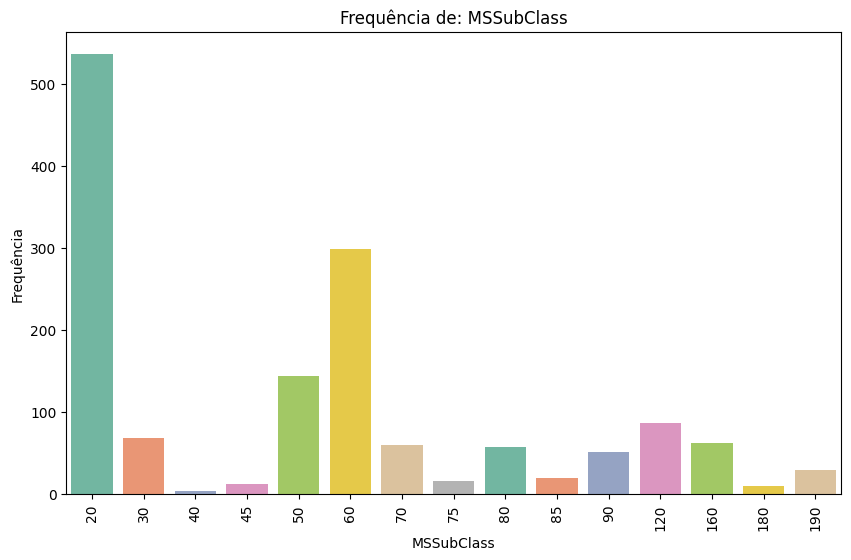

Frequência da coluna MSSubClass:
    MSSubClass  Frequência
0           20         536
1           60         299
2           50         144
3          120          87
4           30          69
5          160          63
6           70          60
7           80          58
8           90          52
9          190          30
10          85          20
11          75          16
12          45          12
13         180          10
14          40           4




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


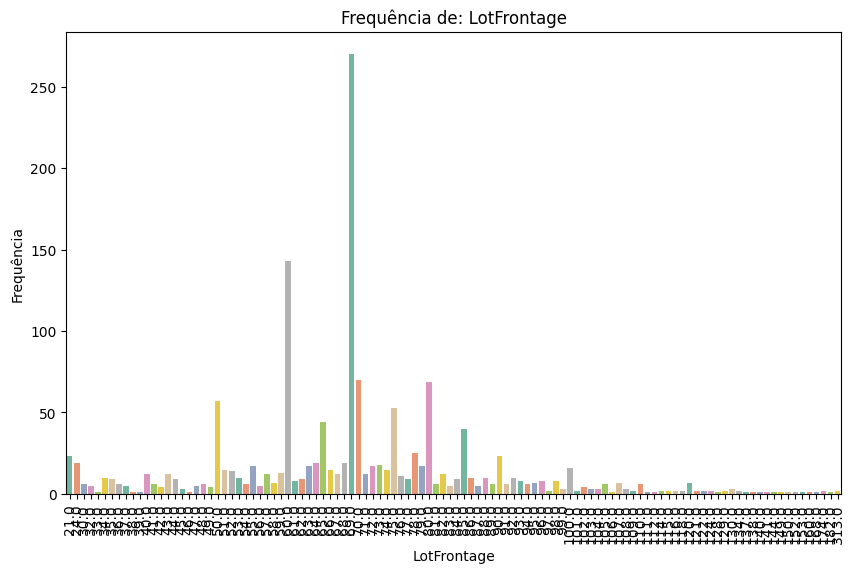

Frequência da coluna LotFrontage:
     LotFrontage  Frequência
0           69.0         270
1           60.0         143
2           70.0          70
3           80.0          69
4           50.0          57
..           ...         ...
105        137.0           1
106        141.0           1
107         38.0           1
108        140.0           1
109         46.0           1

[110 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


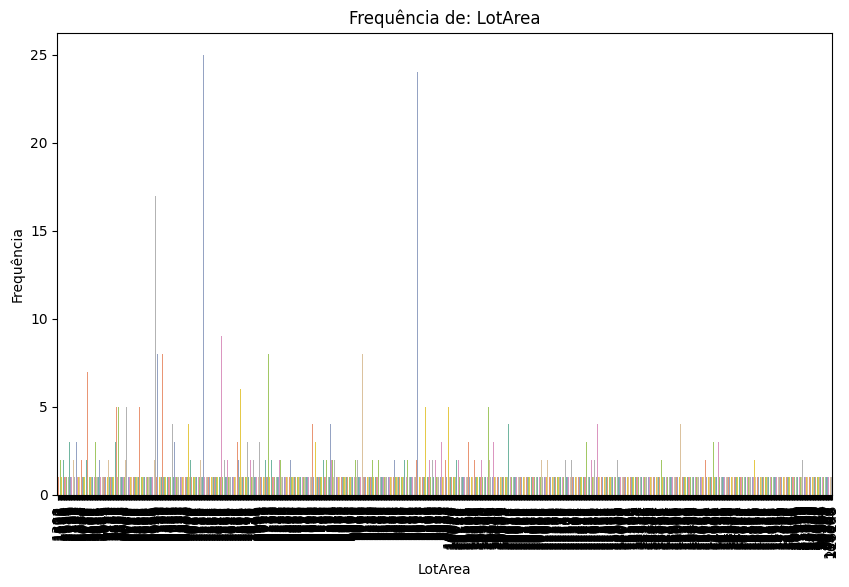

Frequência da coluna LotArea:
      LotArea  Frequência
0        7200          25
1        9600          24
2        6000          17
3        9000          14
4        8400          14
...       ...         ...
1068    14601           1
1069    13682           1
1070     4058           1
1071    17104           1
1072     9717           1

[1073 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


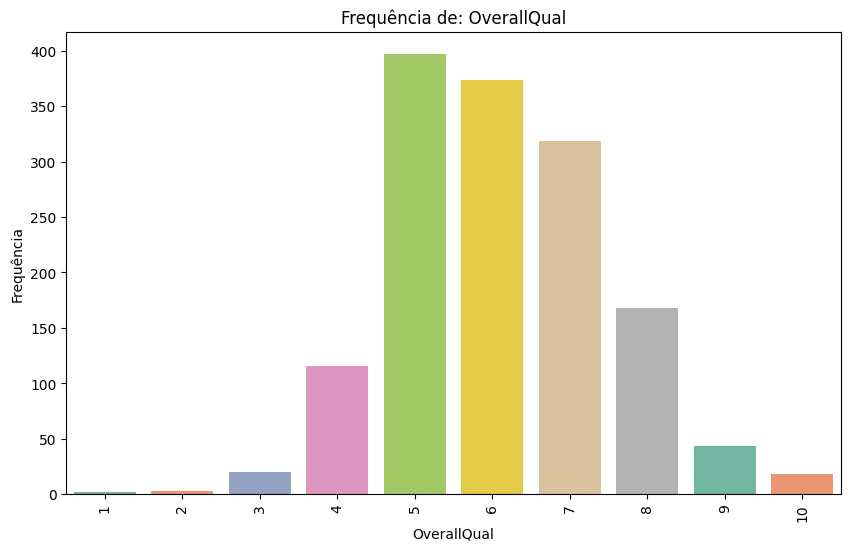

Frequência da coluna OverallQual:
   OverallQual  Frequência
0            5         397
1            6         374
2            7         319
3            8         168
4            4         116
5            9          43
6            3          20
7           10          18
8            2           3
9            1           2




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


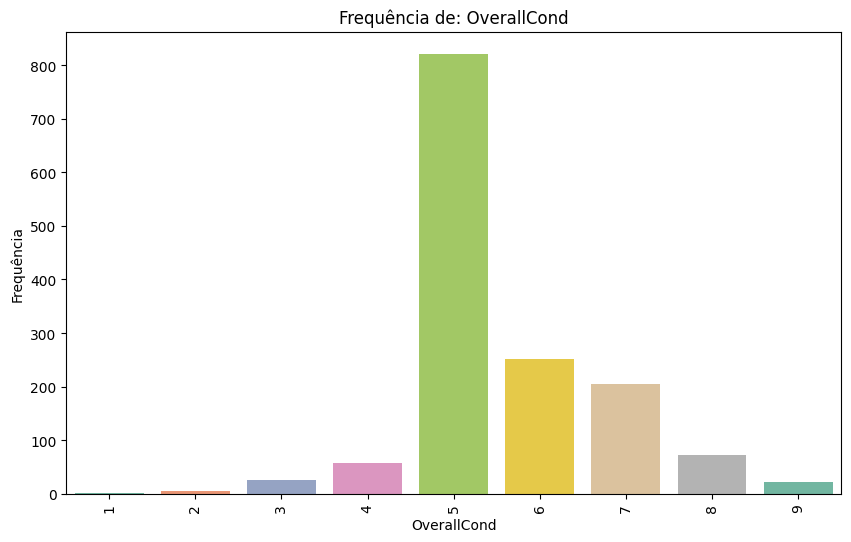

Frequência da coluna OverallCond:
   OverallCond  Frequência
0            5         821
1            6         252
2            7         205
3            8          72
4            4          57
5            3          25
6            9          22
7            2           5
8            1           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


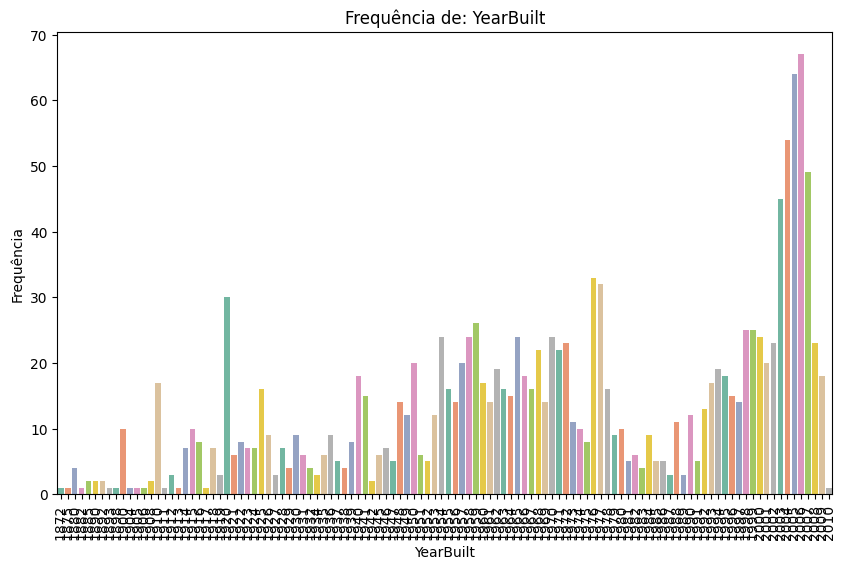

Frequência da coluna YearBuilt:
     YearBuilt  Frequência
0         2006          67
1         2005          64
2         2004          54
3         2007          49
4         2003          45
..         ...         ...
107       1875           1
108       1911           1
109       1917           1
110       1872           1
111       1905           1

[112 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


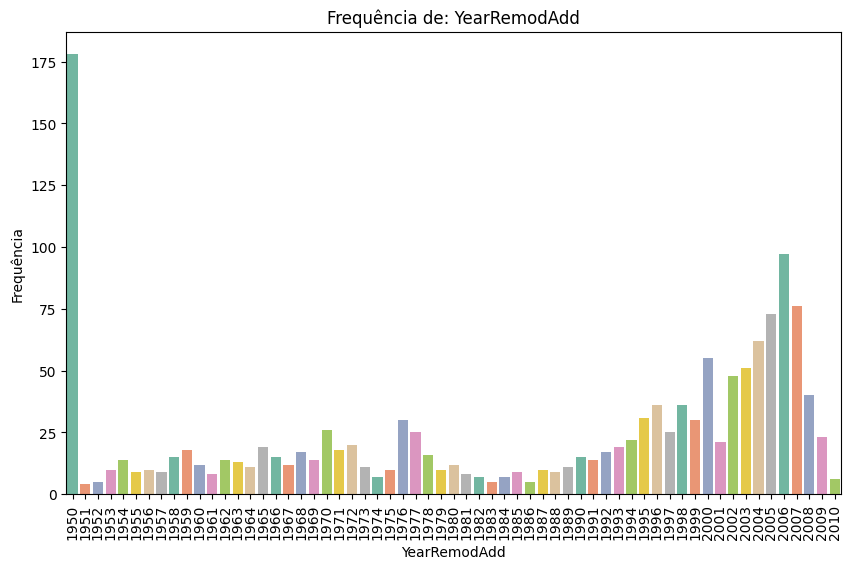

Frequência da coluna YearRemodAdd:
    YearRemodAdd  Frequência
0           1950         178
1           2006          97
2           2007          76
3           2005          73
4           2004          62
..           ...         ...
56          2010           6
57          1986           5
58          1952           5
59          1983           5
60          1951           4

[61 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


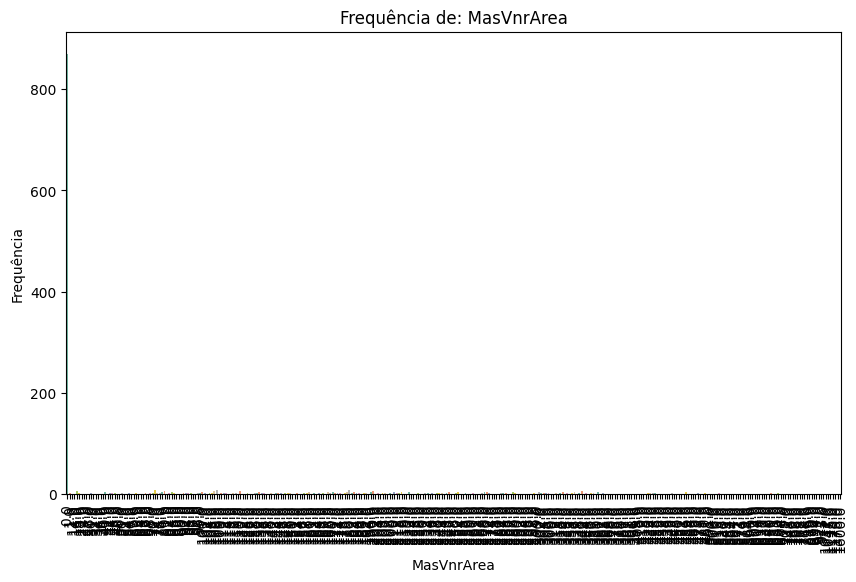

Frequência da coluna MasVnrArea:
     MasVnrArea  Frequência
0           0.0         869
1         180.0           8
2          72.0           8
3         108.0           8
4         120.0           7
..          ...         ...
322       562.0           1
323        89.0           1
324       921.0           1
325       762.0           1
326       119.0           1

[327 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


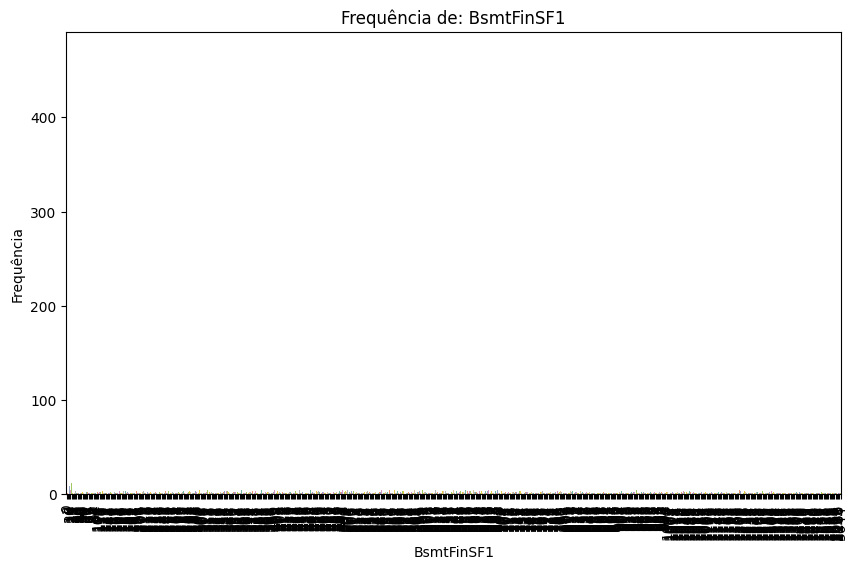

Frequência da coluna BsmtFinSF1:
     BsmtFinSF1  Frequência
0             0         467
1            24          12
2            16           9
3           686           5
4           662           5
..          ...         ...
632        1338           1
633        1324           1
634        1460           1
635         328           1
636         830           1

[637 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


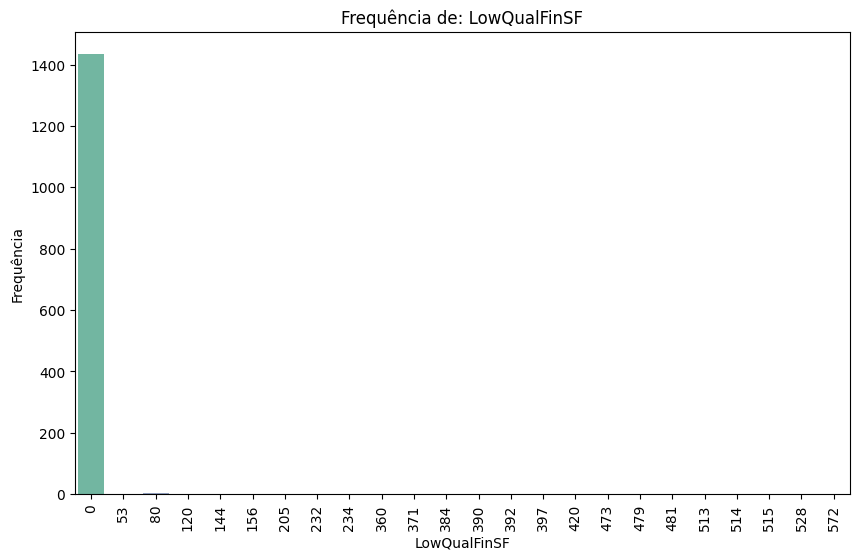

Frequência da coluna LowQualFinSF:
    LowQualFinSF  Frequência
0              0        1434
1             80           3
2            360           2
3            205           1
4            479           1
5            397           1
6            514           1
7            120           1
8            481           1
9            232           1
10            53           1
11           515           1
12           156           1
13           473           1
14           420           1
15           390           1
16           371           1
17           392           1
18           144           1
19           572           1
20           528           1
21           234           1
22           513           1
23           384           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


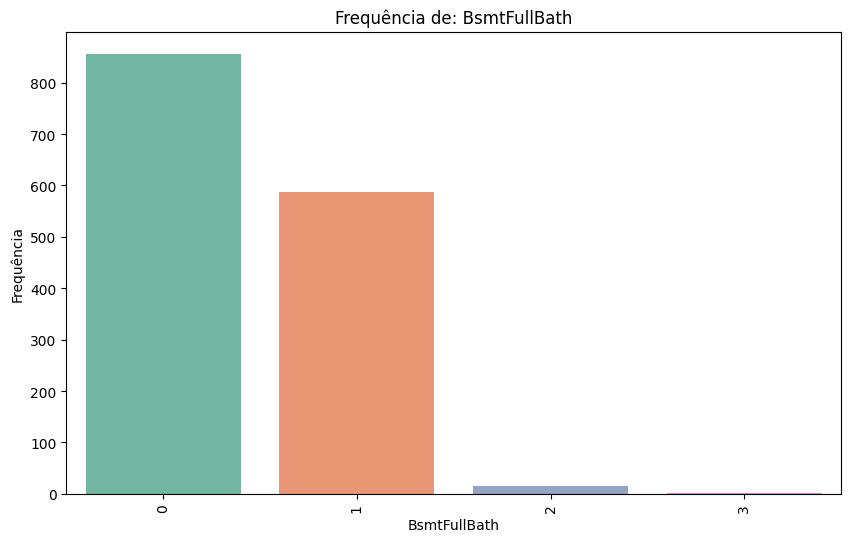

Frequência da coluna BsmtFullBath:
   BsmtFullBath  Frequência
0             0         856
1             1         588
2             2          15
3             3           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


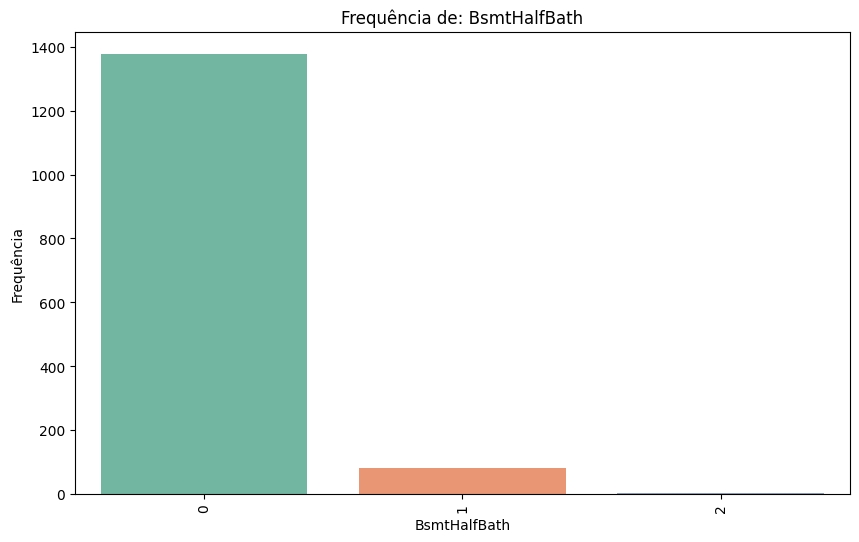

Frequência da coluna BsmtHalfBath:
   BsmtHalfBath  Frequência
0             0        1378
1             1          80
2             2           2




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


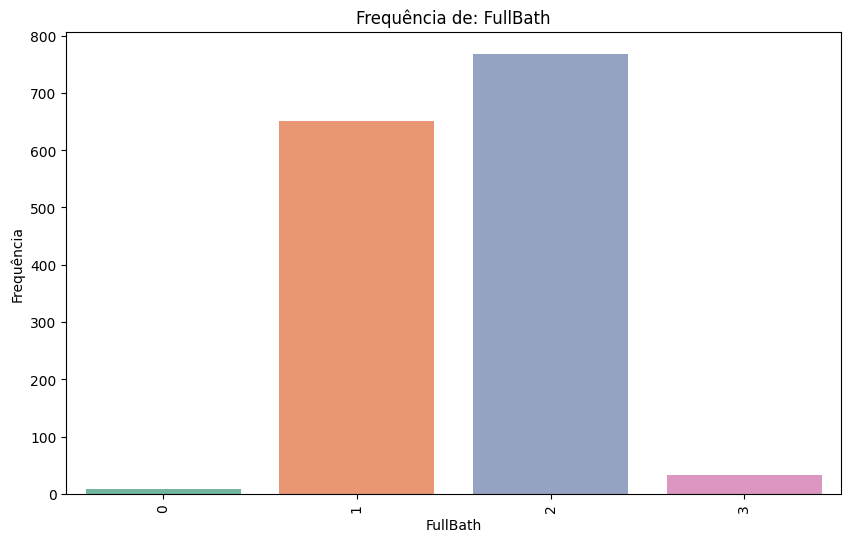

Frequência da coluna FullBath:
   FullBath  Frequência
0         2         768
1         1         650
2         3          33
3         0           9




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


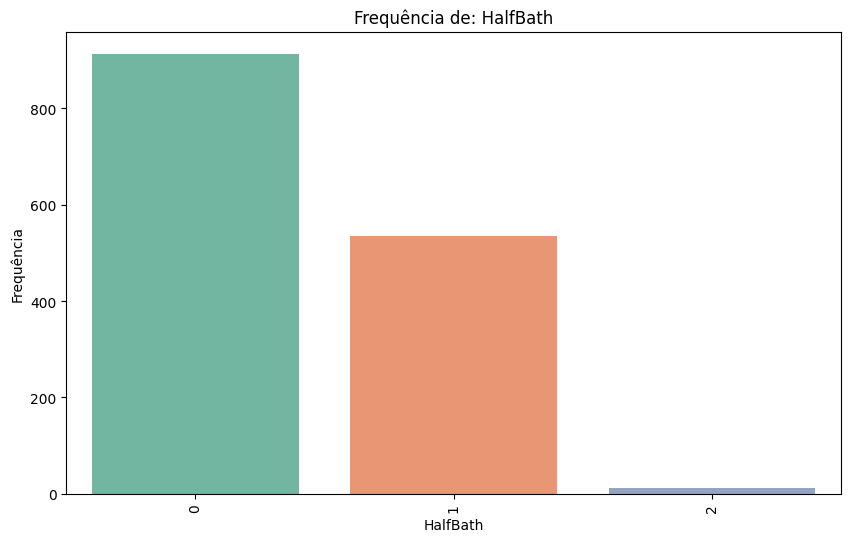

Frequência da coluna HalfBath:
   HalfBath  Frequência
0         0         913
1         1         535
2         2          12




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


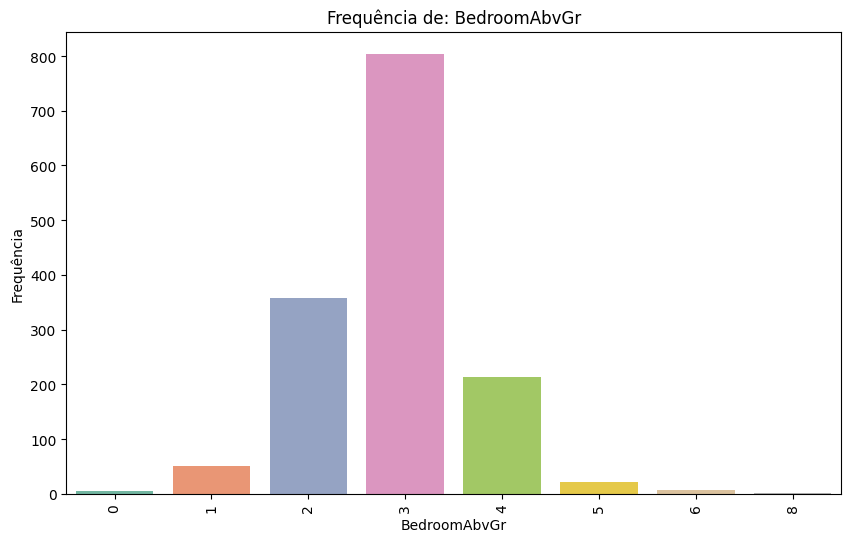

Frequência da coluna BedroomAbvGr:
   BedroomAbvGr  Frequência
0             3         804
1             2         358
2             4         213
3             1          50
4             5          21
5             6           7
6             0           6
7             8           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


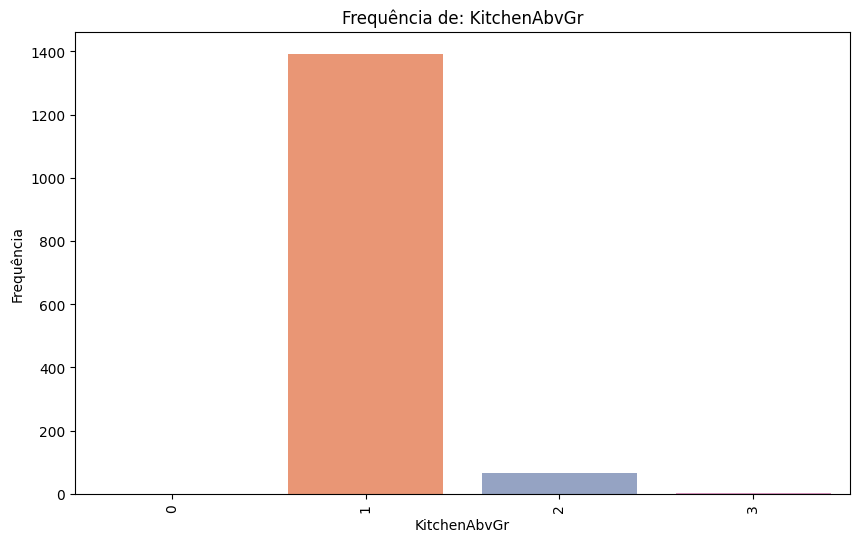

Frequência da coluna KitchenAbvGr:
   KitchenAbvGr  Frequência
0             1        1392
1             2          65
2             3           2
3             0           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


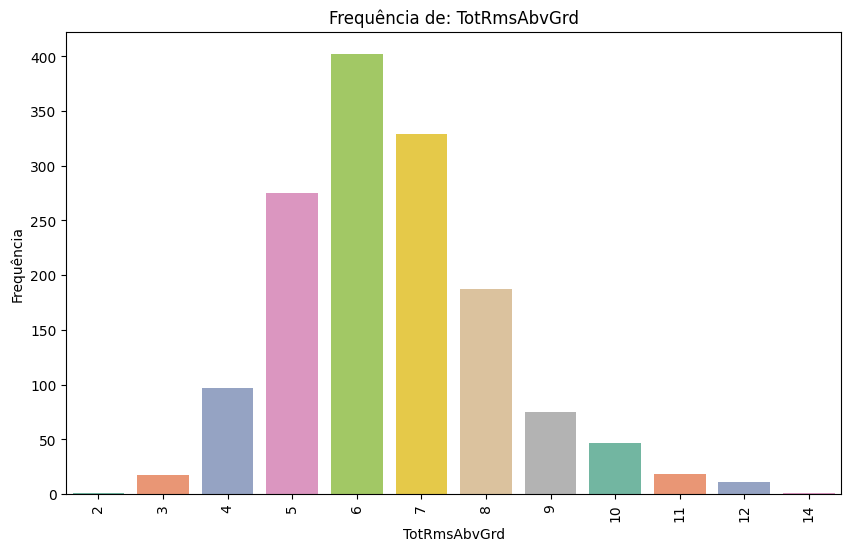

Frequência da coluna TotRmsAbvGrd:
    TotRmsAbvGrd  Frequência
0              6         402
1              7         329
2              5         275
3              8         187
4              4          97
5              9          75
6             10          47
7             11          18
8              3          17
9             12          11
10             2           1
11            14           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


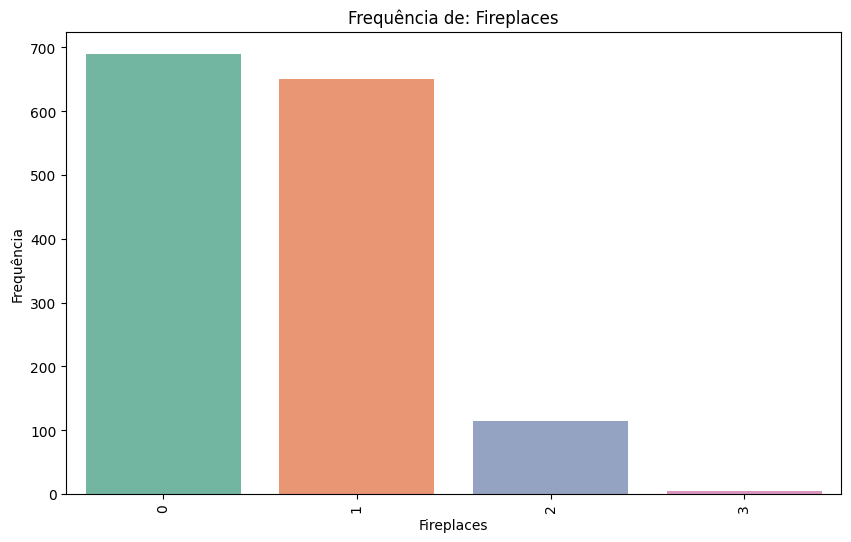

Frequência da coluna Fireplaces:
   Fireplaces  Frequência
0           0         690
1           1         650
2           2         115
3           3           5




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


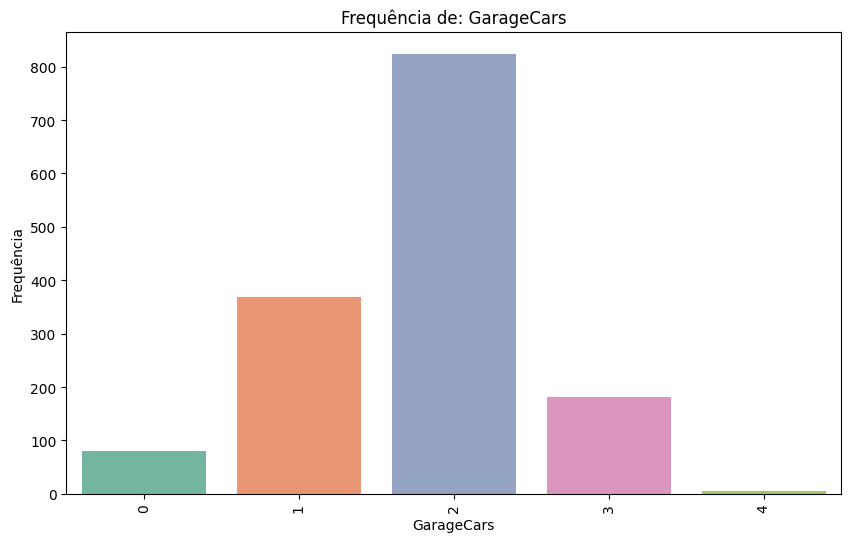

Frequência da coluna GarageCars:
   GarageCars  Frequência
0           2         824
1           1         369
2           3         181
3           0          81
4           4           5




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


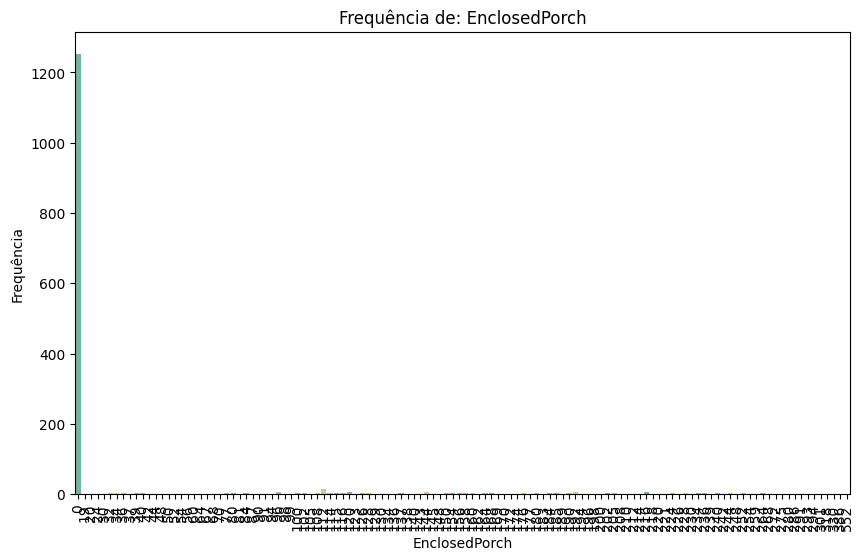

Frequência da coluna EnclosedPorch:
     EnclosedPorch  Frequência
0                0        1252
1              112          15
2               96           6
3              192           5
4              144           5
..             ...         ...
115             54           1
116            136           1
117            148           1
118            140           1
119             99           1

[120 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


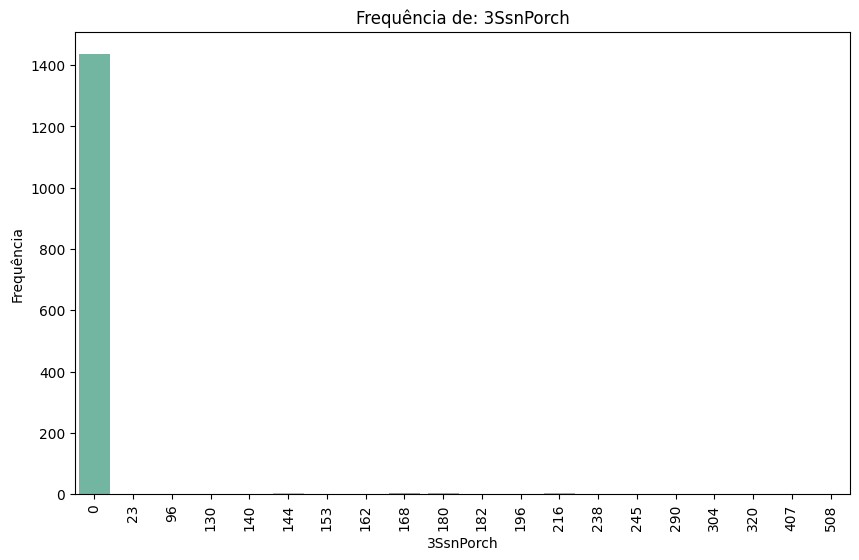

Frequência da coluna 3SsnPorch:
    3SsnPorch  Frequência
0           0        1436
1         168           3
2         144           2
3         180           2
4         216           2
5         290           1
6         153           1
7          96           1
8          23           1
9         162           1
10        182           1
11        196           1
12        320           1
13        245           1
14        238           1
15        508           1
16        140           1
17        130           1
18        407           1
19        304           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


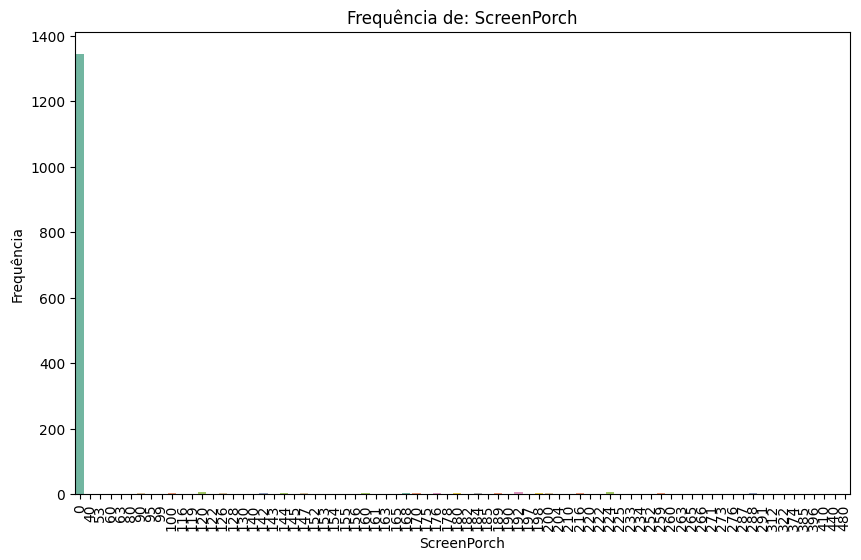

Frequência da coluna ScreenPorch:
    ScreenPorch  Frequência
0             0        1344
1           192           6
2           120           5
3           224           5
4           189           4
..          ...         ...
71          291           1
72          260           1
73          385           1
74          156           1
75           40           1

[76 rows x 2 columns]




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


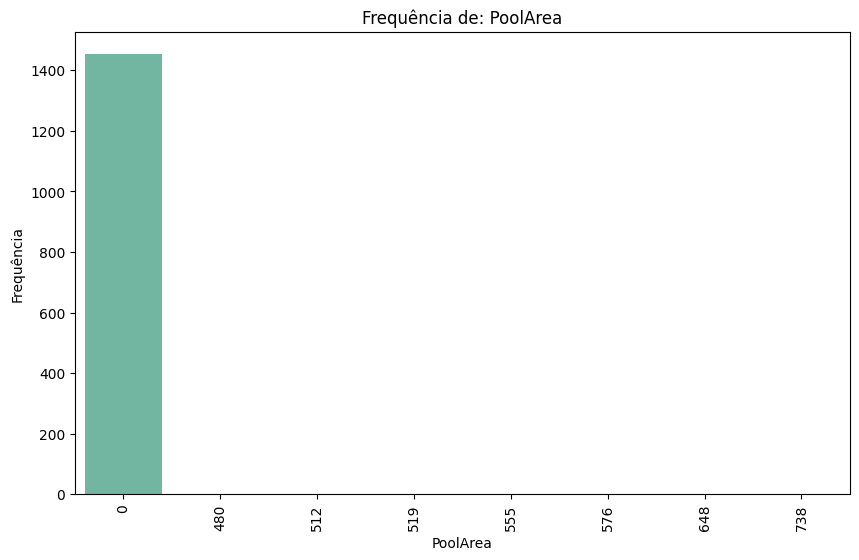

Frequência da coluna PoolArea:
   PoolArea  Frequência
0         0        1453
1       512           1
2       648           1
3       576           1
4       555           1
5       480           1
6       519           1
7       738           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


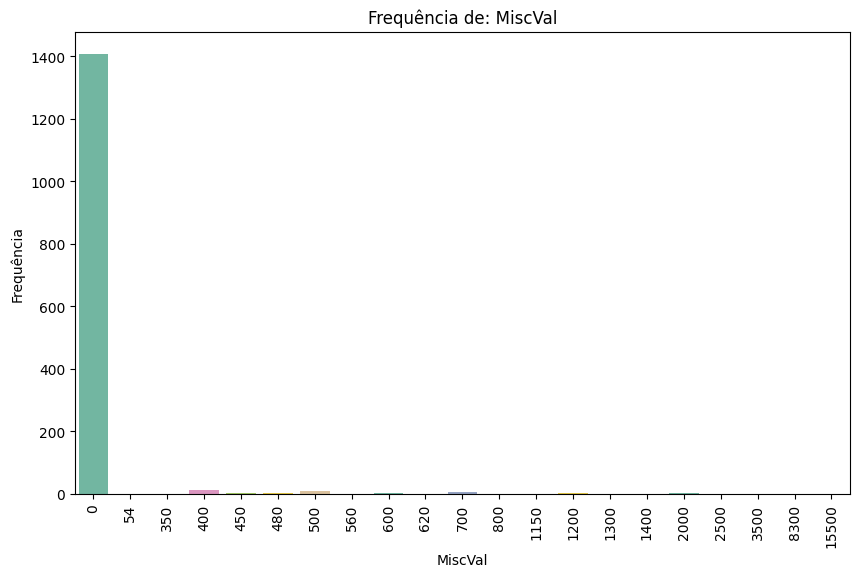

Frequência da coluna MiscVal:
    MiscVal  Frequência
0         0        1408
1       400          11
2       500           8
3       700           5
4       450           4
5       600           4
6      2000           4
7      1200           2
8       480           2
9     15500           1
10      800           1
11      350           1
12     3500           1
13     1300           1
14       54           1
15      620           1
16      560           1
17     1400           1
18     8300           1
19     1150           1
20     2500           1




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


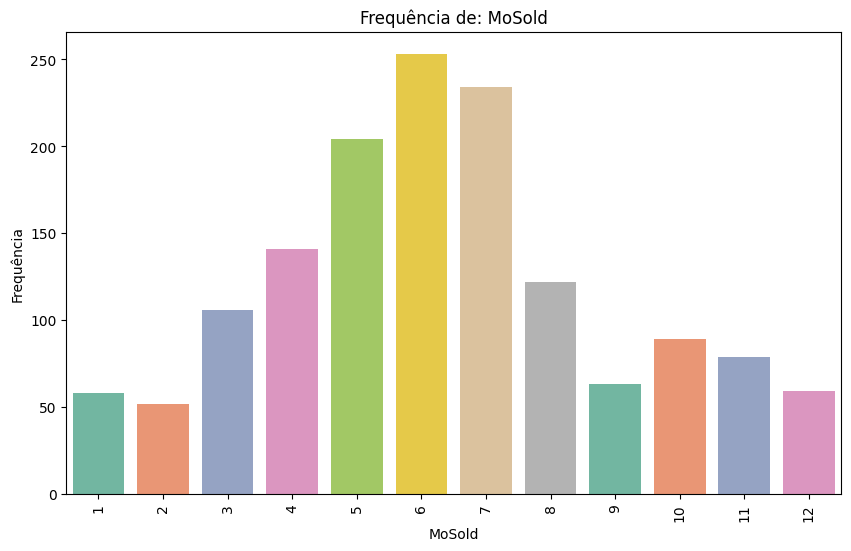

Frequência da coluna MoSold:
    MoSold  Frequência
0        6         253
1        7         234
2        5         204
3        4         141
4        8         122
5        3         106
6       10          89
7       11          79
8        9          63
9       12          59
10       1          58
11       2          52




<ipython-input-24-361b49bce74a>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train, x=col, palette="Set2")


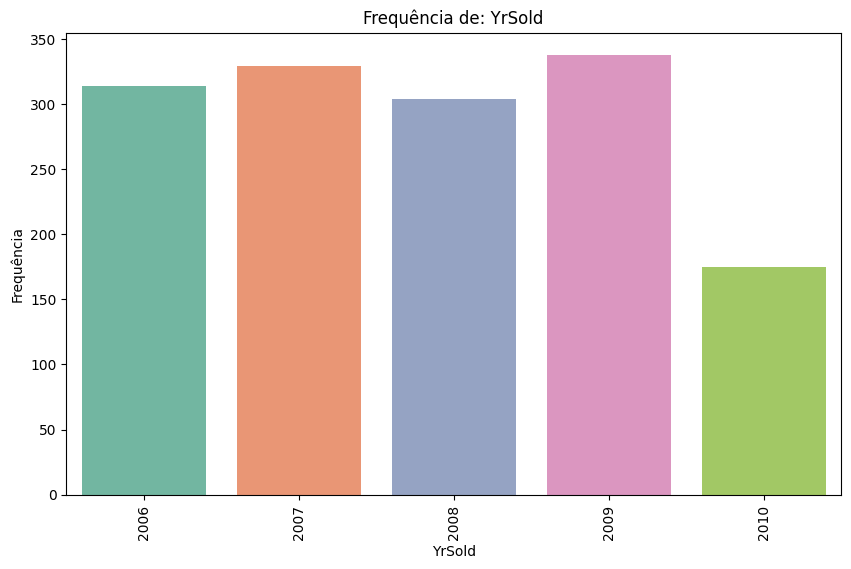

Frequência da coluna YrSold:
   YrSold  Frequência
0    2009         338
1    2007         329
2    2006         314
3    2008         304
4    2010         175




In [24]:
col_pular = [
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice'
    ]
for col in col_num:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=train, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = train[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

# Teste dataset

In [25]:
# Exibir as primeiras linhas dos dados

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [26]:
# Informações em geral do dataset: os nomes das colunas, quantas linhas estão preenchidas e os tipos de dados em cada coluna

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

## Limpando as colunas:

In [27]:
# Verificar a quantidade de valores ausentes por coluna
valores_ausentes = test.isnull().sum()
print(valores_ausentes[valores_ausentes > 0])

# Visualizar a porcentagem de valores ausentes
porcentagem_ausentes = (test.isnull().mean() * 100)
print(porcentagem_ausentes[porcentagem_ausentes > 0])

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64
MSZoning         0.274160
LotFrontage     15.558602
Alley           92.666210
Utilities        0.137080
Exterior1st      0.068540
Exterior2nd      0.068540
MasVnrType      61.274846
MasVnrArea       1.028101
BsmtQual         3.015764
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtFinT

In [28]:
# Remover colunas com mais de 80% de dados ausentes
test = test.drop(columns=['PoolQC', 'Fence', 'MiscFeature'])

In [29]:
# Preencher valores ausentes com a categoria "None" ou "No Fireplace"
test['MasVnrType'] = test['MasVnrType'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('No Fireplace')

In [30]:
# Preencher LotFrontage com a mediana
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].median())

# Preencher GarageType, GarageYrBlt, GarageFinish, GarageQual, GarageCond com "No Garage"
garage_columns = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']
for col in garage_columns:
    test[col] = test[col].fillna('No Garage')


In [31]:
# Preencher MasVnrArea com a mediana
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].median())

# Preencher Electrical com a moda (valor mais frequente)
test['Electrical'] = test['Electrical'].fillna(test['Electrical'].mode()[0])

In [32]:
# Verificar se ainda existem valores ausentes
print(test.isnull().sum().sum())  # Se o resultado for 0, não há mais valores ausentes

1591


In [33]:
# Verificar as colunas com valores ausentes restantes
valores_ausentes_restantes = test.isnull().sum()
print(valores_ausentes_restantes[valores_ausentes_restantes > 0])

MSZoning           4
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageCars         1
GarageArea         1
SaleType           1
dtype: int64


In [44]:
# Preencher valores ausentes nas colunas numéricas com a mediana
for coluna in valores_ausentes_restantes[valores_ausentes_restantes > 0].index:
    # Verificar se a coluna é numérica antes de calcular a mediana
    if pd.api.types.is_numeric_dtype(test[coluna]):
        test[coluna] = test[coluna].fillna(test[coluna].median())
    else:
        # Se a coluna não for numérica, preencher com a moda ou outro valor apropriado
        # Aqui, estou preenchendo com a moda, mas você pode ajustar conforme necessário
        test[coluna] = test[coluna].fillna(test[coluna].mode()[0])


In [45]:
# Verificar se ainda existem valores ausentes
print(test.isnull().sum().sum())  # Se o resultado for 0, não há mais valores ausentes

0


In [46]:
# Verificar se há valores duplicados no dataset
duplicados = test.duplicated().sum()
print(f'Número de registros duplicados no dataset: {duplicados}')

# Excluir registros duplicados, se houver
test = test.drop_duplicates()


Número de registros duplicados no dataset: 0


## EDA das colunas de teste:

In [47]:
# A ideia é agrupar o dataset em dois valores, obje para as colunas objetivas e num para as colunas numericas, vamos usar isso futuramente

col_obj = []
col_num = []

for col in test.columns:
    if train[col].dtype == 'object':
        col_obj.append(col)
    else :
        col_num.append(col)

<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


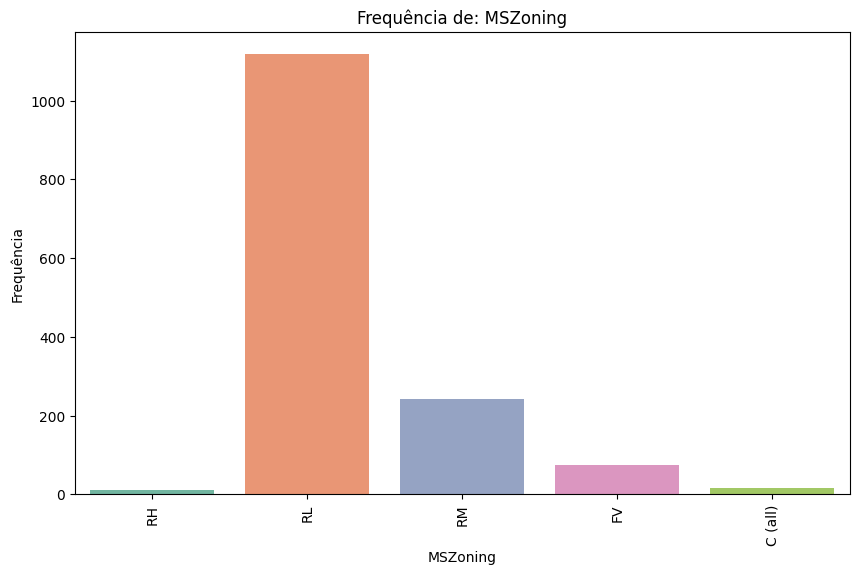

Frequência da coluna MSZoning:
  MSZoning  Frequência
0       RL        1118
1       RM         242
2       FV          74
3  C (all)          15
4       RH          10




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


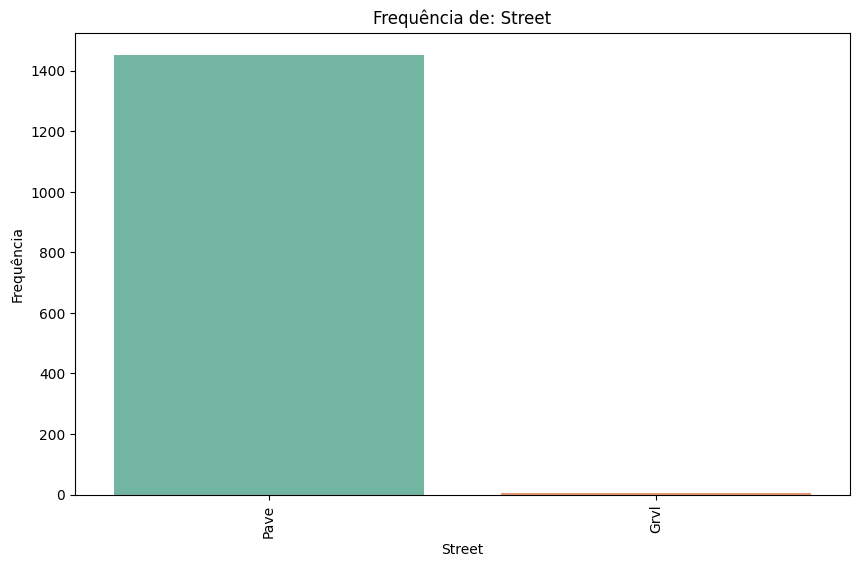

Frequência da coluna Street:
  Street  Frequência
0   Pave        1453
1   Grvl           6




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


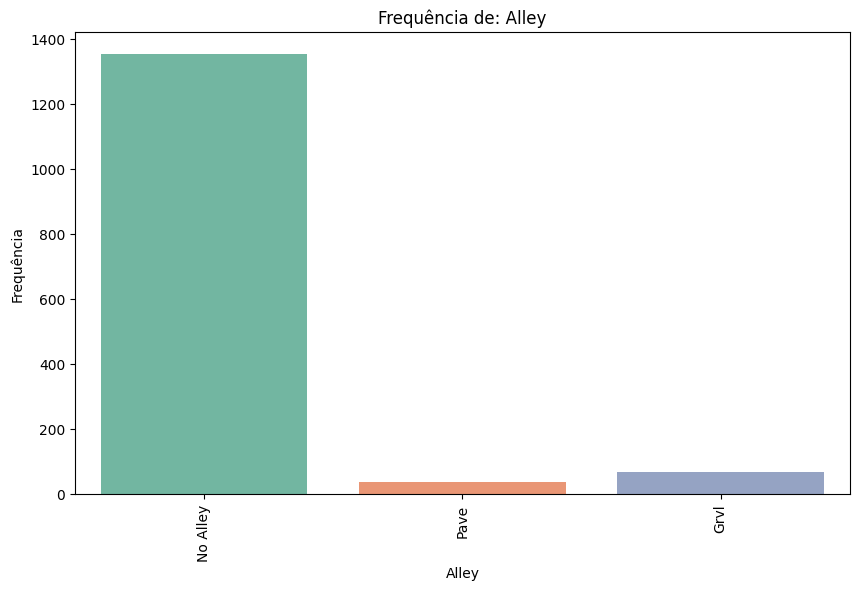

Frequência da coluna Alley:
      Alley  Frequência
0  No Alley        1352
1      Grvl          70
2      Pave          37




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


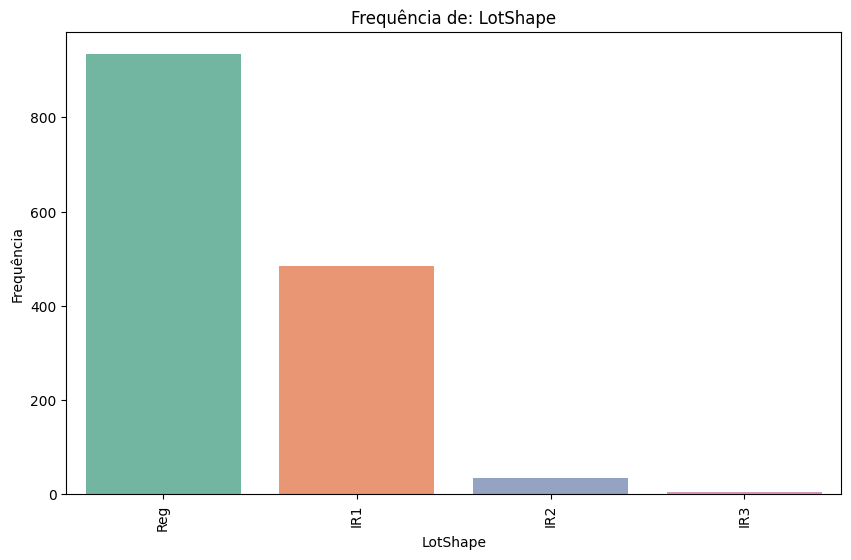

Frequência da coluna LotShape:
  LotShape  Frequência
0      Reg         934
1      IR1         484
2      IR2          35
3      IR3           6




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


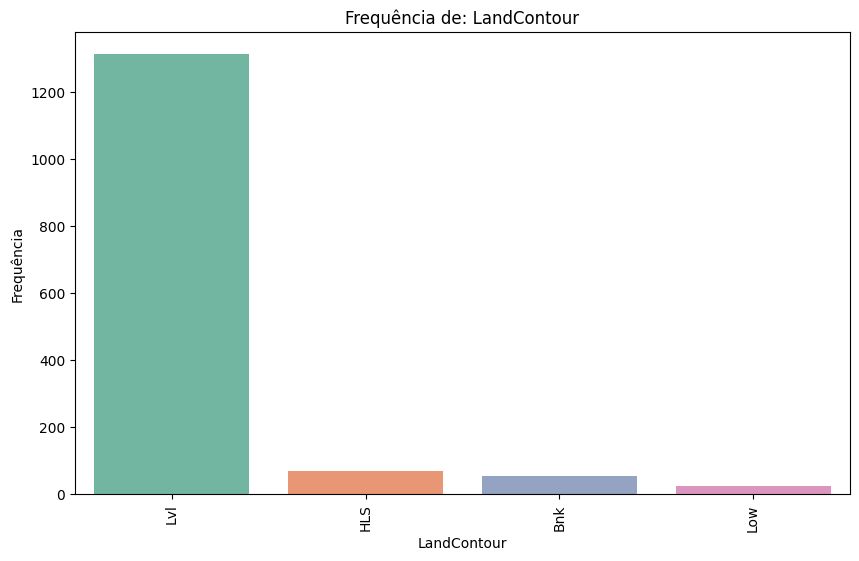

Frequência da coluna LandContour:
  LandContour  Frequência
0         Lvl        1311
1         HLS          70
2         Bnk          54
3         Low          24




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


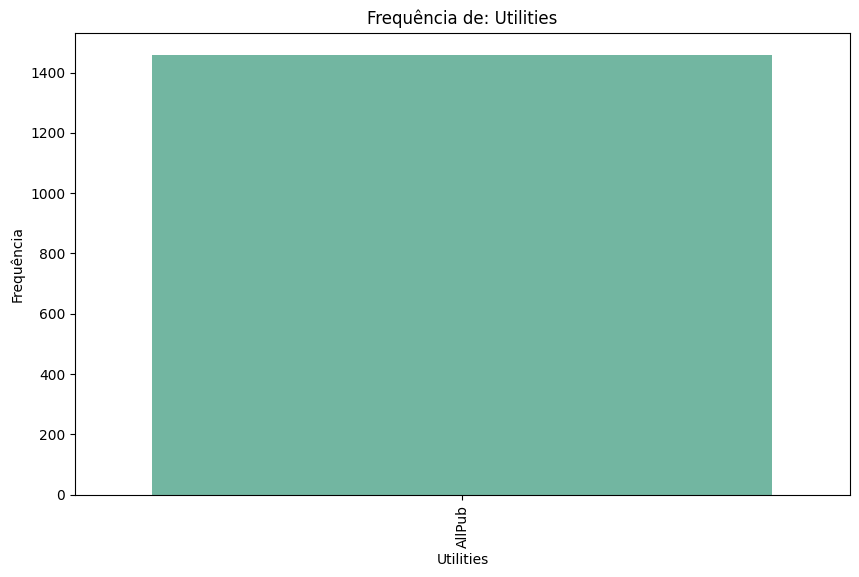

Frequência da coluna Utilities:
  Utilities  Frequência
0    AllPub        1459




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


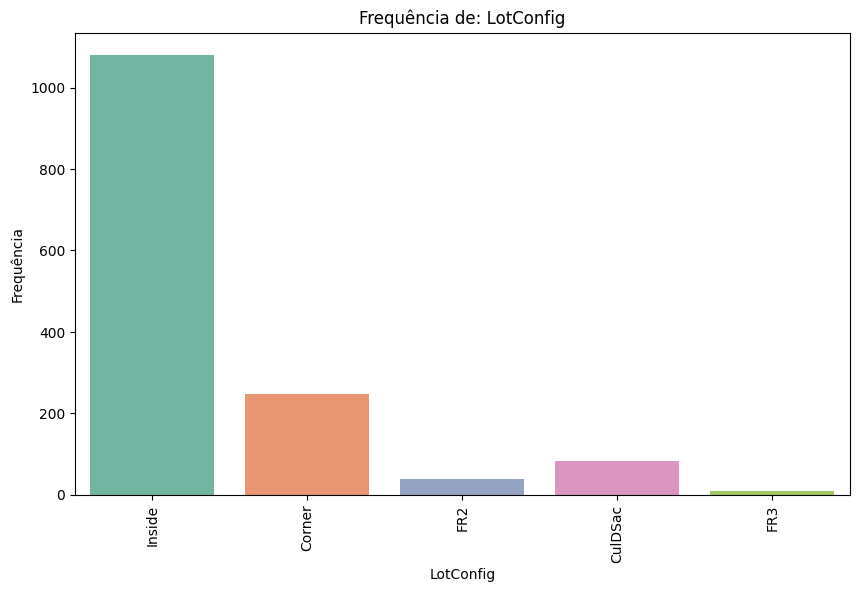

Frequência da coluna LotConfig:
  LotConfig  Frequência
0    Inside        1081
1    Corner         248
2   CulDSac          82
3       FR2          38
4       FR3          10




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


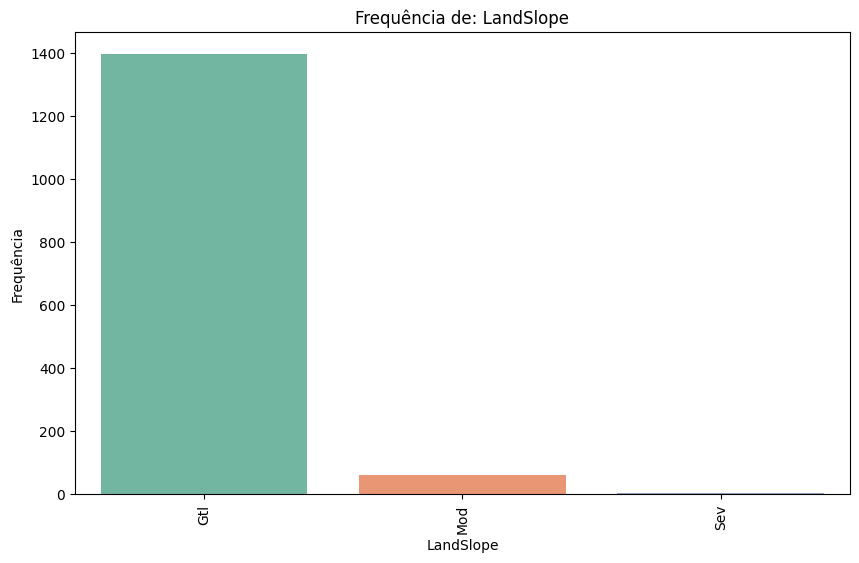

Frequência da coluna LandSlope:
  LandSlope  Frequência
0       Gtl        1396
1       Mod          60
2       Sev           3




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


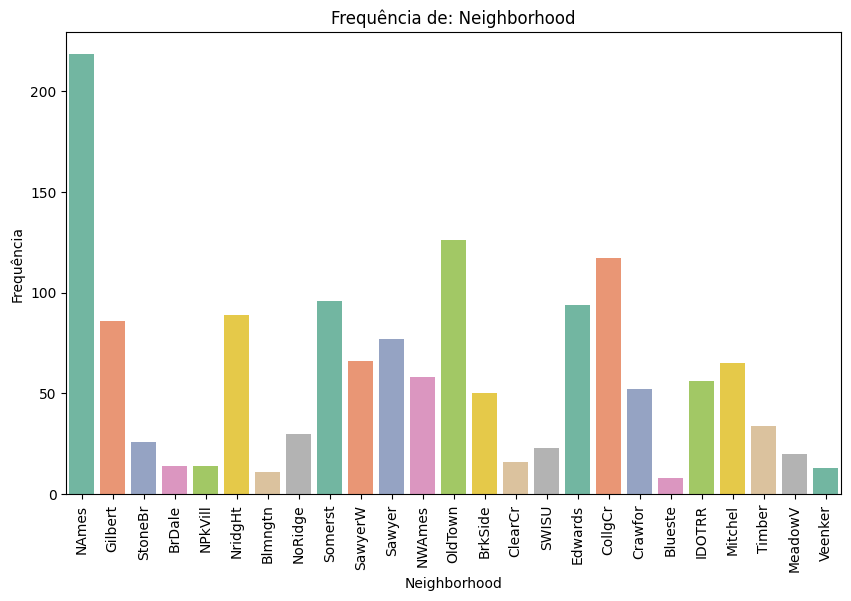

Frequência da coluna Neighborhood:
   Neighborhood  Frequência
0         NAmes         218
1       OldTown         126
2       CollgCr         117
3       Somerst          96
4       Edwards          94
5       NridgHt          89
6       Gilbert          86
7        Sawyer          77
8       SawyerW          66
9       Mitchel          65
10       NWAmes          58
11       IDOTRR          56
12      Crawfor          52
13      BrkSide          50
14       Timber          34
15      NoRidge          30
16      StoneBr          26
17        SWISU          23
18      MeadowV          20
19      ClearCr          16
20       BrDale          14
21      NPkVill          14
22      Veenker          13
23      Blmngtn          11
24      Blueste           8




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


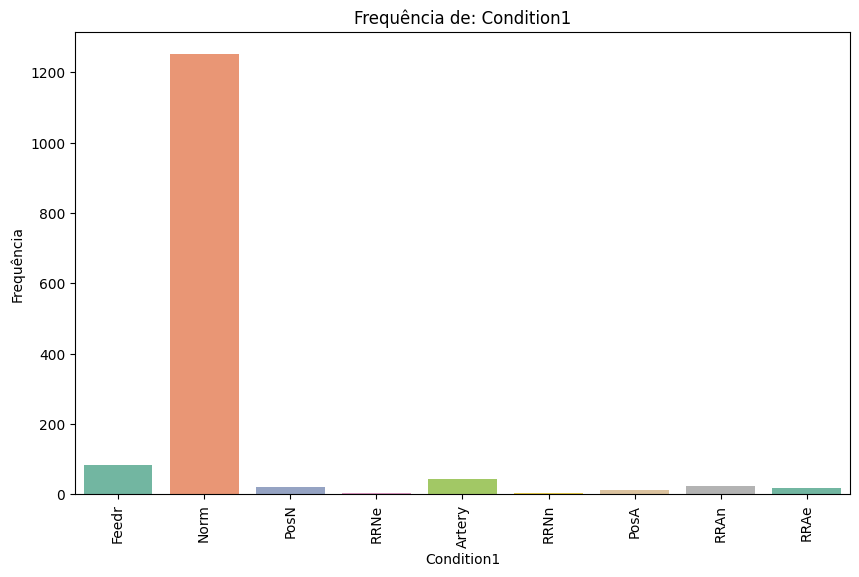

Frequência da coluna Condition1:
  Condition1  Frequência
0       Norm        1251
1      Feedr          83
2     Artery          44
3       RRAn          24
4       PosN          20
5       RRAe          17
6       PosA          12
7       RRNe           4
8       RRNn           4




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


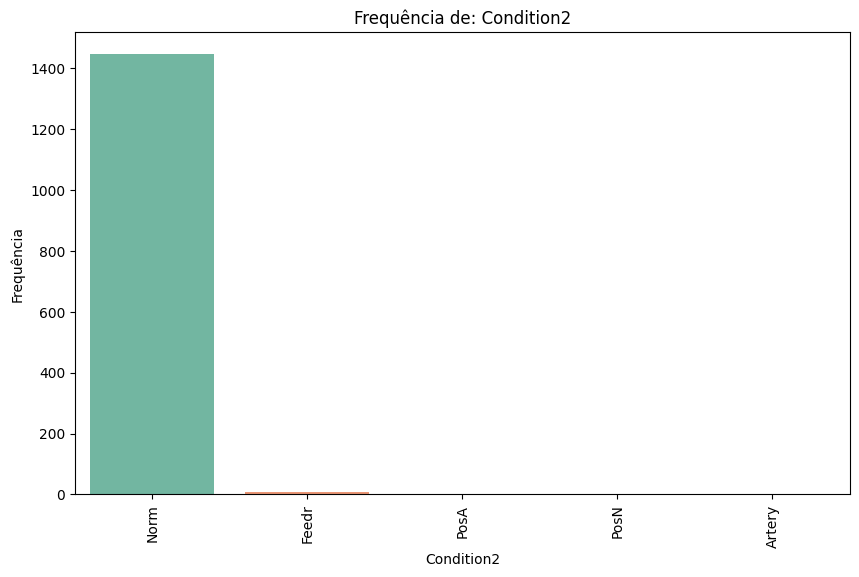

Frequência da coluna Condition2:
  Condition2  Frequência
0       Norm        1444
1      Feedr           7
2       PosA           3
3     Artery           3
4       PosN           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


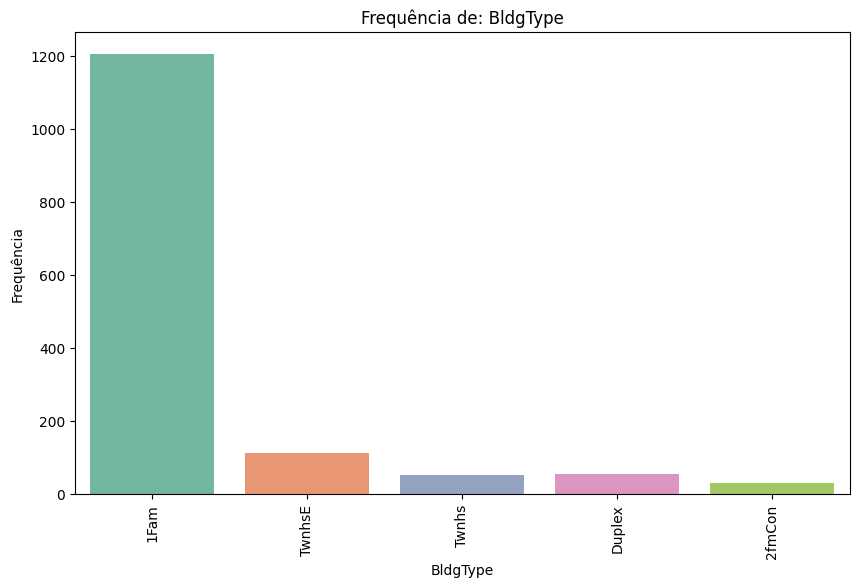

Frequência da coluna BldgType:
  BldgType  Frequência
0     1Fam        1205
1   TwnhsE         113
2   Duplex          57
3    Twnhs          53
4   2fmCon          31




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


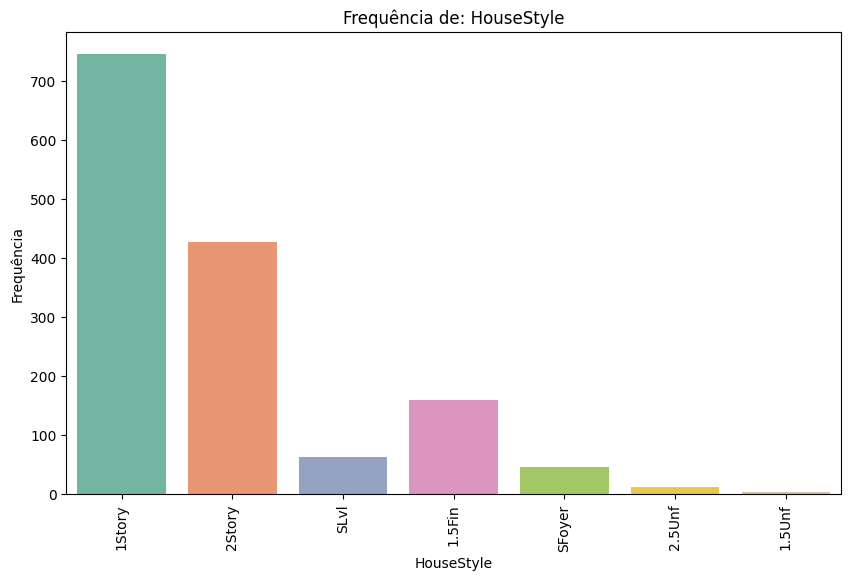

Frequência da coluna HouseStyle:
  HouseStyle  Frequência
0     1Story         745
1     2Story         427
2     1.5Fin         160
3       SLvl          63
4     SFoyer          46
5     2.5Unf          13
6     1.5Unf           5




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


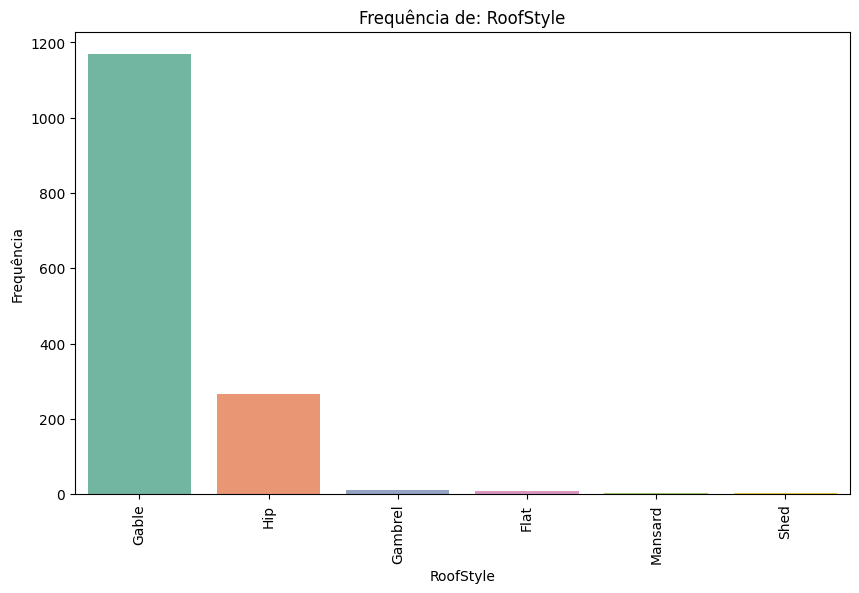

Frequência da coluna RoofStyle:
  RoofStyle  Frequência
0     Gable        1169
1       Hip         265
2   Gambrel          11
3      Flat           7
4   Mansard           4
5      Shed           3




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


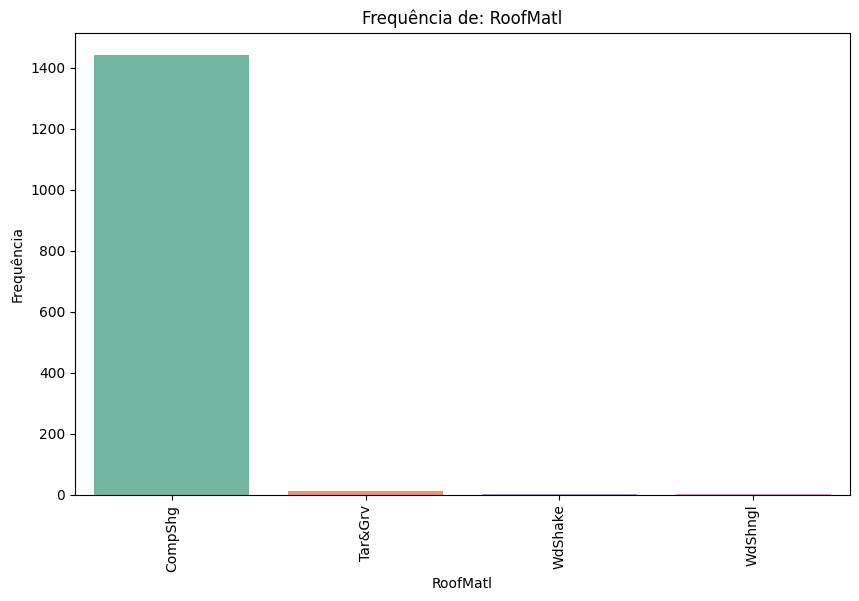

<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


Frequência da coluna RoofMatl:
  RoofMatl  Frequência
0  CompShg        1442
1  Tar&Grv          12
2  WdShake           4
3  WdShngl           1




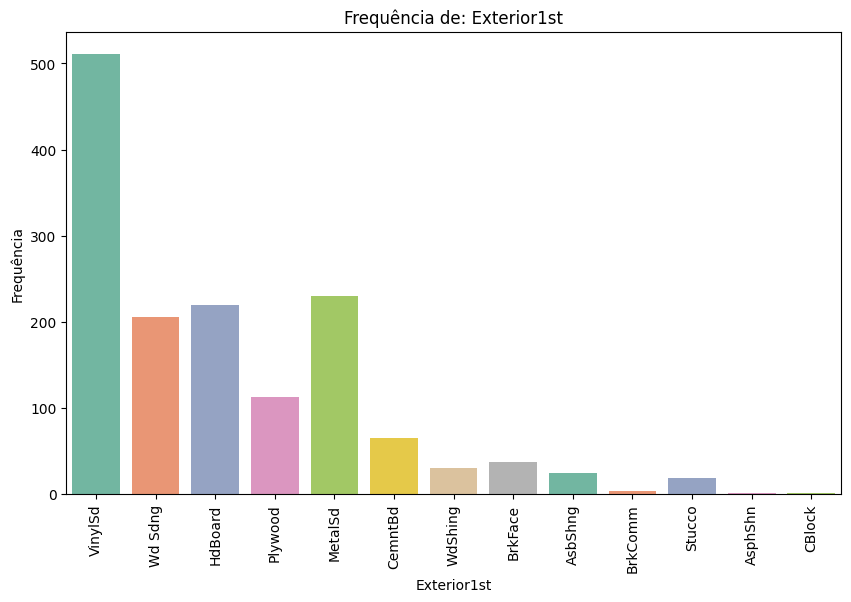

Frequência da coluna Exterior1st:
   Exterior1st  Frequência
0      VinylSd         511
1      MetalSd         230
2      HdBoard         220
3      Wd Sdng         205
4      Plywood         113
5      CemntBd          65
6      BrkFace          37
7      WdShing          30
8      AsbShng          24
9       Stucco          18
10     BrkComm           4
11     AsphShn           1
12      CBlock           1




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


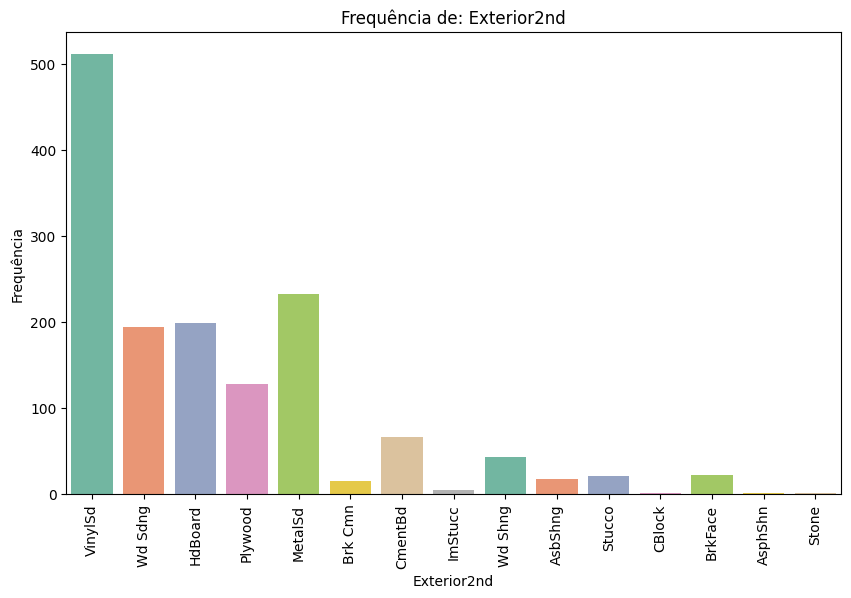

Frequência da coluna Exterior2nd:
   Exterior2nd  Frequência
0      VinylSd         511
1      MetalSd         233
2      HdBoard         199
3      Wd Sdng         194
4      Plywood         128
5      CmentBd          66
6      Wd Shng          43
7      BrkFace          22
8       Stucco          21
9      AsbShng          18
10     Brk Cmn          15
11     ImStucc           5
12      CBlock           2
13     AsphShn           1
14       Stone           1




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


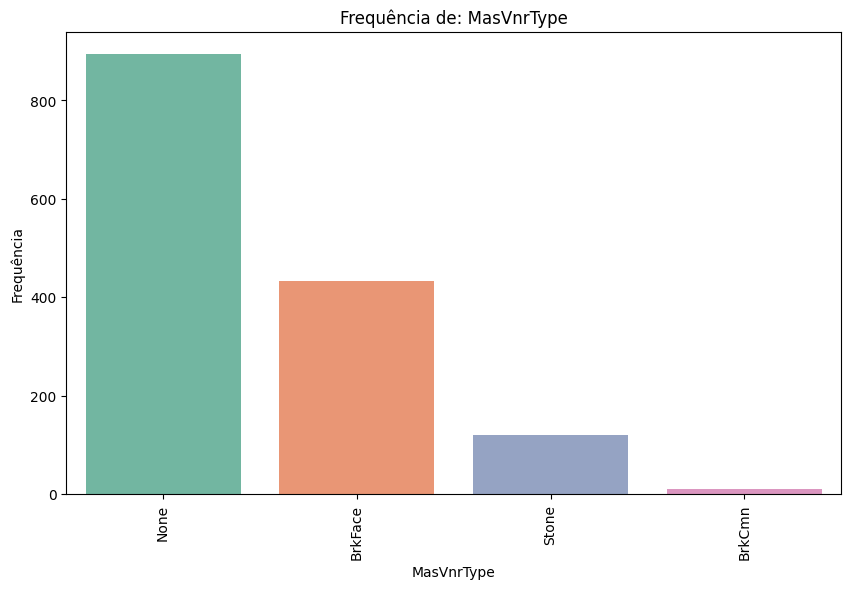

Frequência da coluna MasVnrType:
  MasVnrType  Frequência
0       None         894
1    BrkFace         434
2      Stone         121
3     BrkCmn          10




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


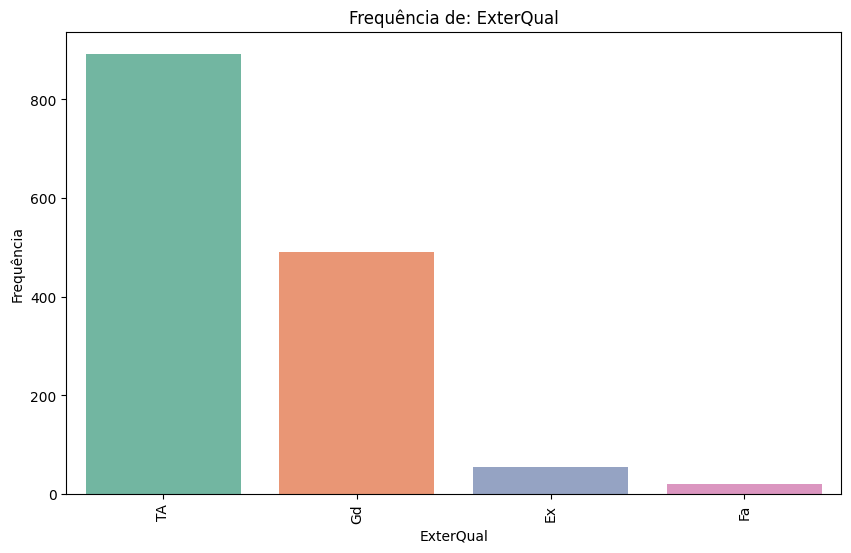

Frequência da coluna ExterQual:
  ExterQual  Frequência
0        TA         892
1        Gd         491
2        Ex          55
3        Fa          21




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


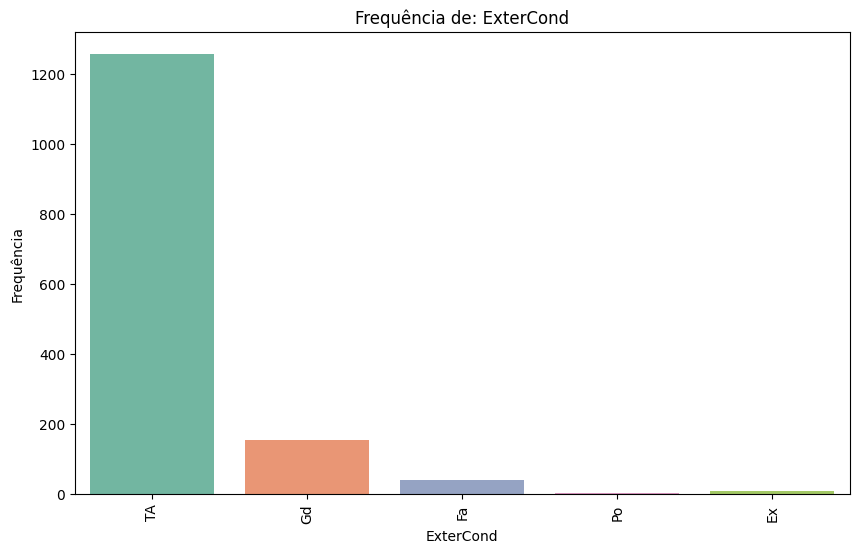

Frequência da coluna ExterCond:
  ExterCond  Frequência
0        TA        1256
1        Gd         153
2        Fa          39
3        Ex           9
4        Po           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


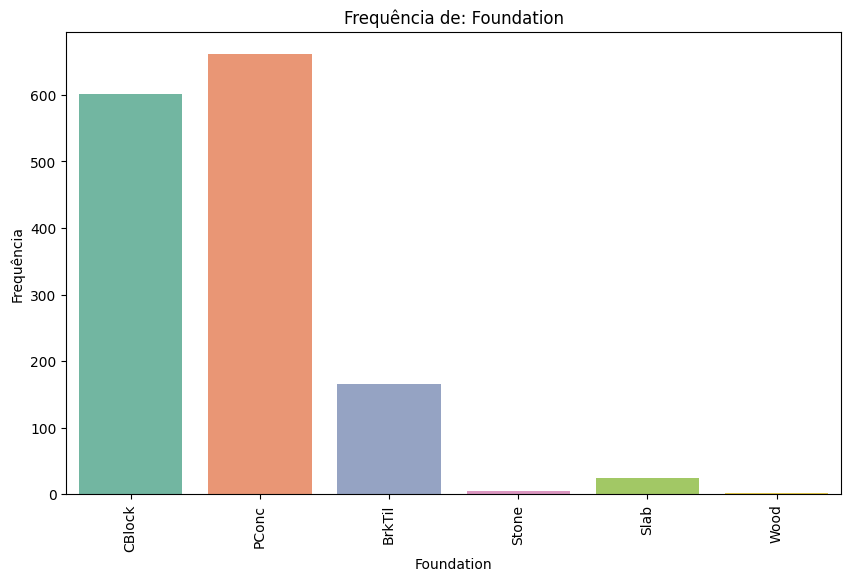

Frequência da coluna Foundation:
  Foundation  Frequência
0      PConc         661
1     CBlock         601
2     BrkTil         165
3       Slab          25
4      Stone           5
5       Wood           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


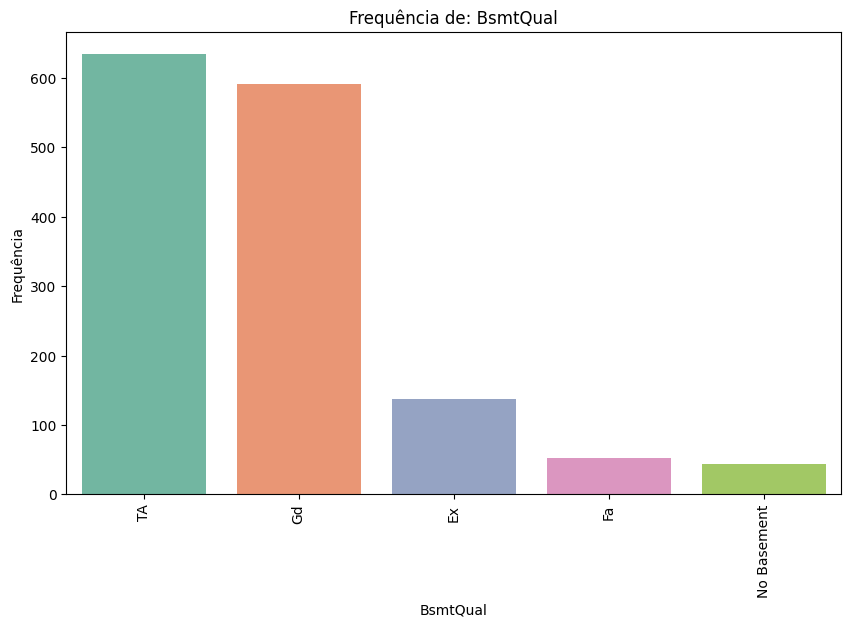

Frequência da coluna BsmtQual:
      BsmtQual  Frequência
0           TA         634
1           Gd         591
2           Ex         137
3           Fa          53
4  No Basement          44




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


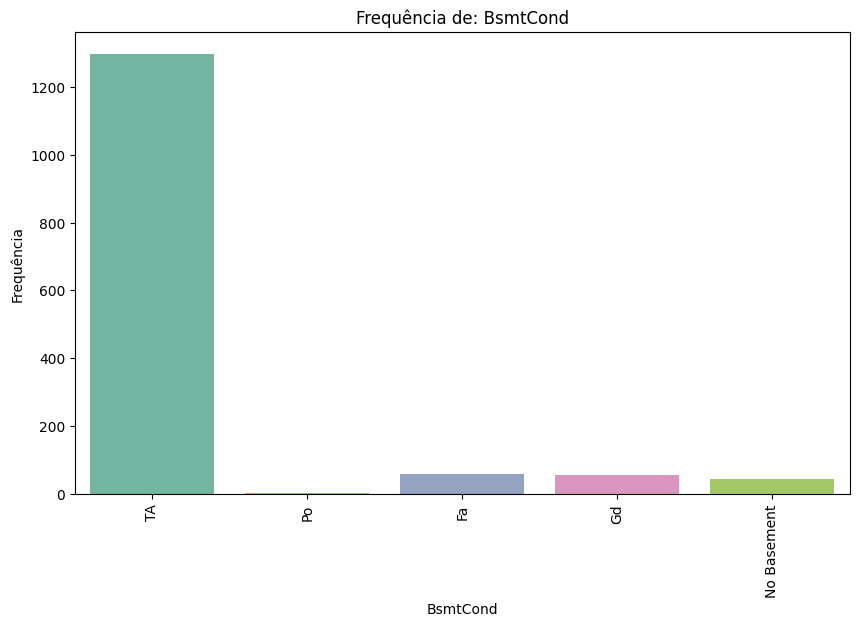

Frequência da coluna BsmtCond:
      BsmtCond  Frequência
0           TA        1295
1           Fa          59
2           Gd          57
3  No Basement          45
4           Po           3




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


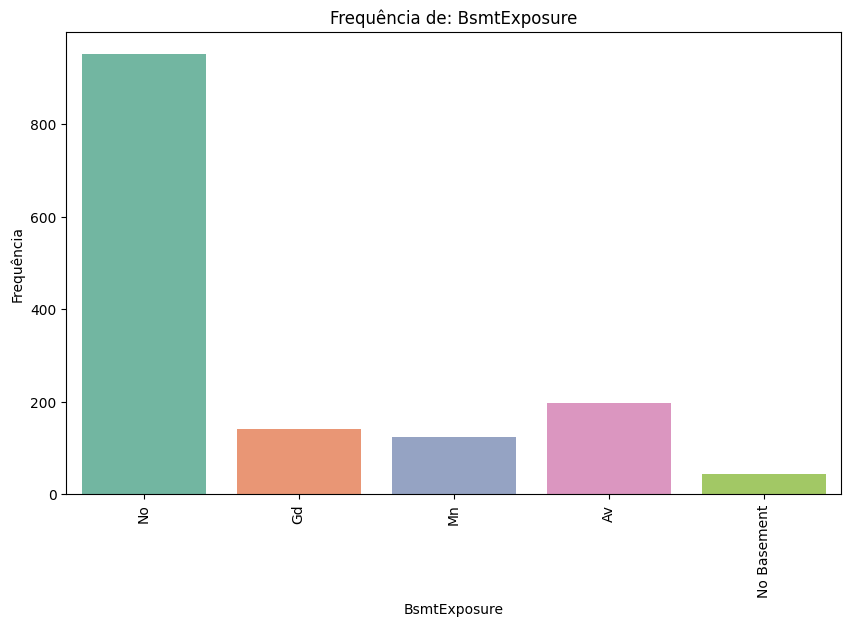

Frequência da coluna BsmtExposure:
  BsmtExposure  Frequência
0           No         951
1           Av         197
2           Gd         142
3           Mn         125
4  No Basement          44




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


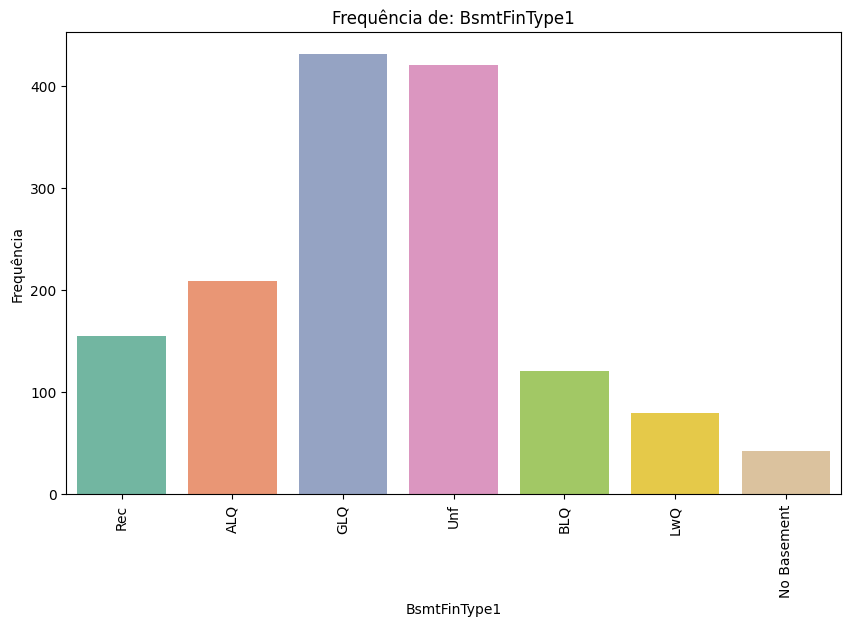

Frequência da coluna BsmtFinType1:
  BsmtFinType1  Frequência
0          GLQ         431
1          Unf         421
2          ALQ         209
3          Rec         155
4          BLQ         121
5          LwQ          80
6  No Basement          42




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


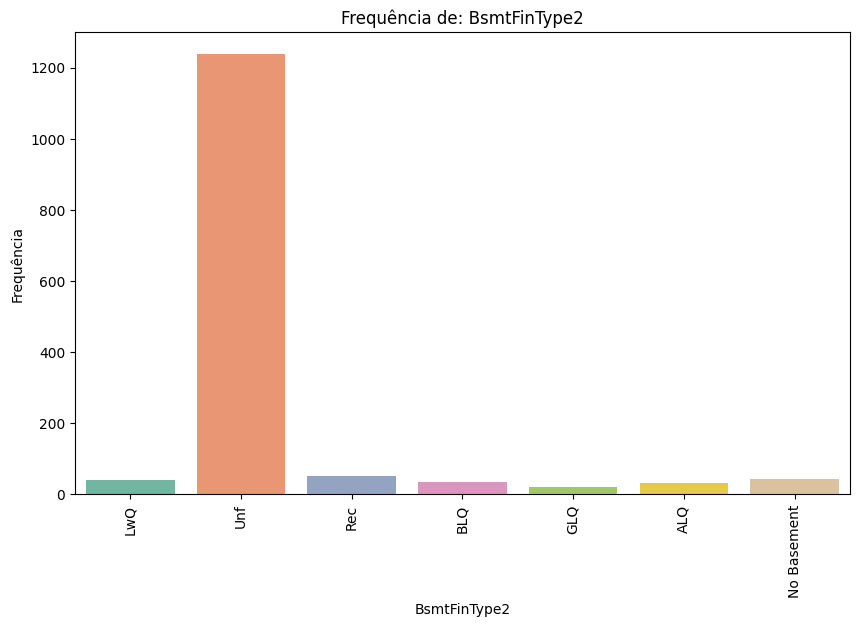

Frequência da coluna BsmtFinType2:
  BsmtFinType2  Frequência
0          Unf        1237
1          Rec          51
2  No Basement          42
3          LwQ          41
4          BLQ          35
5          ALQ          33
6          GLQ          20




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


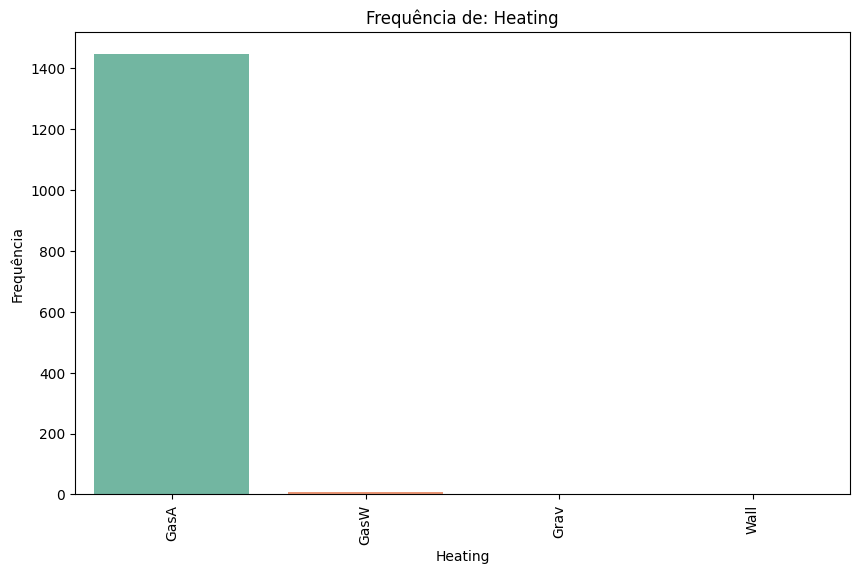

Frequência da coluna Heating:
  Heating  Frequência
0    GasA        1446
1    GasW           9
2    Grav           2
3    Wall           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


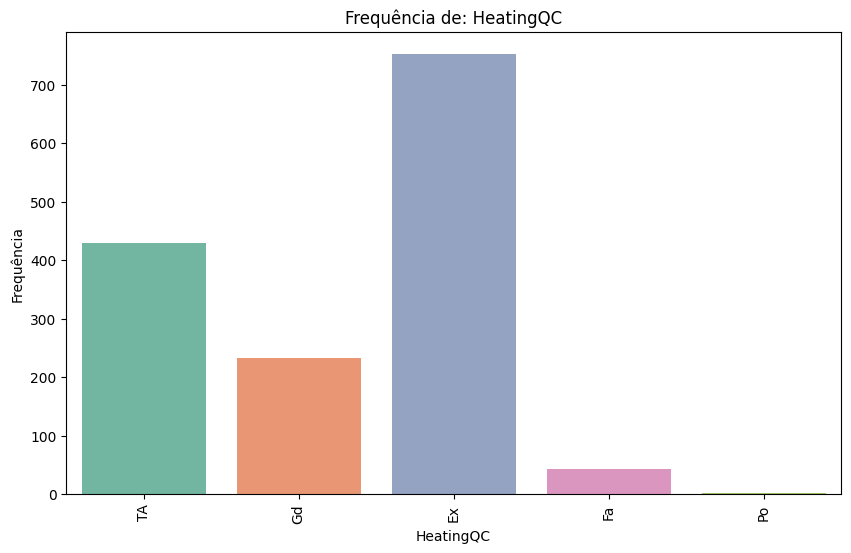

Frequência da coluna HeatingQC:
  HeatingQC  Frequência
0        Ex         752
1        TA         429
2        Gd         233
3        Fa          43
4        Po           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


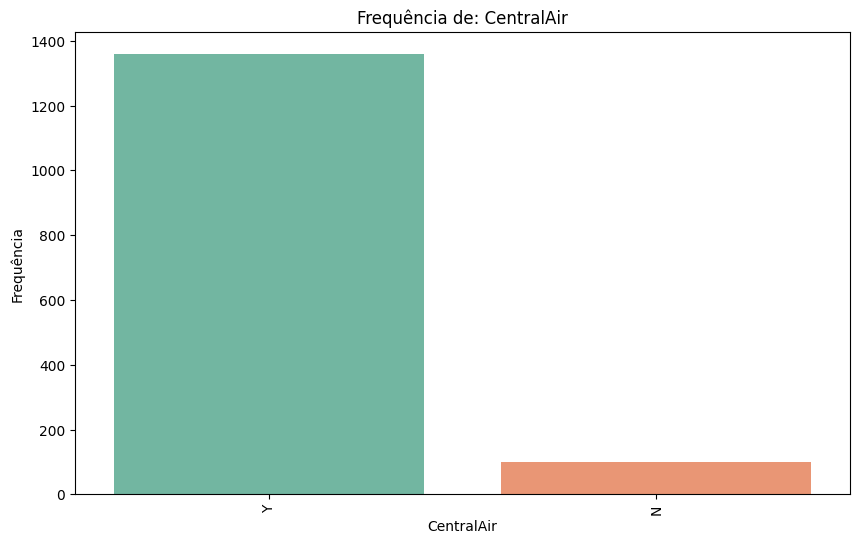

Frequência da coluna CentralAir:
  CentralAir  Frequência
0          Y        1358
1          N         101




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


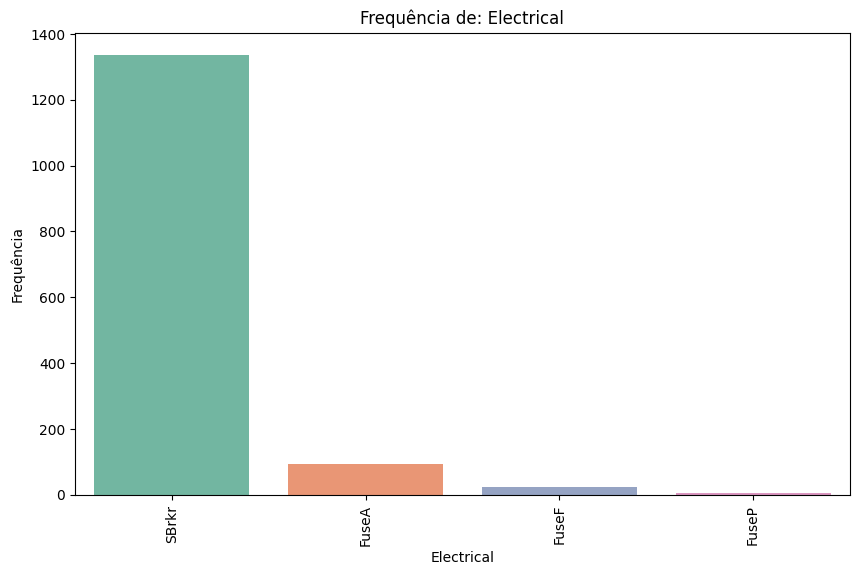

Frequência da coluna Electrical:
  Electrical  Frequência
0      SBrkr        1337
1      FuseA          94
2      FuseF          23
3      FuseP           5




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


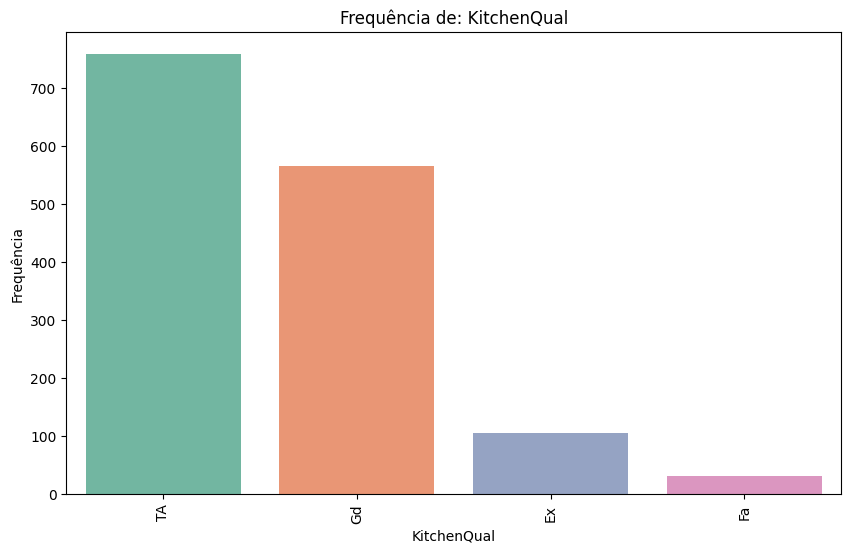

Frequência da coluna KitchenQual:
  KitchenQual  Frequência
0          TA         758
1          Gd         565
2          Ex         105
3          Fa          31




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


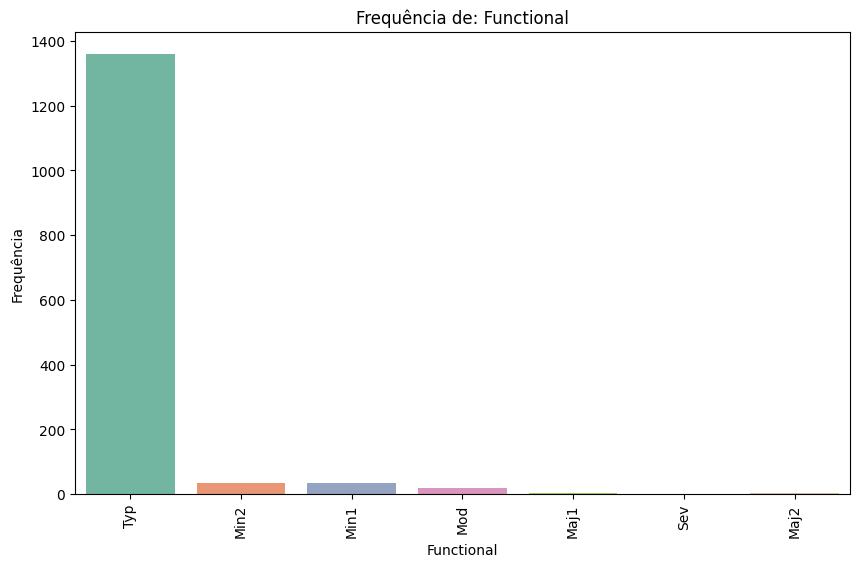

Frequência da coluna Functional:
  Functional  Frequência
0        Typ        1359
1       Min2          36
2       Min1          34
3        Mod          20
4       Maj1           5
5       Maj2           4
6        Sev           1




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


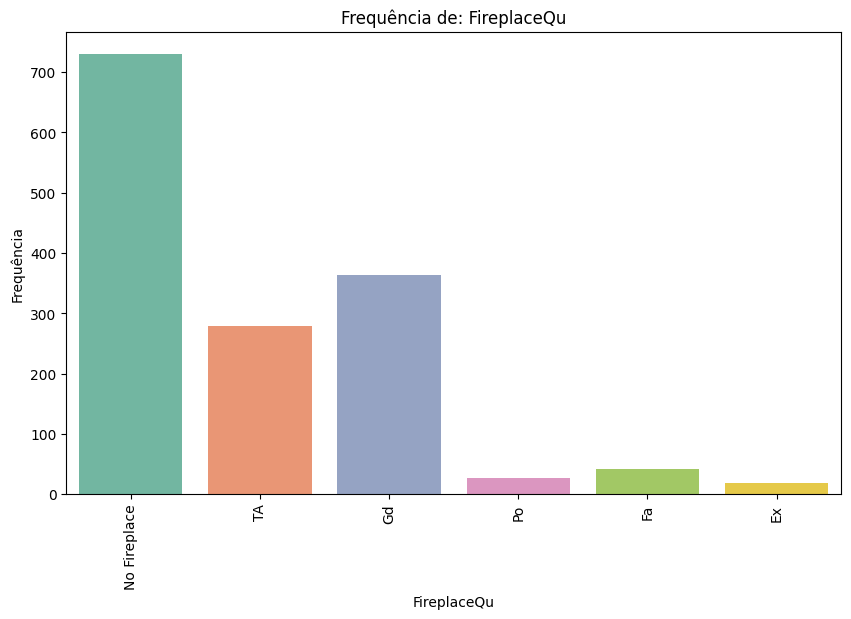

Frequência da coluna FireplaceQu:
    FireplaceQu  Frequência
0  No Fireplace         730
1            Gd         364
2            TA         279
3            Fa          41
4            Po          26
5            Ex          19




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


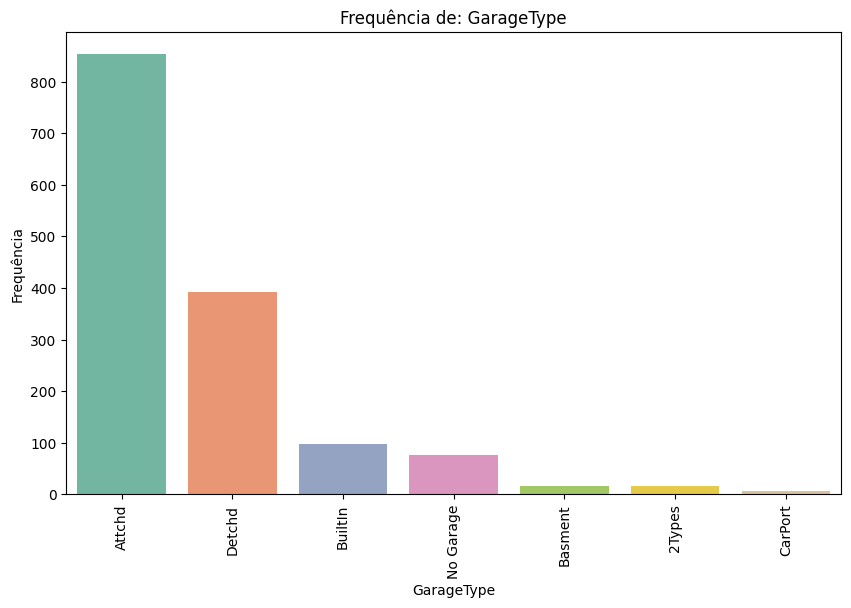

Frequência da coluna GarageType:
  GarageType  Frequência
0     Attchd         853
1     Detchd         392
2    BuiltIn          98
3  No Garage          76
4    Basment          17
5     2Types          17
6    CarPort           6




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


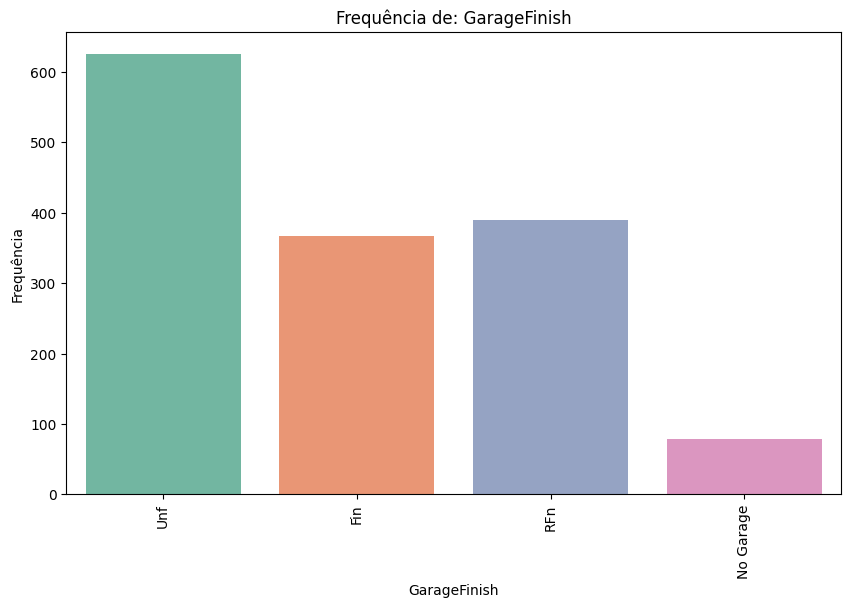

Frequência da coluna GarageFinish:
  GarageFinish  Frequência
0          Unf         625
1          RFn         389
2          Fin         367
3    No Garage          78




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


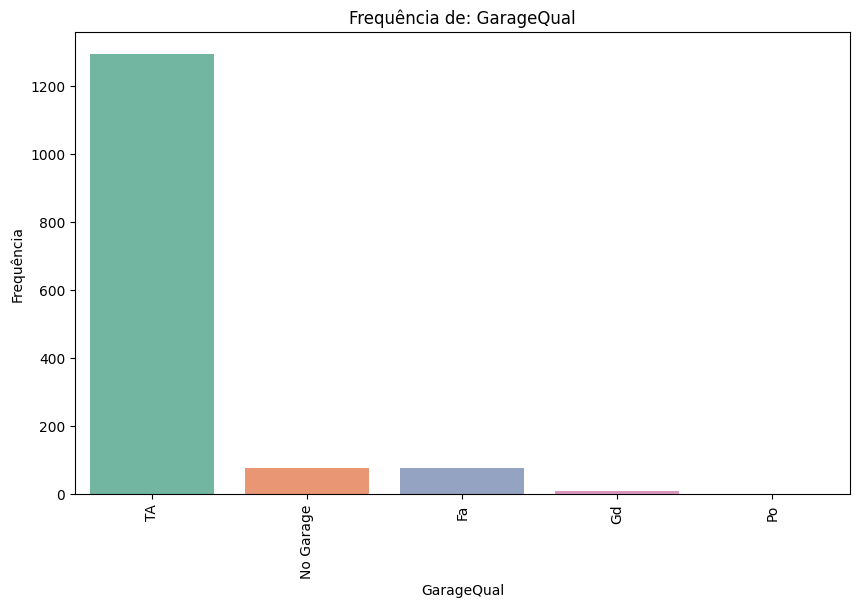

Frequência da coluna GarageQual:
  GarageQual  Frequência
0         TA        1293
1  No Garage          78
2         Fa          76
3         Gd          10
4         Po           2




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


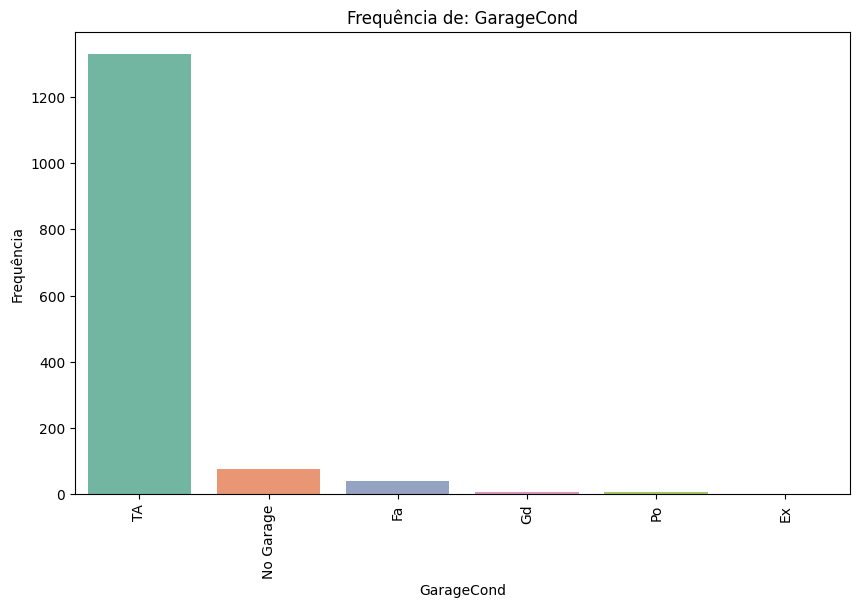

Frequência da coluna GarageCond:
  GarageCond  Frequência
0         TA        1328
1  No Garage          78
2         Fa          39
3         Po           7
4         Gd           6
5         Ex           1




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


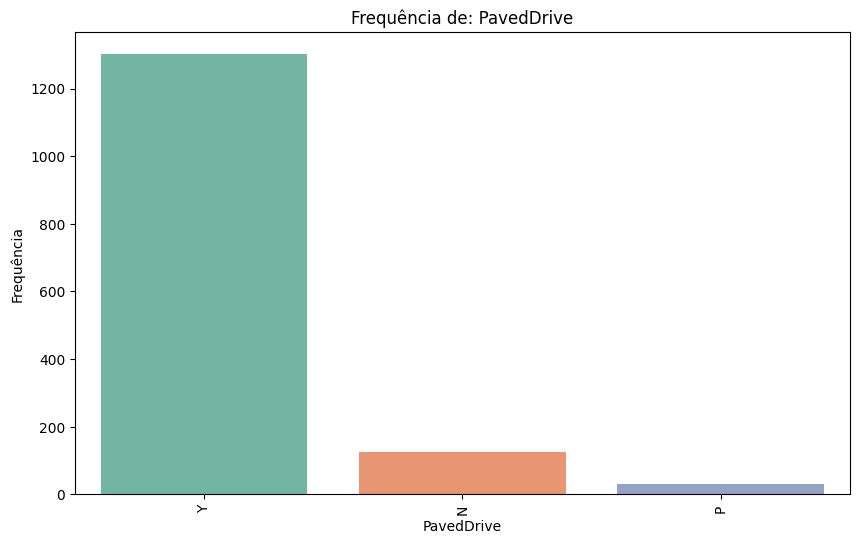

Frequência da coluna PavedDrive:
  PavedDrive  Frequência
0          Y        1301
1          N         126
2          P          32




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


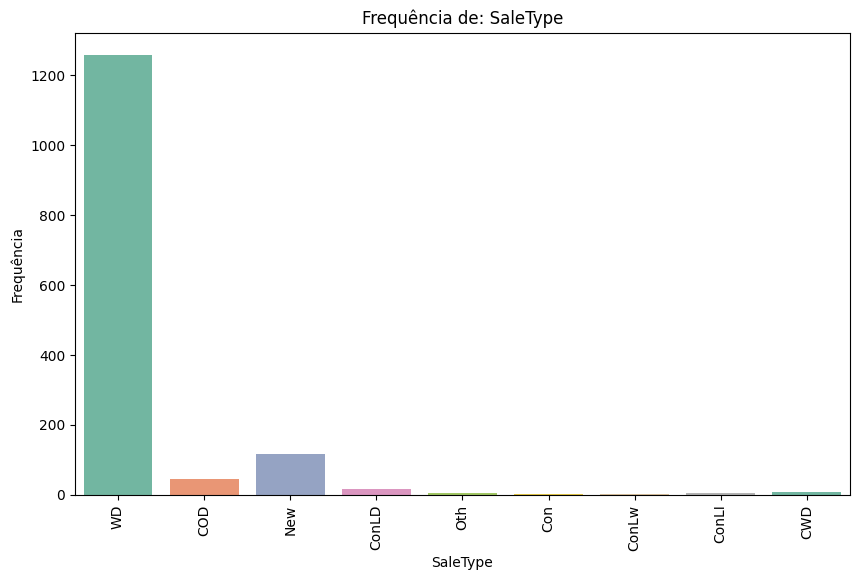

Frequência da coluna SaleType:
  SaleType  Frequência
0       WD        1259
1      New         117
2      COD          44
3    ConLD          17
4      CWD           8
5      Oth           4
6    ConLI           4
7      Con           3
8    ConLw           3




<ipython-input-48-4fbfb5247f80>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


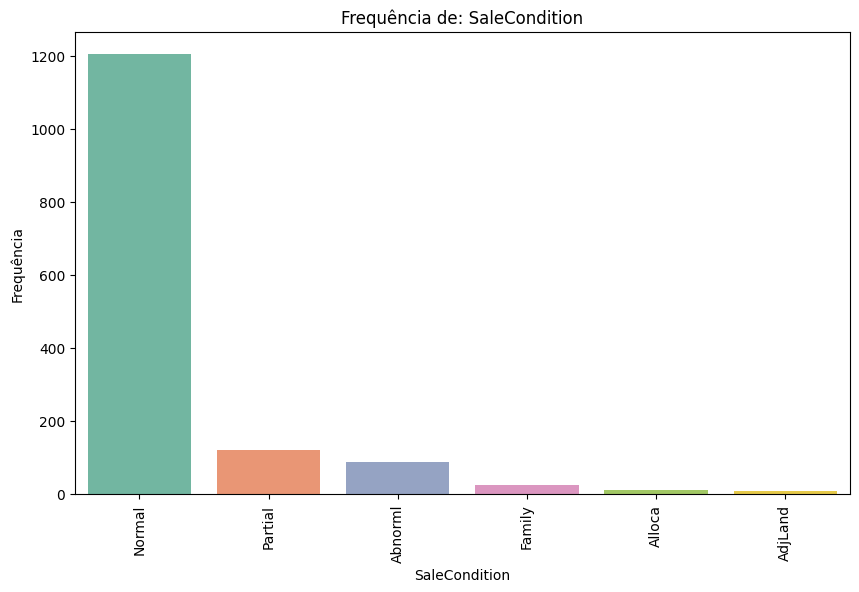

Frequência da coluna SaleCondition:
  SaleCondition  Frequência
0        Normal        1204
1       Partial         120
2       Abnorml          89
3        Family          26
4        Alloca          12
5       AdjLand           8




In [48]:
col_pular = [
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice'
    ]
for col in col_obj:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=test, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = test[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


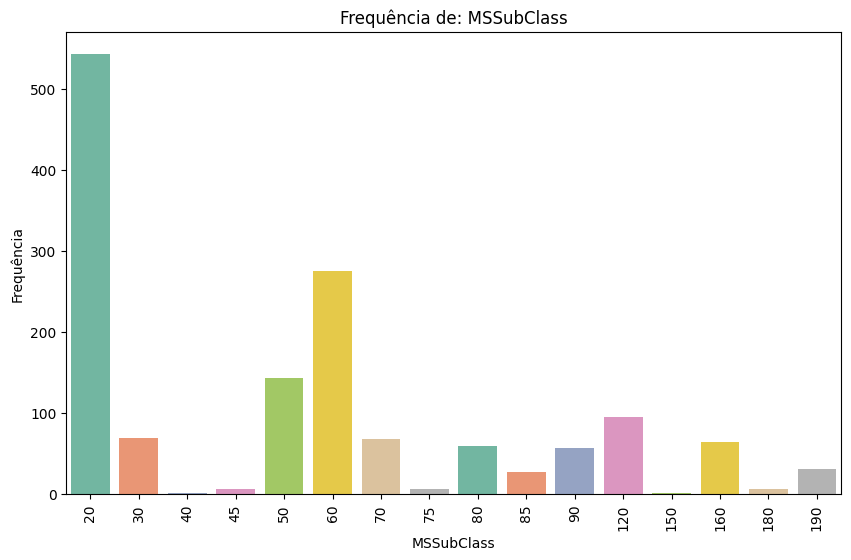

Frequência da coluna MSSubClass:
    MSSubClass  Frequência
0           20         543
1           60         276
2           50         143
3          120          95
4           30          70
5           70          68
6          160          65
7           80          60
8           90          57
9          190          31
10          85          28
11          75           7
12         180           7
13          45           6
14          40           2
15         150           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


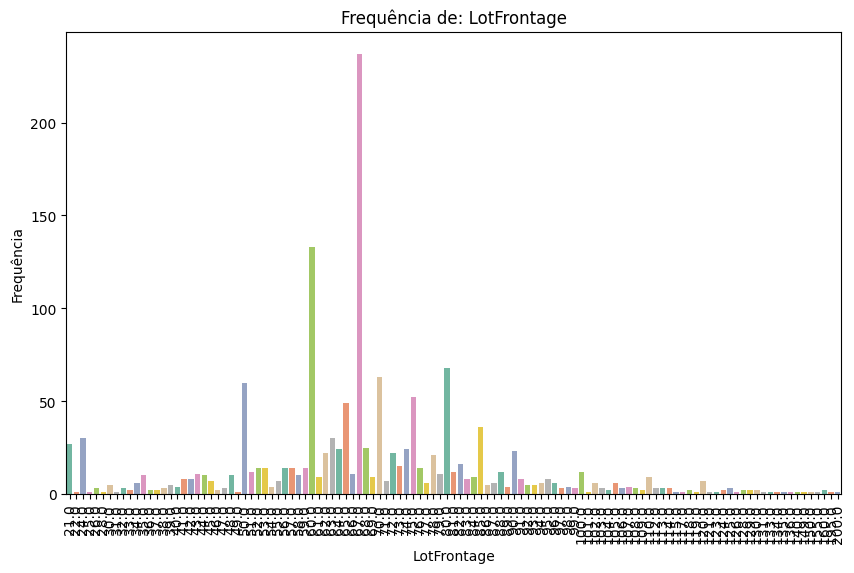

Frequência da coluna LotFrontage:
     LotFrontage  Frequência
0           67.0         237
1           60.0         133
2           80.0          68
3           70.0          63
4           50.0          60
..           ...         ...
110        117.0           1
111         31.0           1
112        119.0           1
113         25.0           1
114        140.0           1

[115 rows x 2 columns]




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


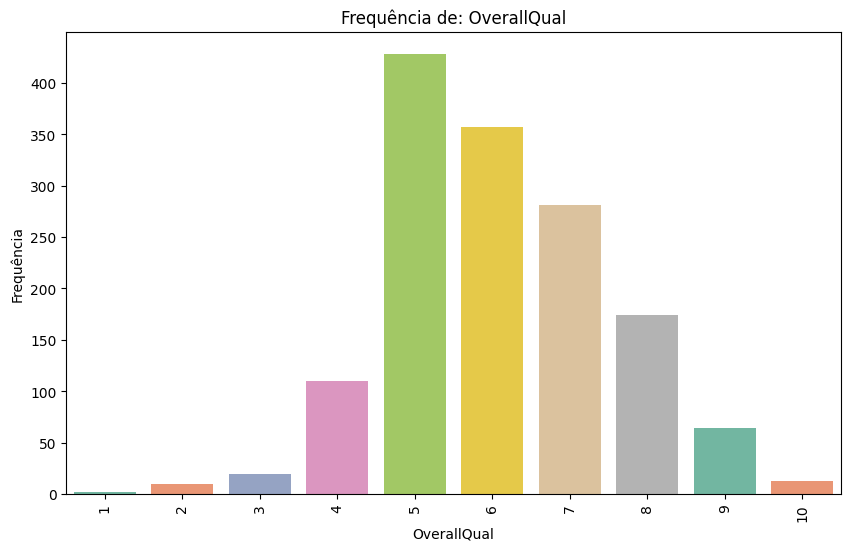

Frequência da coluna OverallQual:
   OverallQual  Frequência
0            5         428
1            6         357
2            7         281
3            8         174
4            4         110
5            9          64
6            3          20
7           10          13
8            2          10
9            1           2




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


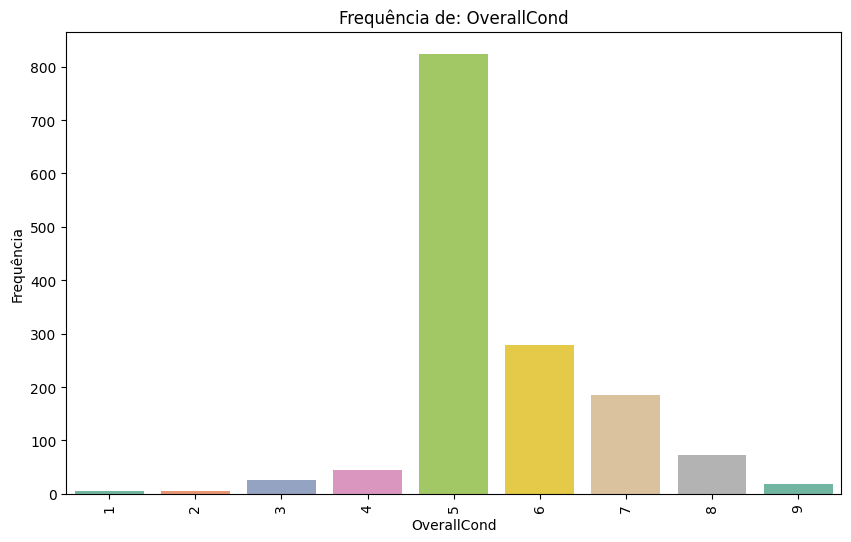

Frequência da coluna OverallCond:
   OverallCond  Frequência
0            5         824
1            6         279
2            7         185
3            8          72
4            4          44
5            3          25
6            9          19
7            1           6
8            2           5




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


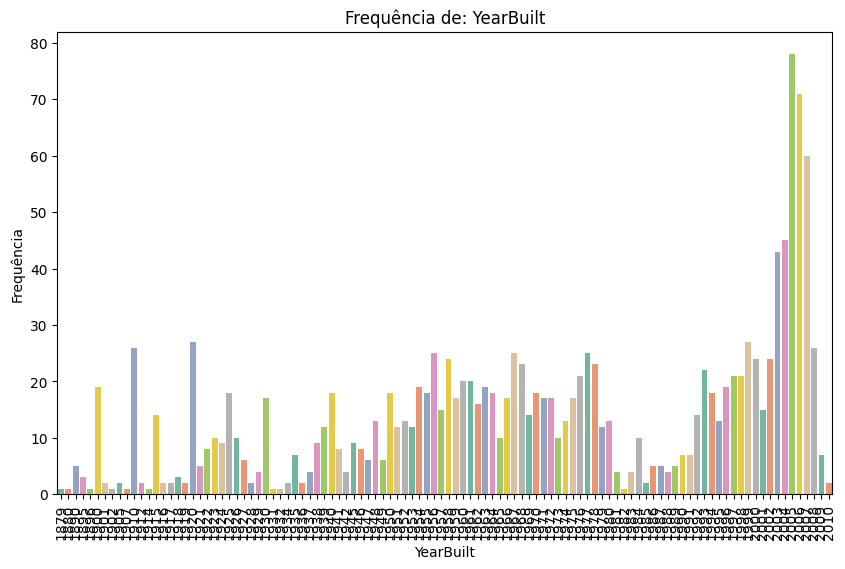

Frequência da coluna YearBuilt:
     YearBuilt  Frequência
0         2005          78
1         2006          71
2         2007          60
3         2004          45
4         2003          43
..         ...         ...
101       1914           1
102       1902           1
103       1907           1
104       1931           1
105       1932           1

[106 rows x 2 columns]




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


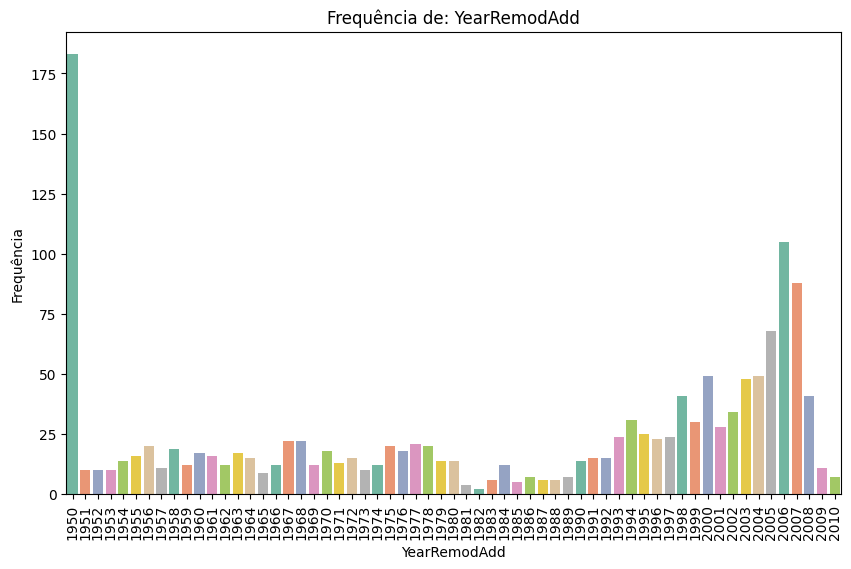

Frequência da coluna YearRemodAdd:
    YearRemodAdd  Frequência
0           1950         183
1           2006         105
2           2007          88
3           2005          68
4           2000          49
..           ...         ...
56          1988           6
57          1983           6
58          1985           5
59          1981           4
60          1982           2

[61 rows x 2 columns]




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


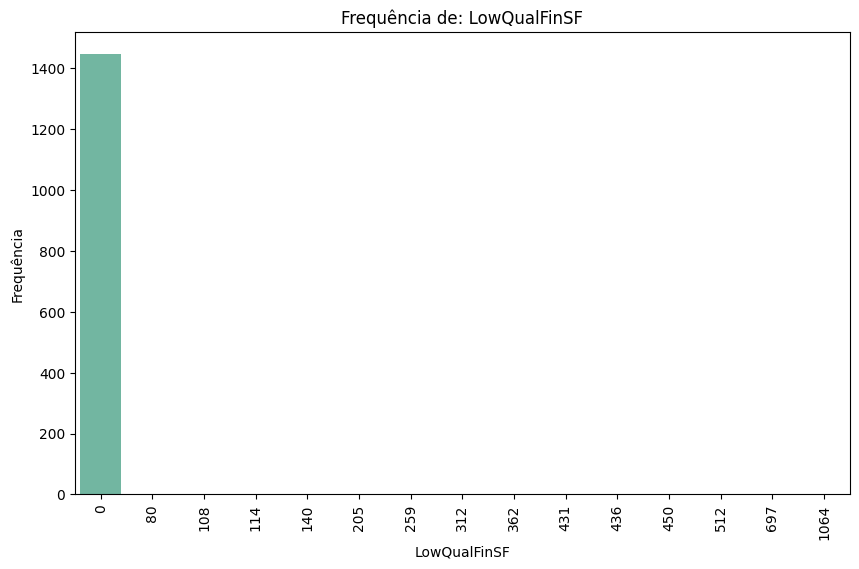

Frequência da coluna LowQualFinSF:
    LowQualFinSF  Frequência
0              0        1445
1            362           1
2           1064           1
3            431           1
4            436           1
5            259           1
6            312           1
7            108           1
8            697           1
9            512           1
10           114           1
11           205           1
12            80           1
13           140           1
14           450           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


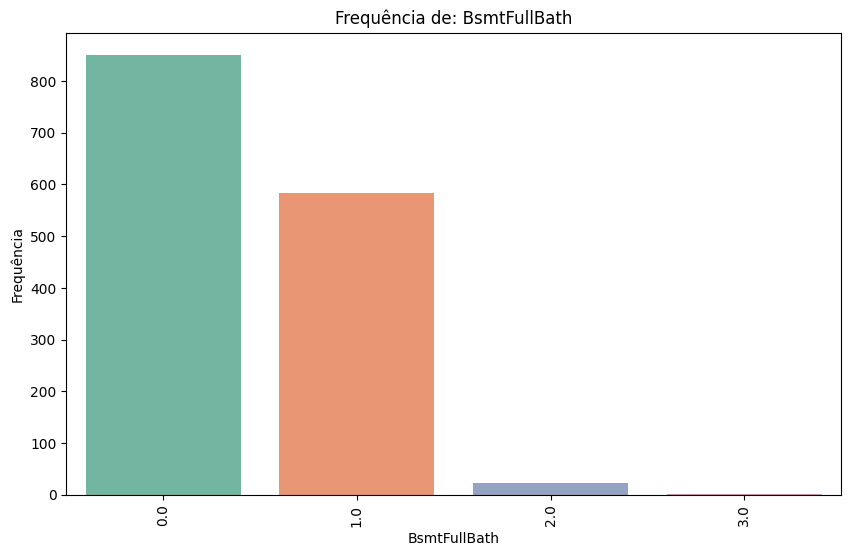

Frequência da coluna BsmtFullBath:
   BsmtFullBath  Frequência
0           0.0         851
1           1.0         584
2           2.0          23
3           3.0           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


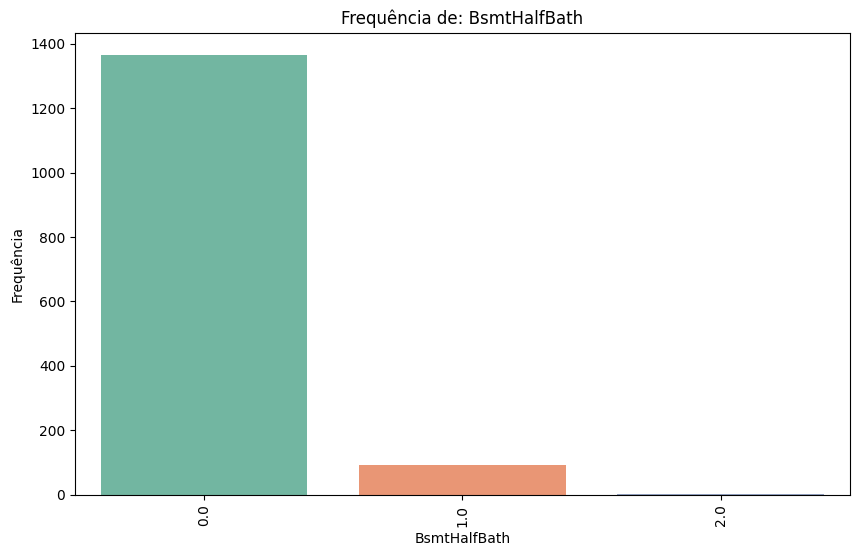

Frequência da coluna BsmtHalfBath:
   BsmtHalfBath  Frequência
0           0.0        1366
1           1.0          91
2           2.0           2




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


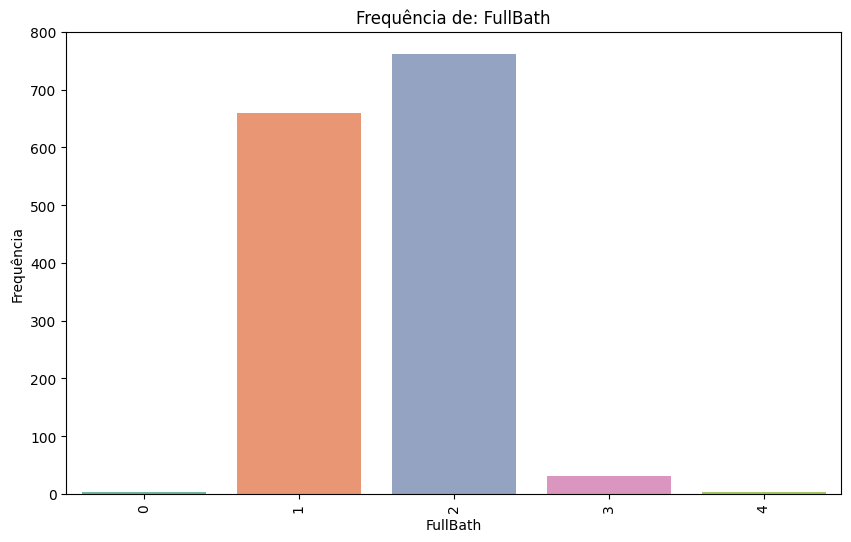

Frequência da coluna FullBath:
   FullBath  Frequência
0         2         762
1         1         659
2         3          31
3         4           4
4         0           3




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


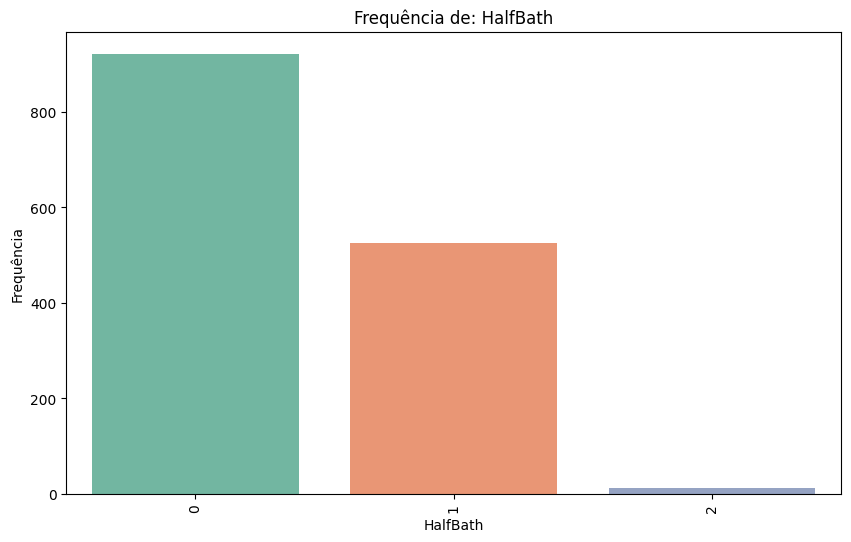

Frequência da coluna HalfBath:
   HalfBath  Frequência
0         0         921
1         1         525
2         2          13




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


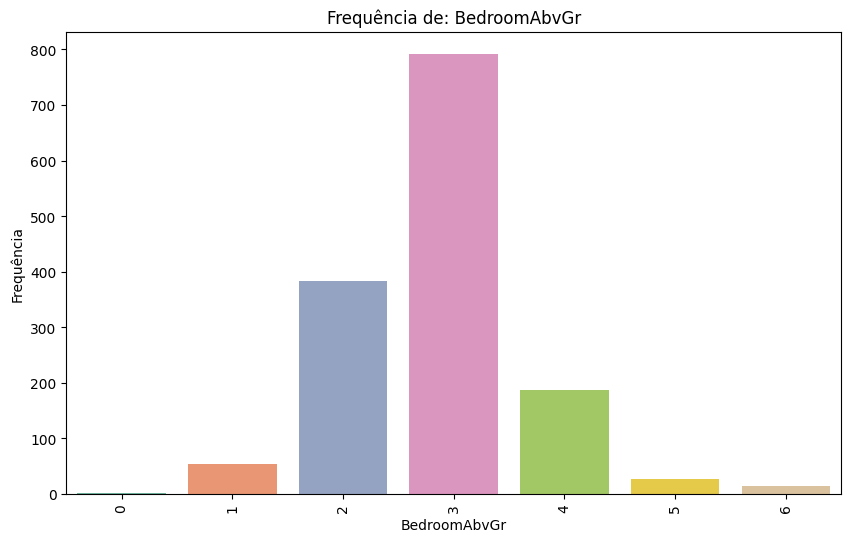

Frequência da coluna BedroomAbvGr:
   BedroomAbvGr  Frequência
0             3         792
1             2         384
2             4         187
3             1          53
4             5          27
5             6          14
6             0           2




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


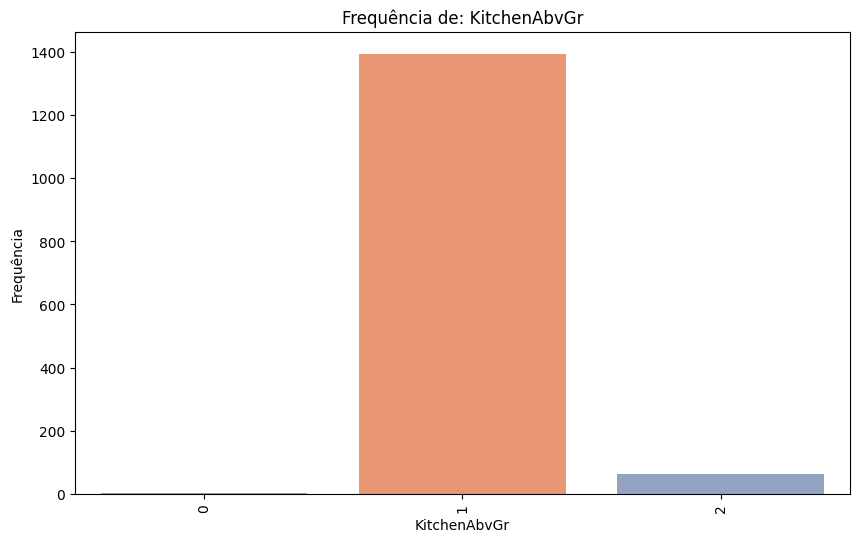

Frequência da coluna KitchenAbvGr:
   KitchenAbvGr  Frequência
0             1        1393
1             2          64
2             0           2




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


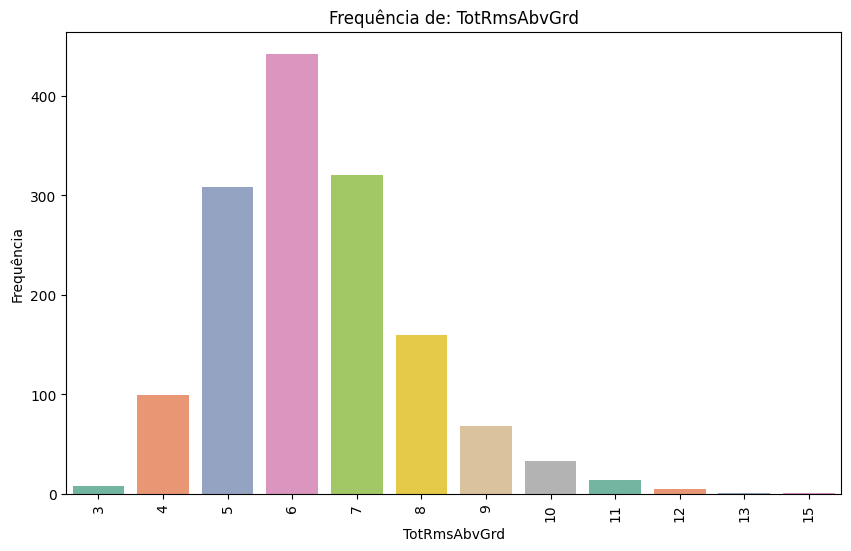

Frequência da coluna TotRmsAbvGrd:
    TotRmsAbvGrd  Frequência
0              6         442
1              7         320
2              5         308
3              8         160
4              4          99
5              9          68
6             10          33
7             11          14
8              3           8
9             12           5
10            13           1
11            15           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


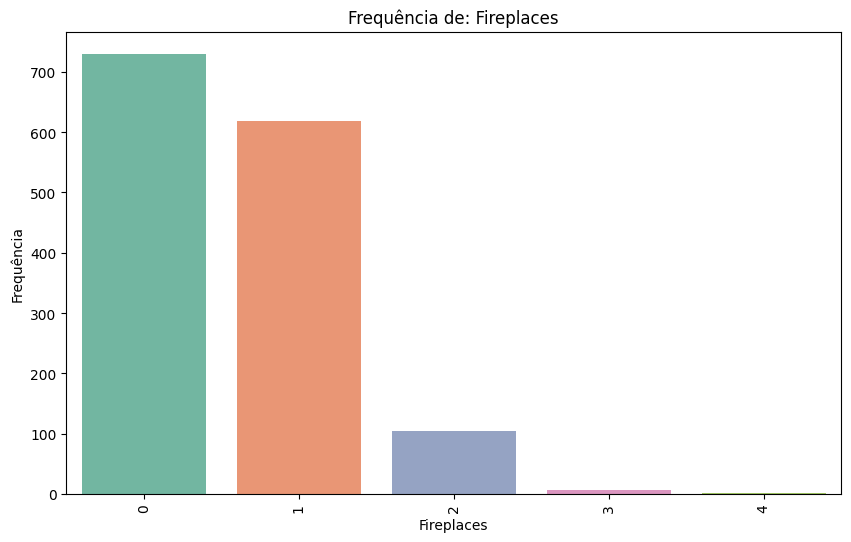

Frequência da coluna Fireplaces:
   Fireplaces  Frequência
0           0         730
1           1         618
2           2         104
3           3           6
4           4           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


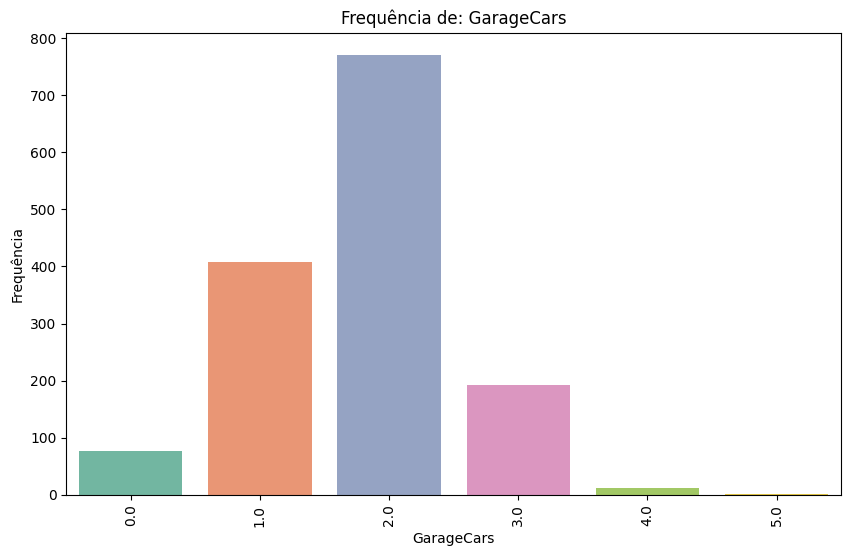

Frequência da coluna GarageCars:
   GarageCars  Frequência
0         2.0         771
1         1.0         407
2         3.0         193
3         0.0          76
4         4.0          11
5         5.0           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


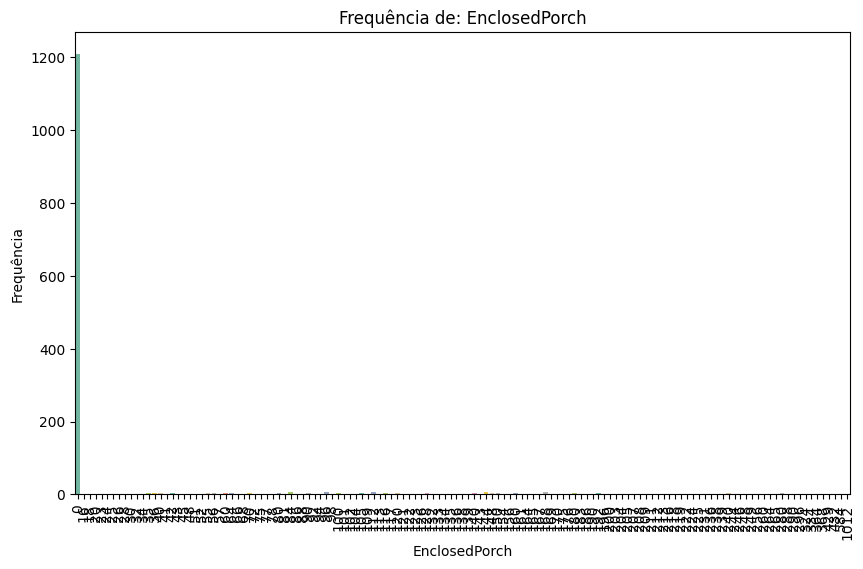

Frequência da coluna EnclosedPorch:
     EnclosedPorch  Frequência
0                0        1208
1               96           7
2              168           7
3              112           7
4              144           6
..             ...         ...
126            368           1
127             72           1
128             57           1
129            334           1
130             23           1

[131 rows x 2 columns]




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


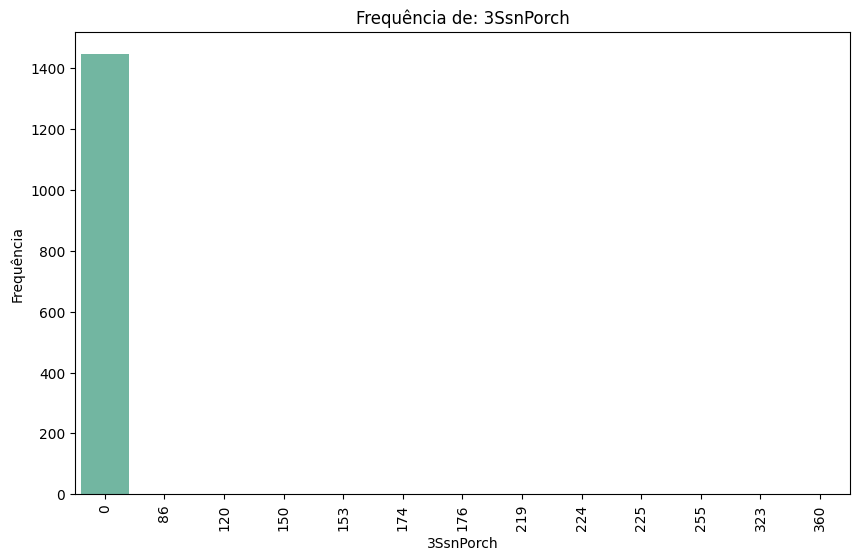

Frequência da coluna 3SsnPorch:
    3SsnPorch  Frequência
0           0        1446
1         153           2
2         224           1
3         255           1
4         225           1
5         360           1
6         150           1
7         174           1
8         120           1
9         219           1
10        176           1
11         86           1
12        323           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


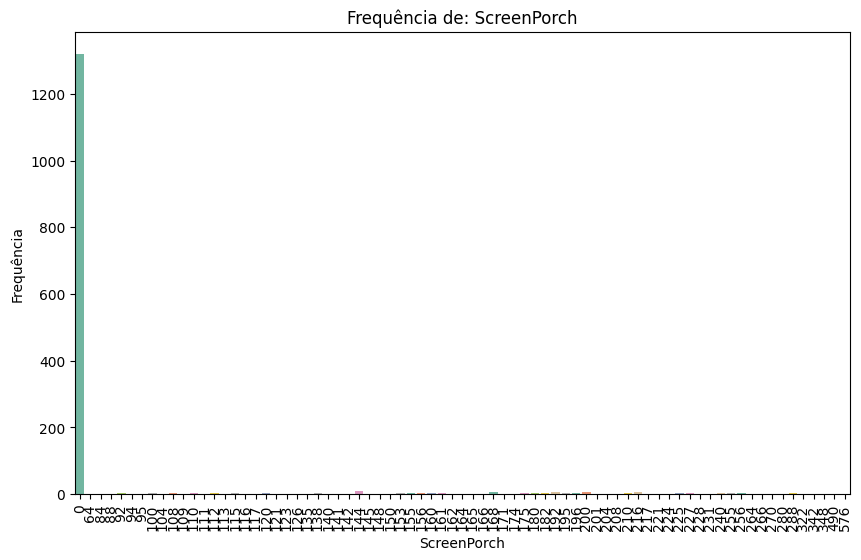

Frequência da coluna ScreenPorch:
    ScreenPorch  Frequência
0             0        1319
1           144          10
2           168           7
3           216           6
4           192           5
..          ...         ...
70          221           1
71          171           1
72          135           1
73          322           1
74          104           1

[75 rows x 2 columns]




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


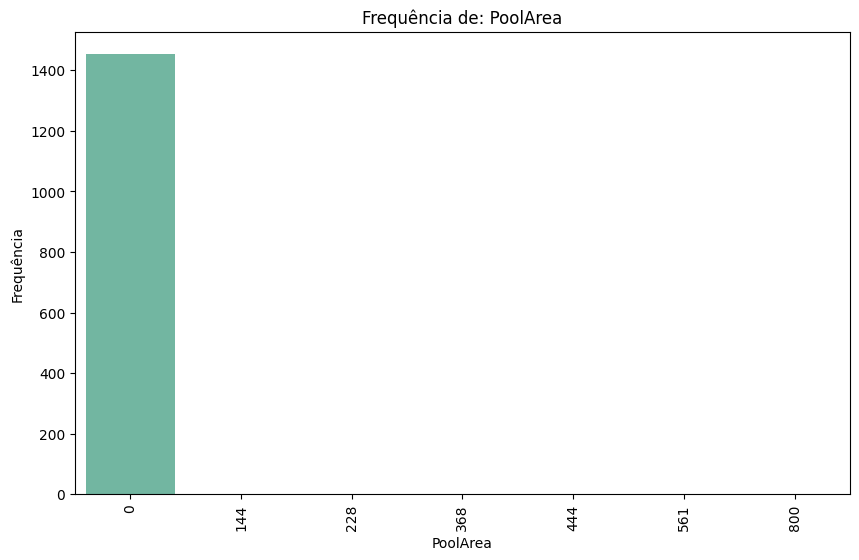

Frequência da coluna PoolArea:
   PoolArea  Frequência
0         0        1453
1       144           1
2       368           1
3       444           1
4       228           1
5       561           1
6       800           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


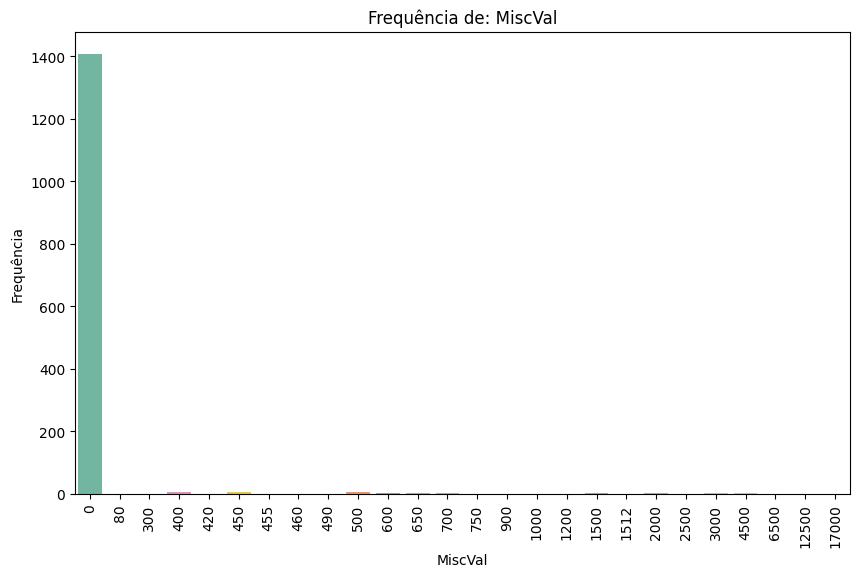

Frequência da coluna MiscVal:
    MiscVal  Frequência
0         0        1408
1       400           7
2       500           5
3       450           5
4       600           4
5       650           3
6      2000           3
7      1500           3
8      3000           2
9      4500           2
10      700           2
11      455           1
12     6500           1
13    17000           1
14      460           1
15     1000           1
16     1512           1
17     2500           1
18      750           1
19    12500           1
20      900           1
21     1200           1
22      490           1
23       80           1
24      300           1
25      420           1




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


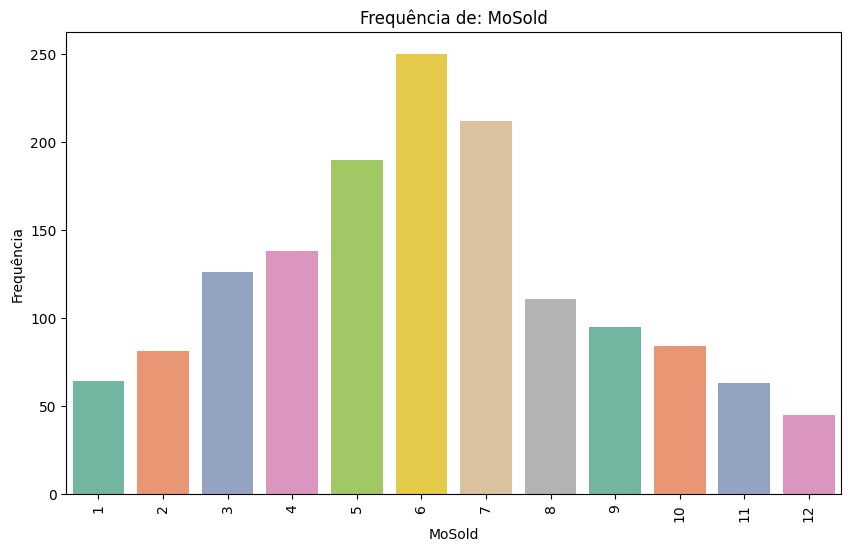

Frequência da coluna MoSold:
    MoSold  Frequência
0        6         250
1        7         212
2        5         190
3        4         138
4        3         126
5        8         111
6        9          95
7       10          84
8        2          81
9        1          64
10      11          63
11      12          45




<ipython-input-60-c674a13a4ec7>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=test, x=col, palette="Set2")


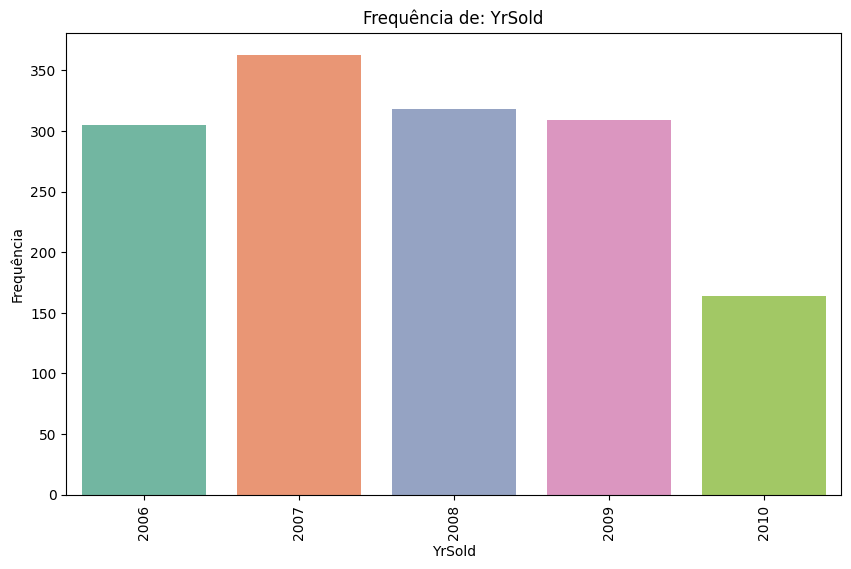

Frequência da coluna YrSold:
   YrSold  Frequência
0    2007         363
1    2008         318
2    2009         309
3    2006         305
4    2010         164




In [60]:
col_pular = [
    'BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
    'GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','SalePrice',
    'BsmtFinSF1', 'MasVnrArea', 'LotArea','Id'
    ]

for col in col_num:
  if col in col_pular:
    continue
  plt.figure(figsize=(10, 6))
  plt.title(f"Frequência de: {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequência")
  sns.countplot(data=test, x=col, palette="Set2")
  plt.xticks(rotation=90)
  plt.show()  # Exibe o gráfico
  # Conta a frequência dos valores na coluna
  qtd = test[col].value_counts().reset_index(name='Frequência')
  qtd.columns = [col, 'Frequência']
  # Imprime as frequências
  print(f'Frequência da coluna {col}:')
  print(qtd)
  print("\n")

# ML

In [70]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [71]:
# Definir a variável dependente (target) e as variáveis independentes (features)
X_train = train.drop(columns=['SalePrice'])  # Features (sem a coluna SalePrice)
y_train = train['SalePrice']  # Target (preço de venda)

X_test = test.drop(columns=['SalePrice'], errors='ignore')  # Features (para o dataset de teste)


In [72]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

# Unificando
for col in categorical_cols:
    if X_train[col].apply(type).nunique() > 1:  # Verificando se temos mescla nos tipos
        X_train[col] = X_train[col].astype(str)
        X_test[col] = X_test[col].astype(str)

In [78]:
# Padronizar as variáveis numéricas
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Criar um pipeline para pré-processamento

scaler = StandardScaler()
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Aplicar o pré-processamento numérico
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough'
)

In [74]:
# Pipeline para pré-processamento das variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Preencher valores ausentes com a moda
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # OneHotEncoding, use sparse_output=False
])

# Aplicar pré-processamento a todas as variáveis (numéricas e categóricas)
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)
    ], remainder='passthrough'  # Deixar as colunas numéricas sem alteração
)

In [83]:
# Modelo com regularização Lasso (L1)
model_lasso = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', scaler),
    ('regressor', Lasso(alpha=0.05, max_iter=20000))  # Ajuste o parâmetro alpha para regularização
])

# Treinamento e avaliação
model_lasso.fit(X_train, y_train)
y_train_pred_lasso_scaled = model_lasso.predict(X_train)
rmse_lasso_scaled = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso_scaled))
print(f'RMSE no conjunto de treinamento para Lasso com escalonamento: {rmse_lasso_scaled}')

RMSE no conjunto de treinamento para Lasso com escalonamento: 19993.667564261516


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.134e+10, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


In [85]:
# Modelo com regularização Ridge (L2)
model_ridge = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))  # Ajuste o parâmetro alpha para regularização
])

model_ridge.fit(X_train, y_train)
y_train_pred_ridge = model_ridge.predict(X_train)
rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
print(f'RMSE no conjunto de treinamento para Ridge: {rmse_ridge}')

RMSE no conjunto de treinamento para Ridge: 21934.419134514017
